# Look at accelerometer data 

From Jeep and Focus at various speeds over various potholes and storm drain channels.

In [3]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.special as sp
import pandas as pd

#Custome graph format style sheet
plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = False
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.png'
if not 'location' in locals():
    #save location.  First one is for running on home PC, second for running on the work laptop.  May need to make a global change
    #location = 'E:\\Documents\\Dan\\Code\\Prospectus\\Document\\Figures\\'
    #location = 'C:\\Users\\dhendrickson\\Documents\\github\\FigsAndPlots\\FigsAndPlotsDocument\\Figures\\'
    location = 'E:\\Documents\\Dan\\Phd\\Play\\'

#Standard cycle for collors and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)

In [4]:
#Extra Headers:
import DWFT as fp
import os as os
import pywt as py
import statistics as st
import os as os
import pandas as pd
import random
import multiprocessing
from joblib import Parallel, delayed
from pywt._extensions._pywt import (DiscreteContinuousWavelet, ContinuousWavelet,
                                Wavelet, _check_dtype)
from pywt._functions import integrate_wavelet, scale2frequency
from time import time as ti

my_cmap = plt.get_cmap('gray')

In [5]:
#DataSet = np.genfromtxt(open('./Data/Jeep SD 10.txt','r'), delimiter=',',skip_header=4)
Header = np.array(['T', 'X','Y','Z','R','Theta','Phi'])

fig=plt.figure(figsize=(6.67,3.75))
plt.plot(DataSet[:,0],DataSet[:,1], label = 'X')
plt.plot(DataSet[:,0],DataSet[:,2], label = 'Y')
plt.plot(DataSet[:,0],DataSet[:,3], label = 'Z')
plt.plot(DataSet[:,0],DataSet[:,4], label = 'R')

title = '4 Magnitude Acceleration Curves'
if Ledgends: plt.legend()
if Titles: plt.title(title)
if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "")+FFormat)
plt.show()

In [6]:
def PlotFingerPrint(data, xName='a', title='', FP='mexh'):
    FpScat = fp.getLabeledThumbprint(data, FP)
    if xName == 'a':
        xName = np.arange(0,np.shape(data)[0],1)
    Al,Ms  = np.meshgrid(xName,np.linspace(1,50,50))

    fig1 = plt.figure(figsize=(6.67,3.75))
    ax1 = plt.axes()
    cs1 = ax1.contourf(Al,Ms, FpScat,cmap=my_cmap,levels=10)

    if Titles: plt.title(title)
    if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "").replace(".txt","")+FFormat)

    plt.show()

In [7]:
def PlotRunFP(dataSet, Order, Dimm, start = 0, end = 0):
    
    if end == 0:
        end = np.shape(dataSet[Order][Dimm])[0]
    
    data = dataSet[Order][Dimm][Start:End]
    
    xName = np.arange(0,np.shape(data)[0],1)
    Al,Ms  = np.meshgrid(xName,np.linspace(1,50,50))

    fig1 = plt.figure(figsize=(6.67,3.75))
    ax1 = plt.axes()
    cs1 = ax1.contourf(Al,Ms, FpScat,cmap=my_cmap,levels=10)

    if Titles: plt.title(title)
    if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "").replace(".txt","")+FFormat)

    plt.show()

for i in range(np.size(DataSet[0])-1):
    PlotFingerPrint(DataSet[:,i+1],DataSet[:,0],Header[i+1])

DataSet = np.genfromtxt(open('./Data/Jeep SD 10.txt','r'), delimiter=',',skip_header=4)
for i in range(np.size(DataSet[0])-1):
    PlotFingerPrint(DataSet[:,i+1],DataSet[:,0],Header[i+1])

<!-- Directory = './Data' -->
files = os.listdir(Directory)

for Filename in files:
    DataSet = np.genfromtxt(open(Directory+'/'+Filename,'r'), delimiter=',',skip_header=4)
    fig=plt.figure(figsize=(6.67,3.75))
    plt.plot(DataSet[:,0],DataSet[:,1], label = 'X')
    plt.plot(DataSet[:,0],DataSet[:,2], label = 'Y')
    plt.plot(DataSet[:,0],DataSet[:,3], label = 'Z')
    plt.plot(DataSet[:,0],DataSet[:,4], label = 'R')

    title = '4 Magnitude Acceleration Curves'
    if Ledgends: plt.legend()
    if Titles: plt.title(title)
    if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "")+FFormat)
    plt.show()
    PlotFingerPrint(DataSet[:,4],DataSet[:,0],Filename+' : '+Header[4])

wvtOptions = []
wvtFamilies = py.families()

for family in wvtFamilies:
    famWvt = py.wavelist(family)
    for wvt in famWvt:
        wvtOptions.append(wvt)

Filename='Jeep SD 10'
FailedWavelets = []
DataSet = np.genfromtxt(open('./Data/'+Filename+'.txt','r'), delimiter=',',skip_header=4)
Header = np.array(['T', 'X','Y','Z','R','Theta','Phi'])
for wvt in wvtOptions:
    try:
        PlotFingerPrint(DataSet[:,4],DataSet[:,0],Filename+' : '+Header[4]+' '+wvt+' wavelet',wvt)
    except:
        FailedWavelets.append(wvt)
        pass

Directory = './Data'
FailedWavelets = []

files = os.listdir(Directory)
wvtOptions =  np.array(['coif3','db2','fbsp'])  #gau2','cmor','coif3','db2','mexh','morl','sym2','fbsp'])

for Filename in files:
    DataSet = np.genfromtxt(open(Directory+'/'+Filename,'r'), delimiter=',',skip_header=4)
    for wvt in wvtOptions:
        try:
            PlotFingerPrint(DataSet[:,4],DataSet[:,0],Filename+' : '+Header[4]+' '+wvt+' wavelet',wvt)
        except:
            FailedWavelets.append(wvt+Filename)
            pass
   

Directory = './Data'
FailedWavelets = []

Results = []

files = os.listdir(Directory)
wvtOptions =  np.array(['coif3','db2','fbsp'])  #gau2','cmor','coif3','db2','mexh','morl','sym2','fbsp'])

for Filename in files:
    DataSet = np.genfromtxt(open(Directory+'/'+Filename,'r'), delimiter=',',skip_header=4)
    FpScat = fp.getLabeledThumbprint(DataSet[:,4], 'db2')
    Features, Image = fp.FPFeatureVector(FpScat)
    Results.append([Filename,Features])

    normHOG: bool. if True normalize HOG values by the time duration of the
            fingerprint
    The returned feature vector has features in this order:
        0. semimajor axis
        1. semiminor axis
        2. theta (angle of orientation for ellipse)
        3. eccentricity
        4. degree 2 polynomial a
        5. degree 2 polynomial b (ax^2 + bx +c)
        6. degree 2 polynomial c
        7. degree 4 polynomial a
        8. degree 4 polynomial b
        9. degree 4 polynomial c
        10. degree 4 polynomial d (ax^4 + bx^3 + cx^2 + dx + e)
        11. degree 4 polynomial e
        12. HOGAngle0
        13. HOGAngle45
        14. HOGAngle90
        15. HOGAngle135
        16. wavelet scale value for FP center of mass
        17. number of time steps for fingerprint
        18. diameter of circle with same area as fingerprint
        19. Extent
        20. Area
        21. Filled Area
        22. Euler Number
        23. Convex Area
        24. Solidity


Results[6][0]
np.shape(Results[1][1])
bob = np.matrix(Results[6][1])
bob

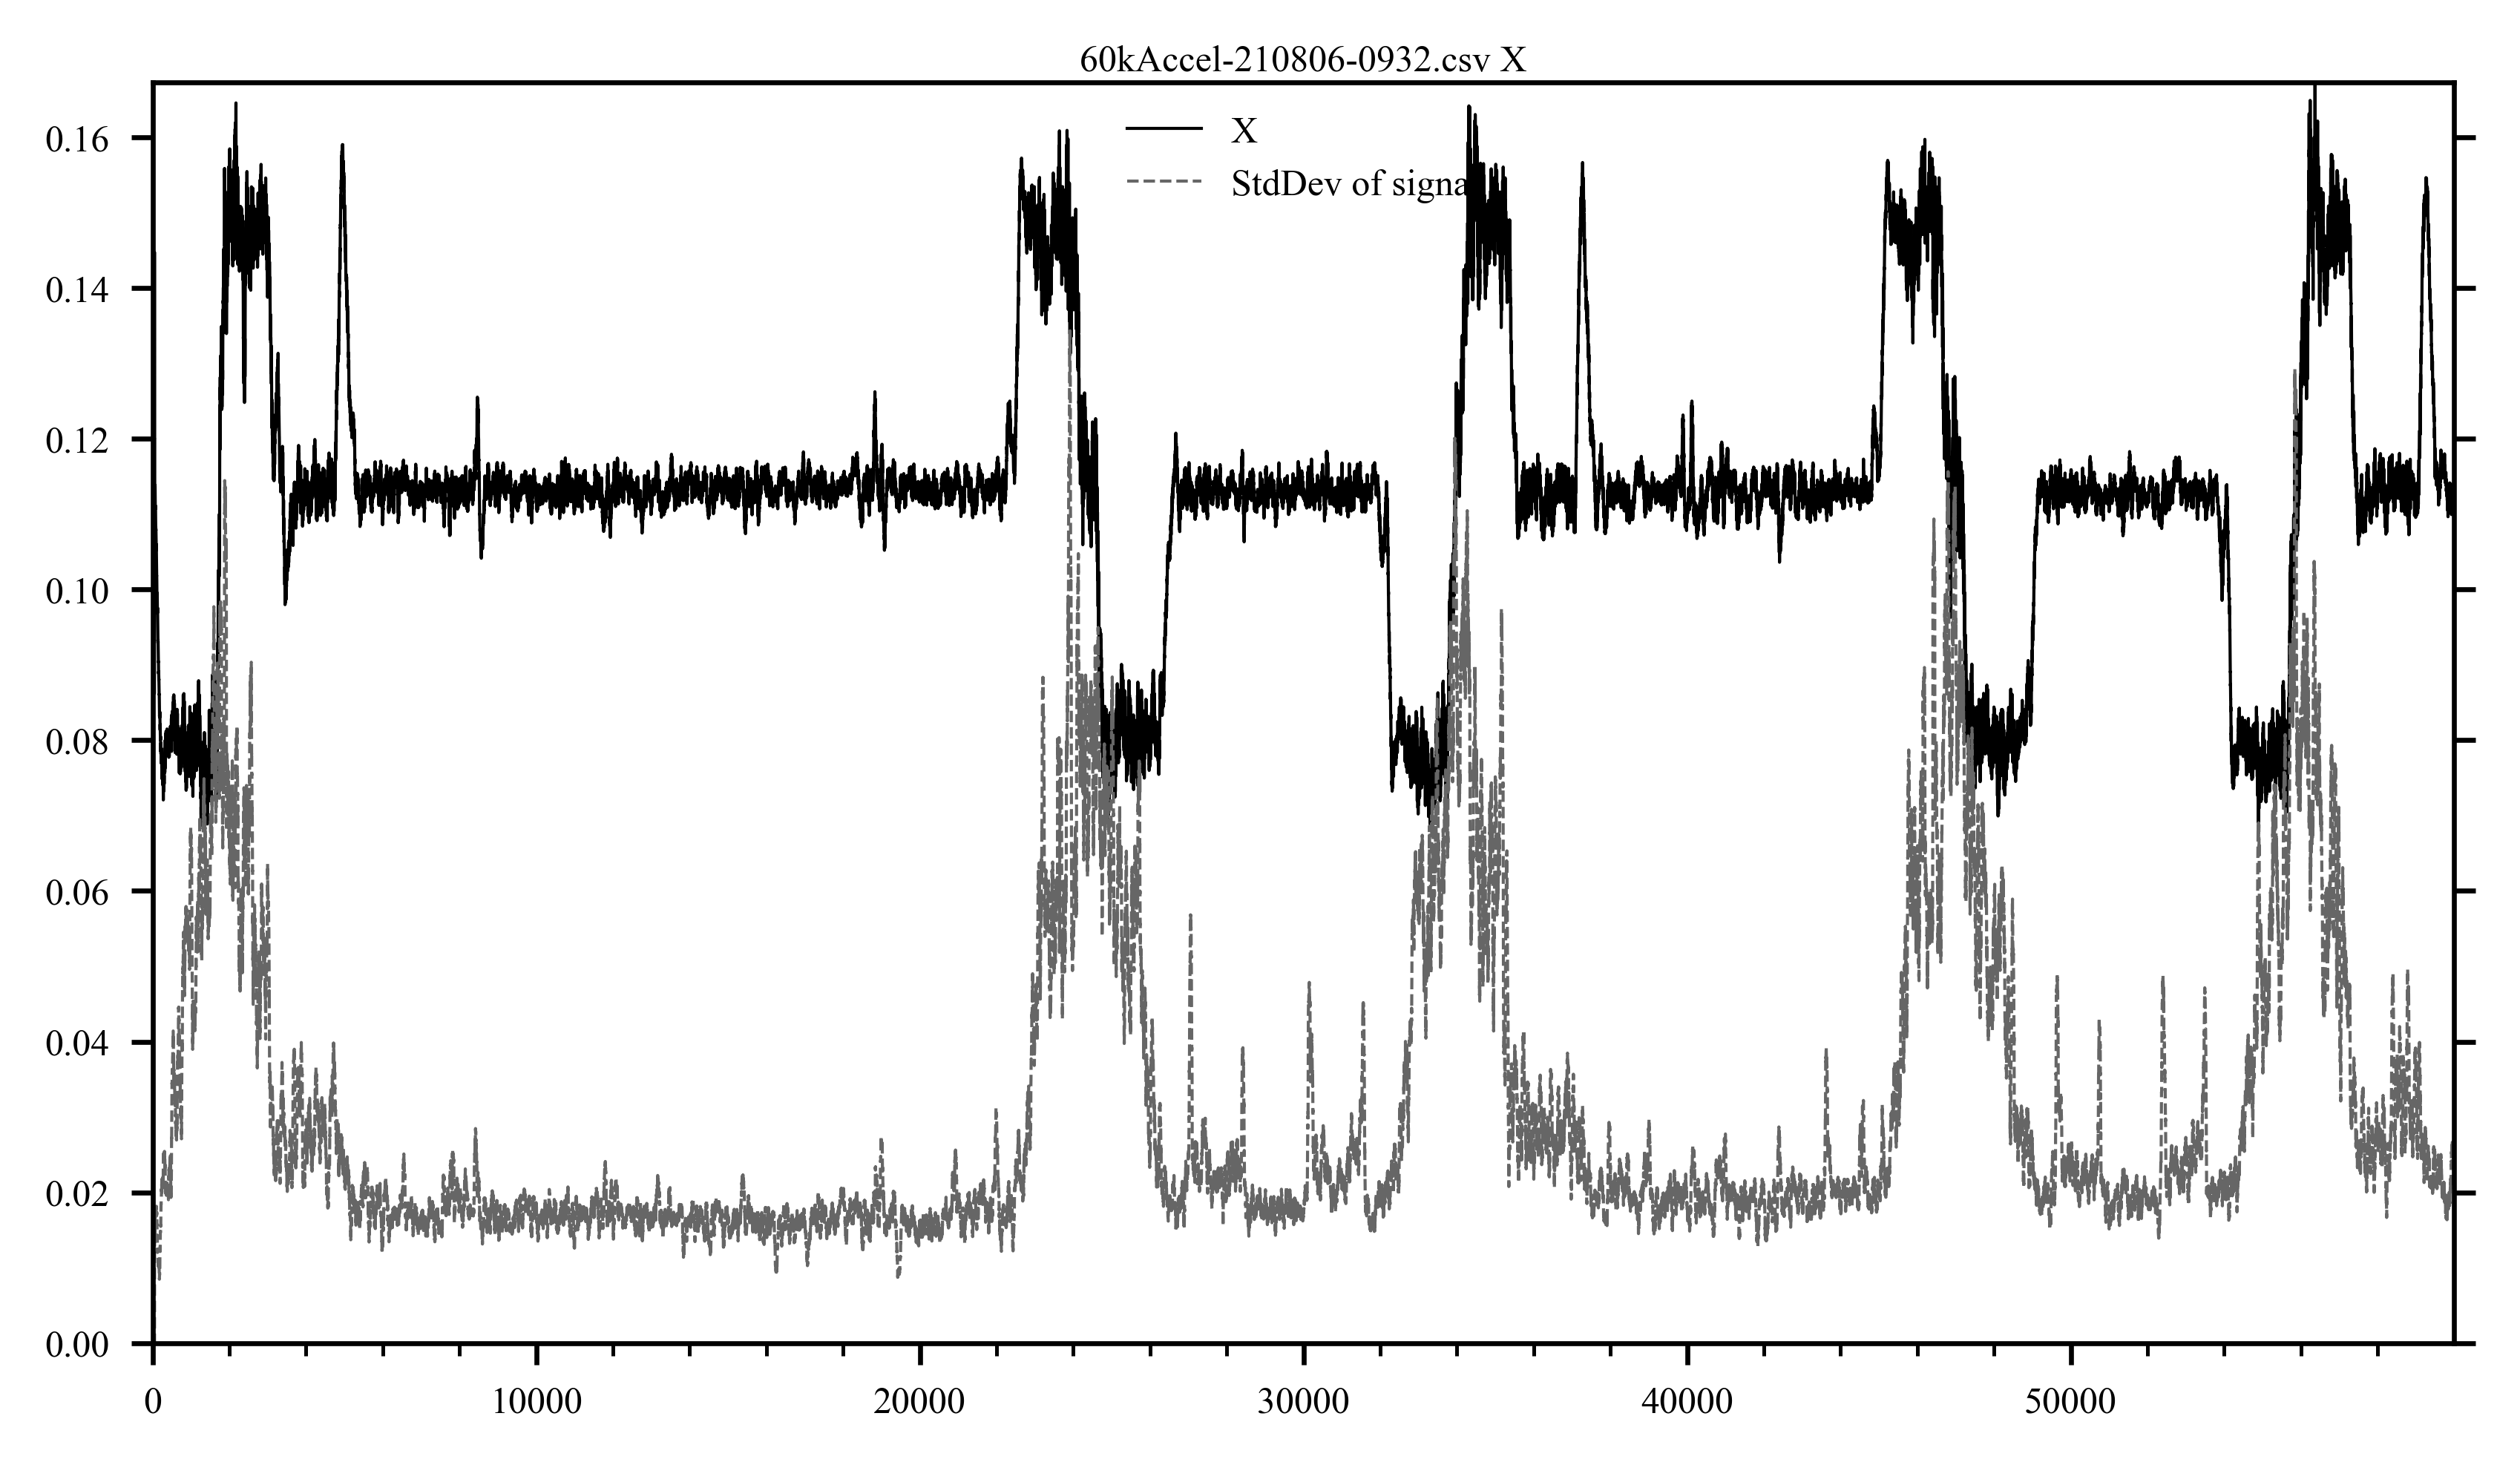

60kAccel-210806-0932.csv X 0.1343274152728234 0.1673


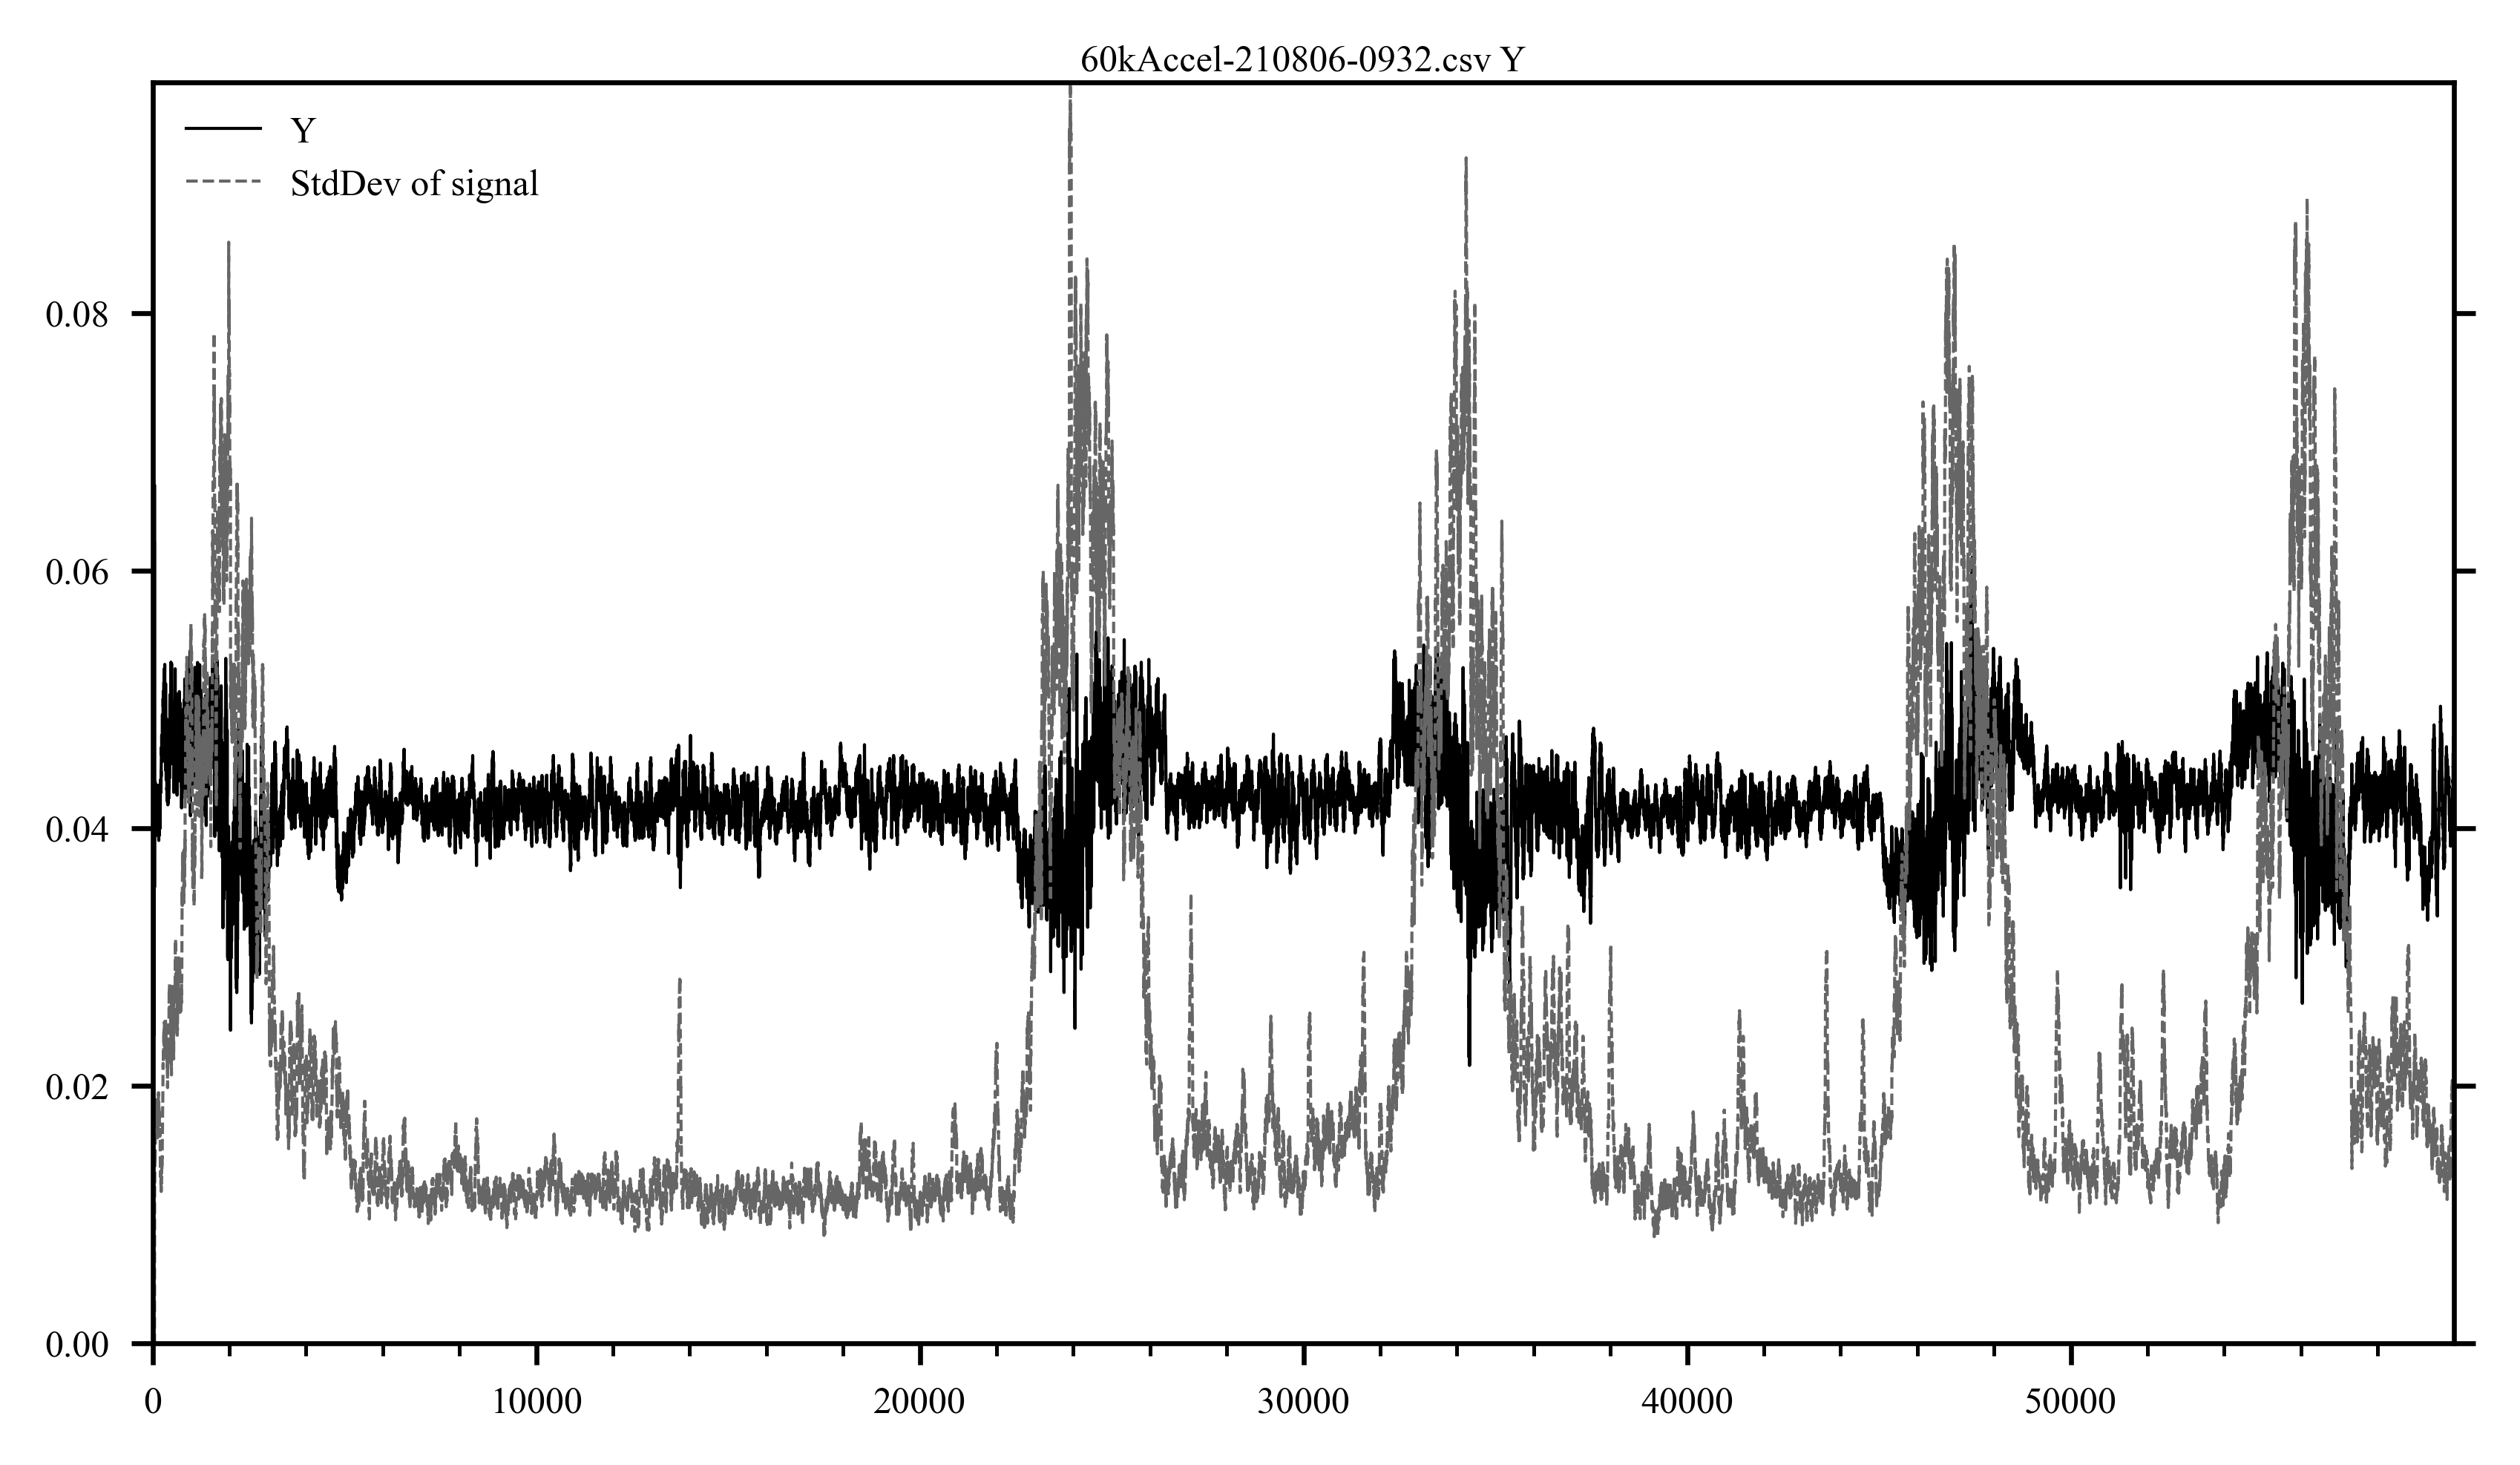

60kAccel-210806-0932.csv Y 0.09791491923697672 0.06665


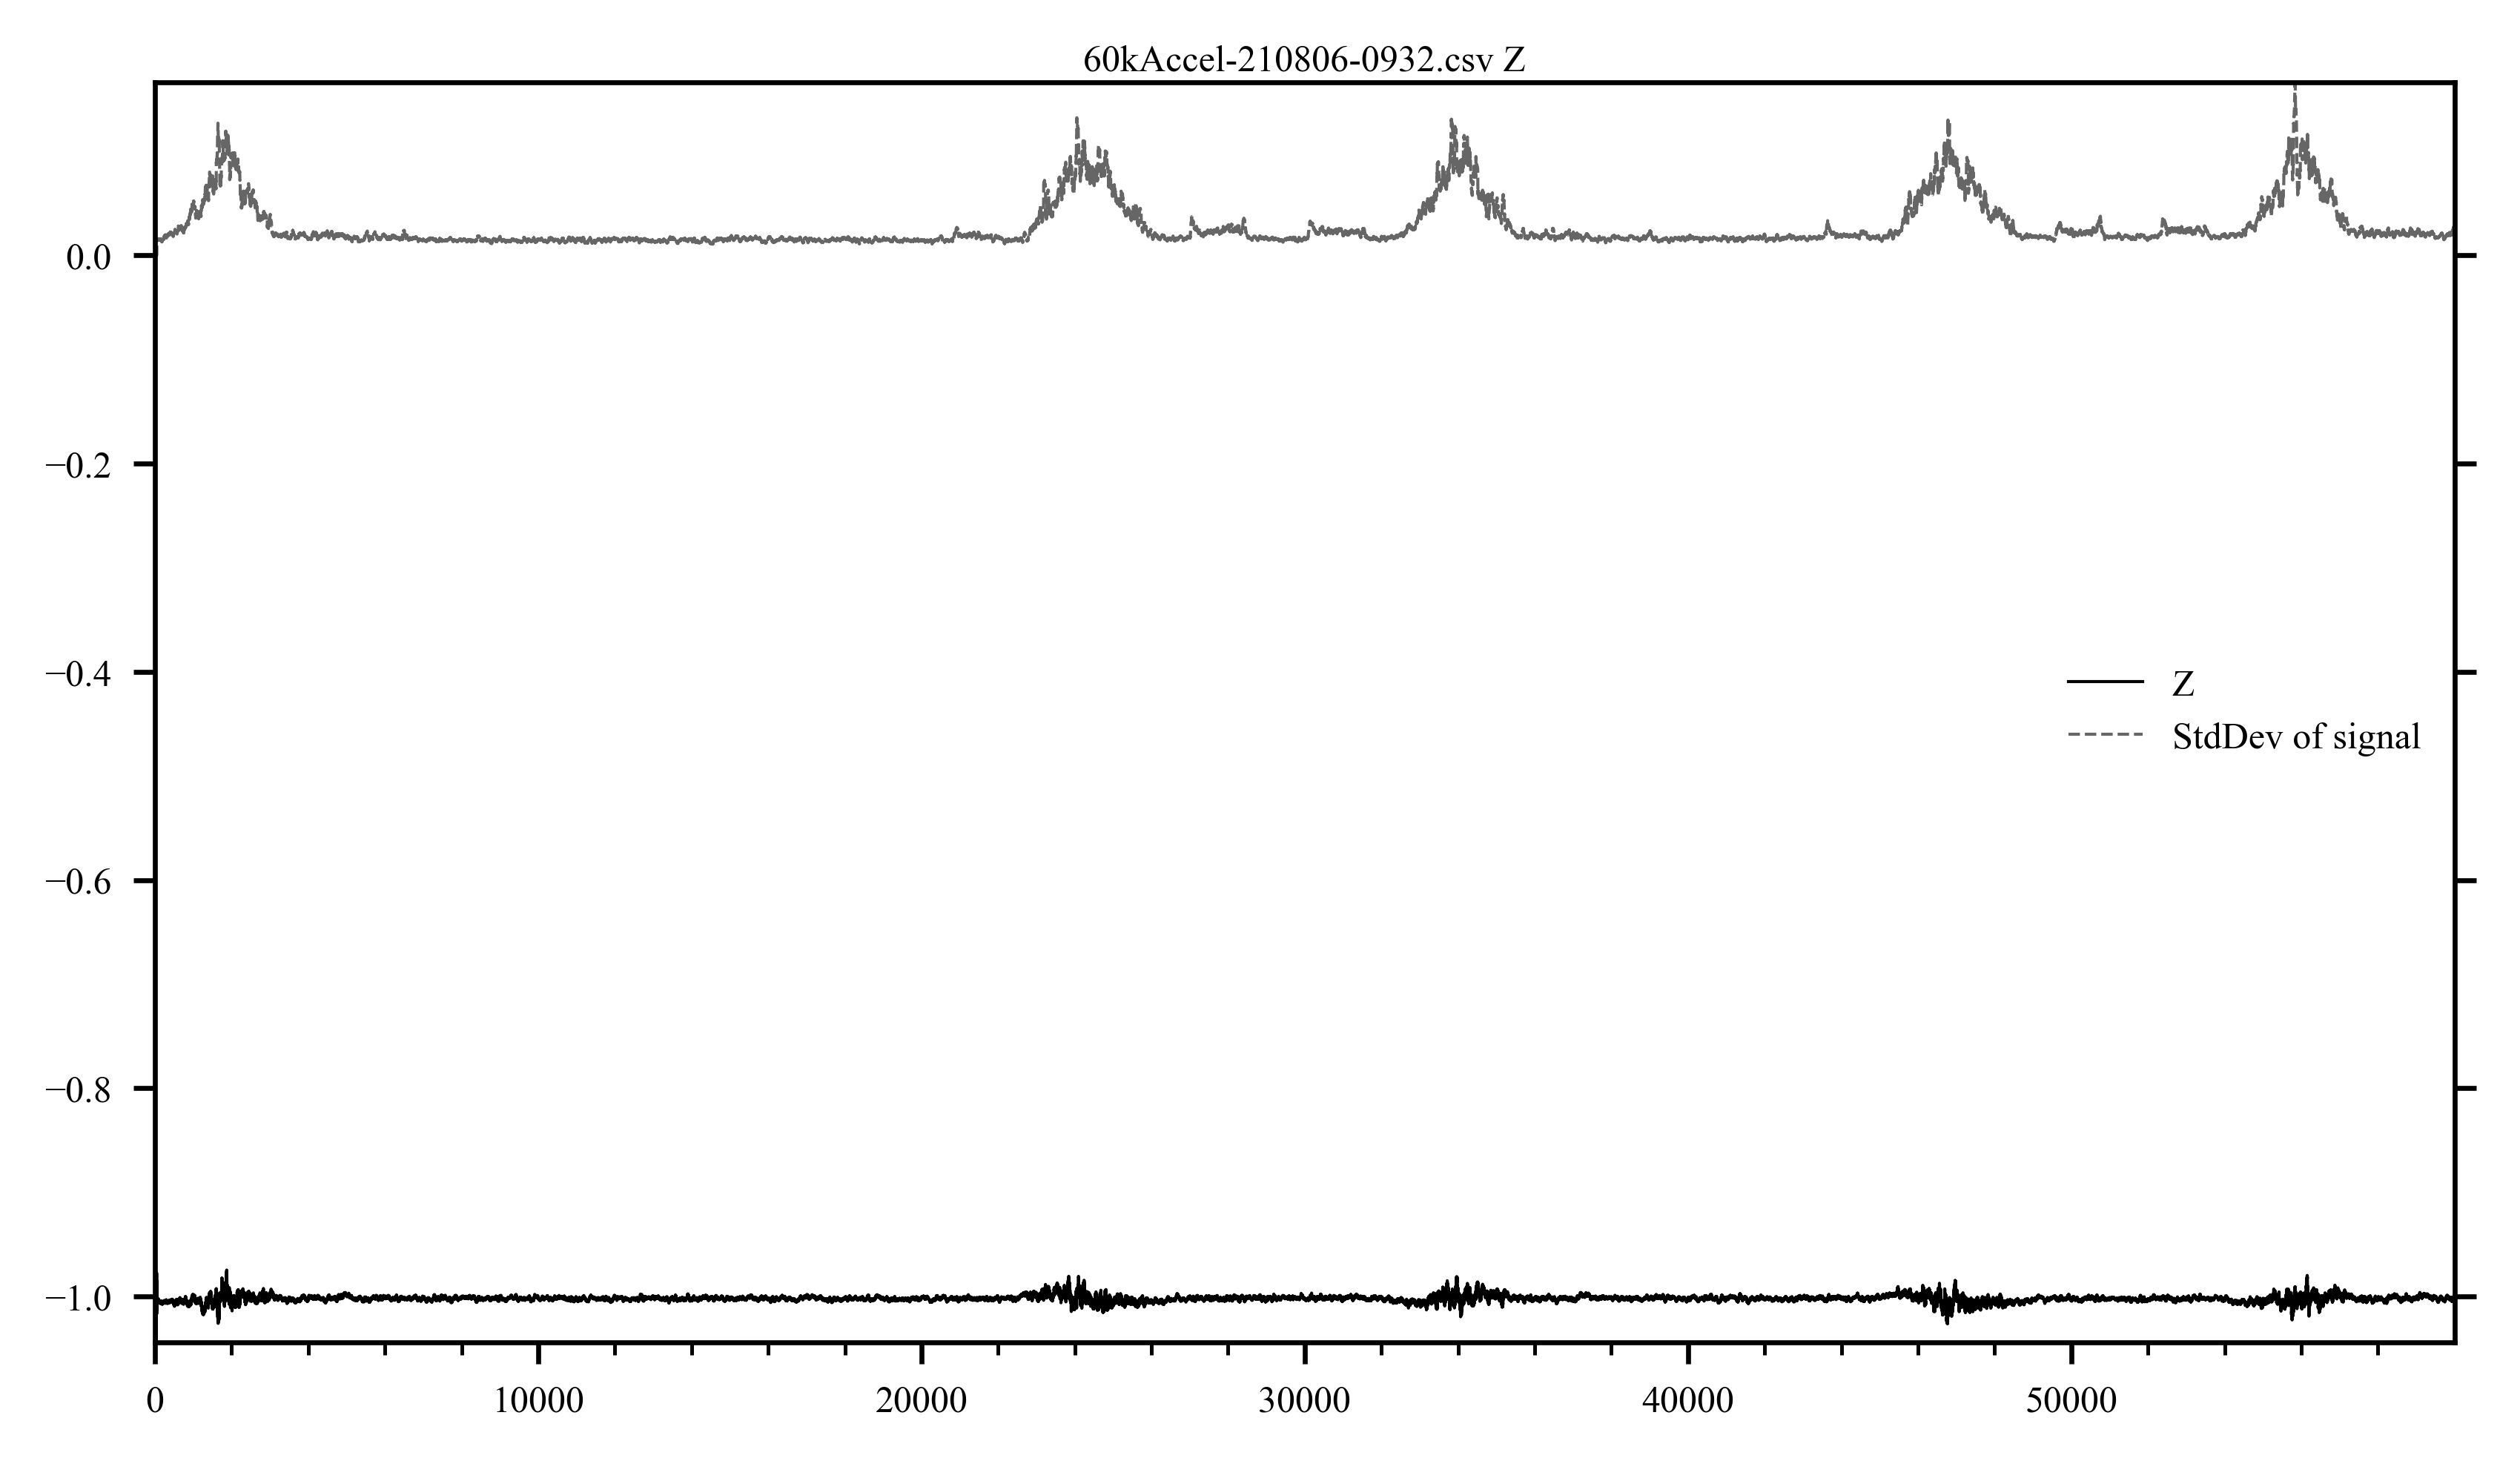

60kAccel-210806-0932.csv Z 0.166108711775003 -0.97216


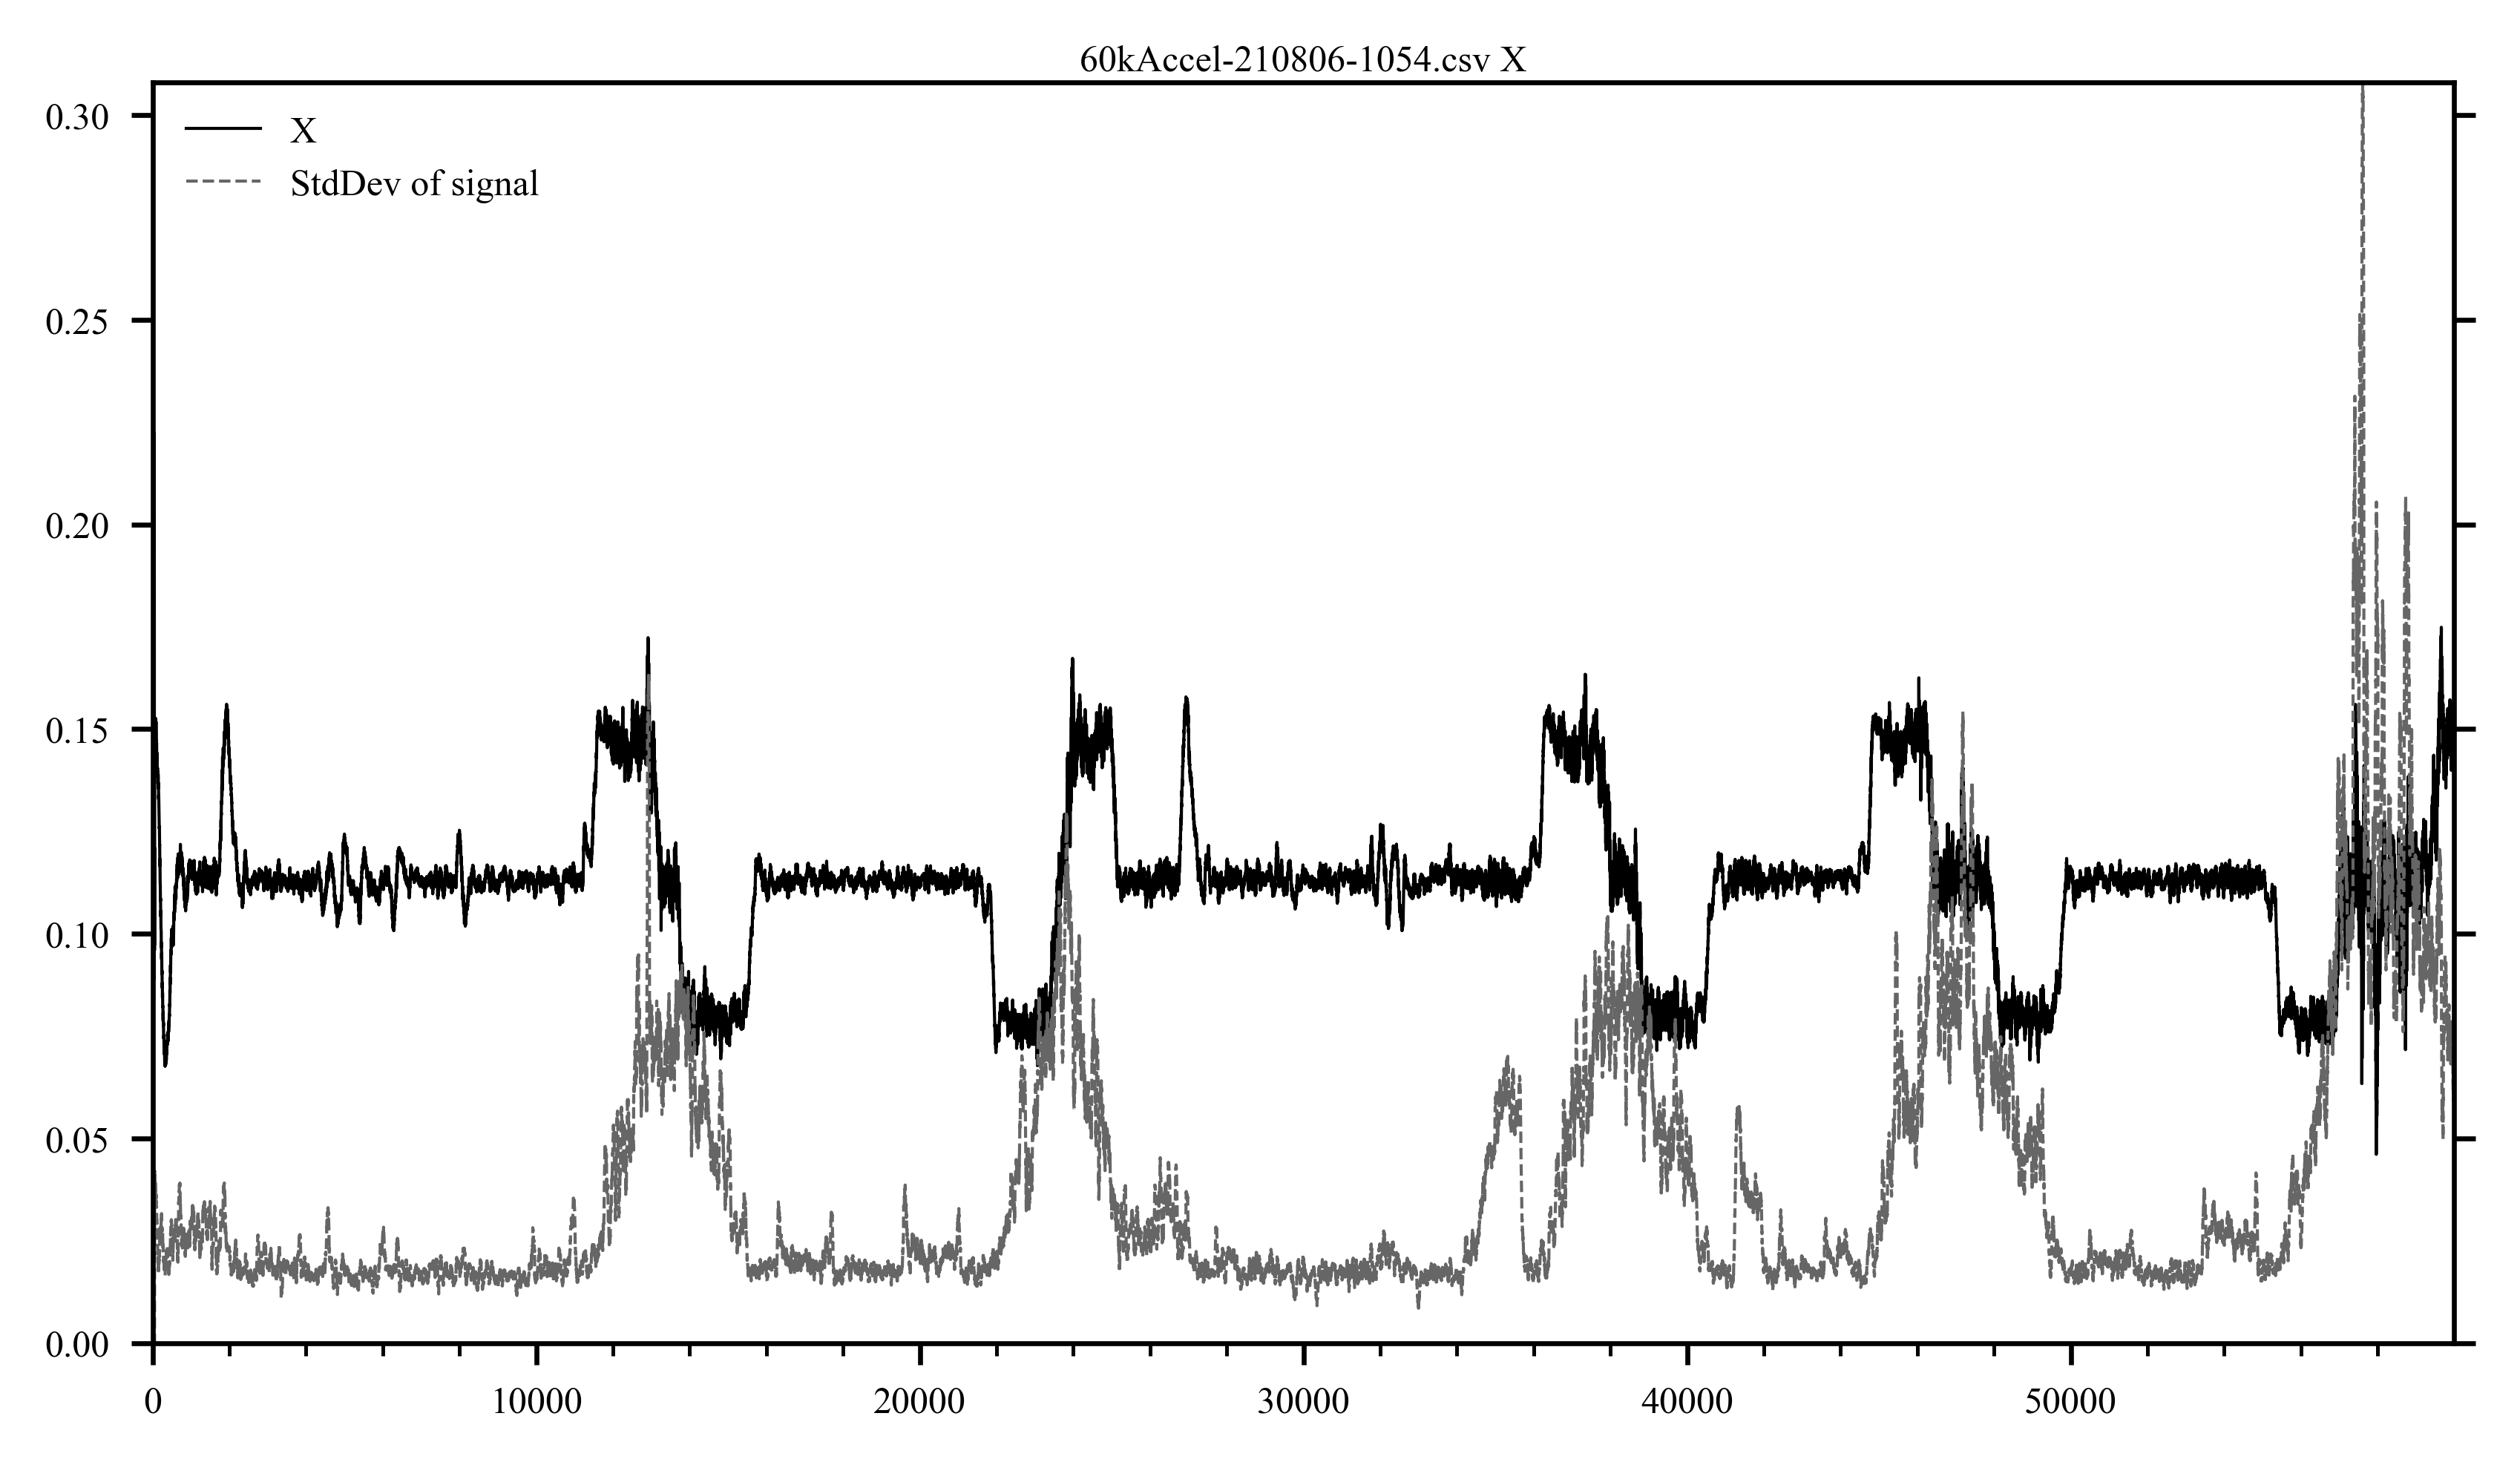

60kAccel-210806-1054.csv X 0.30801183110751457 0.23681


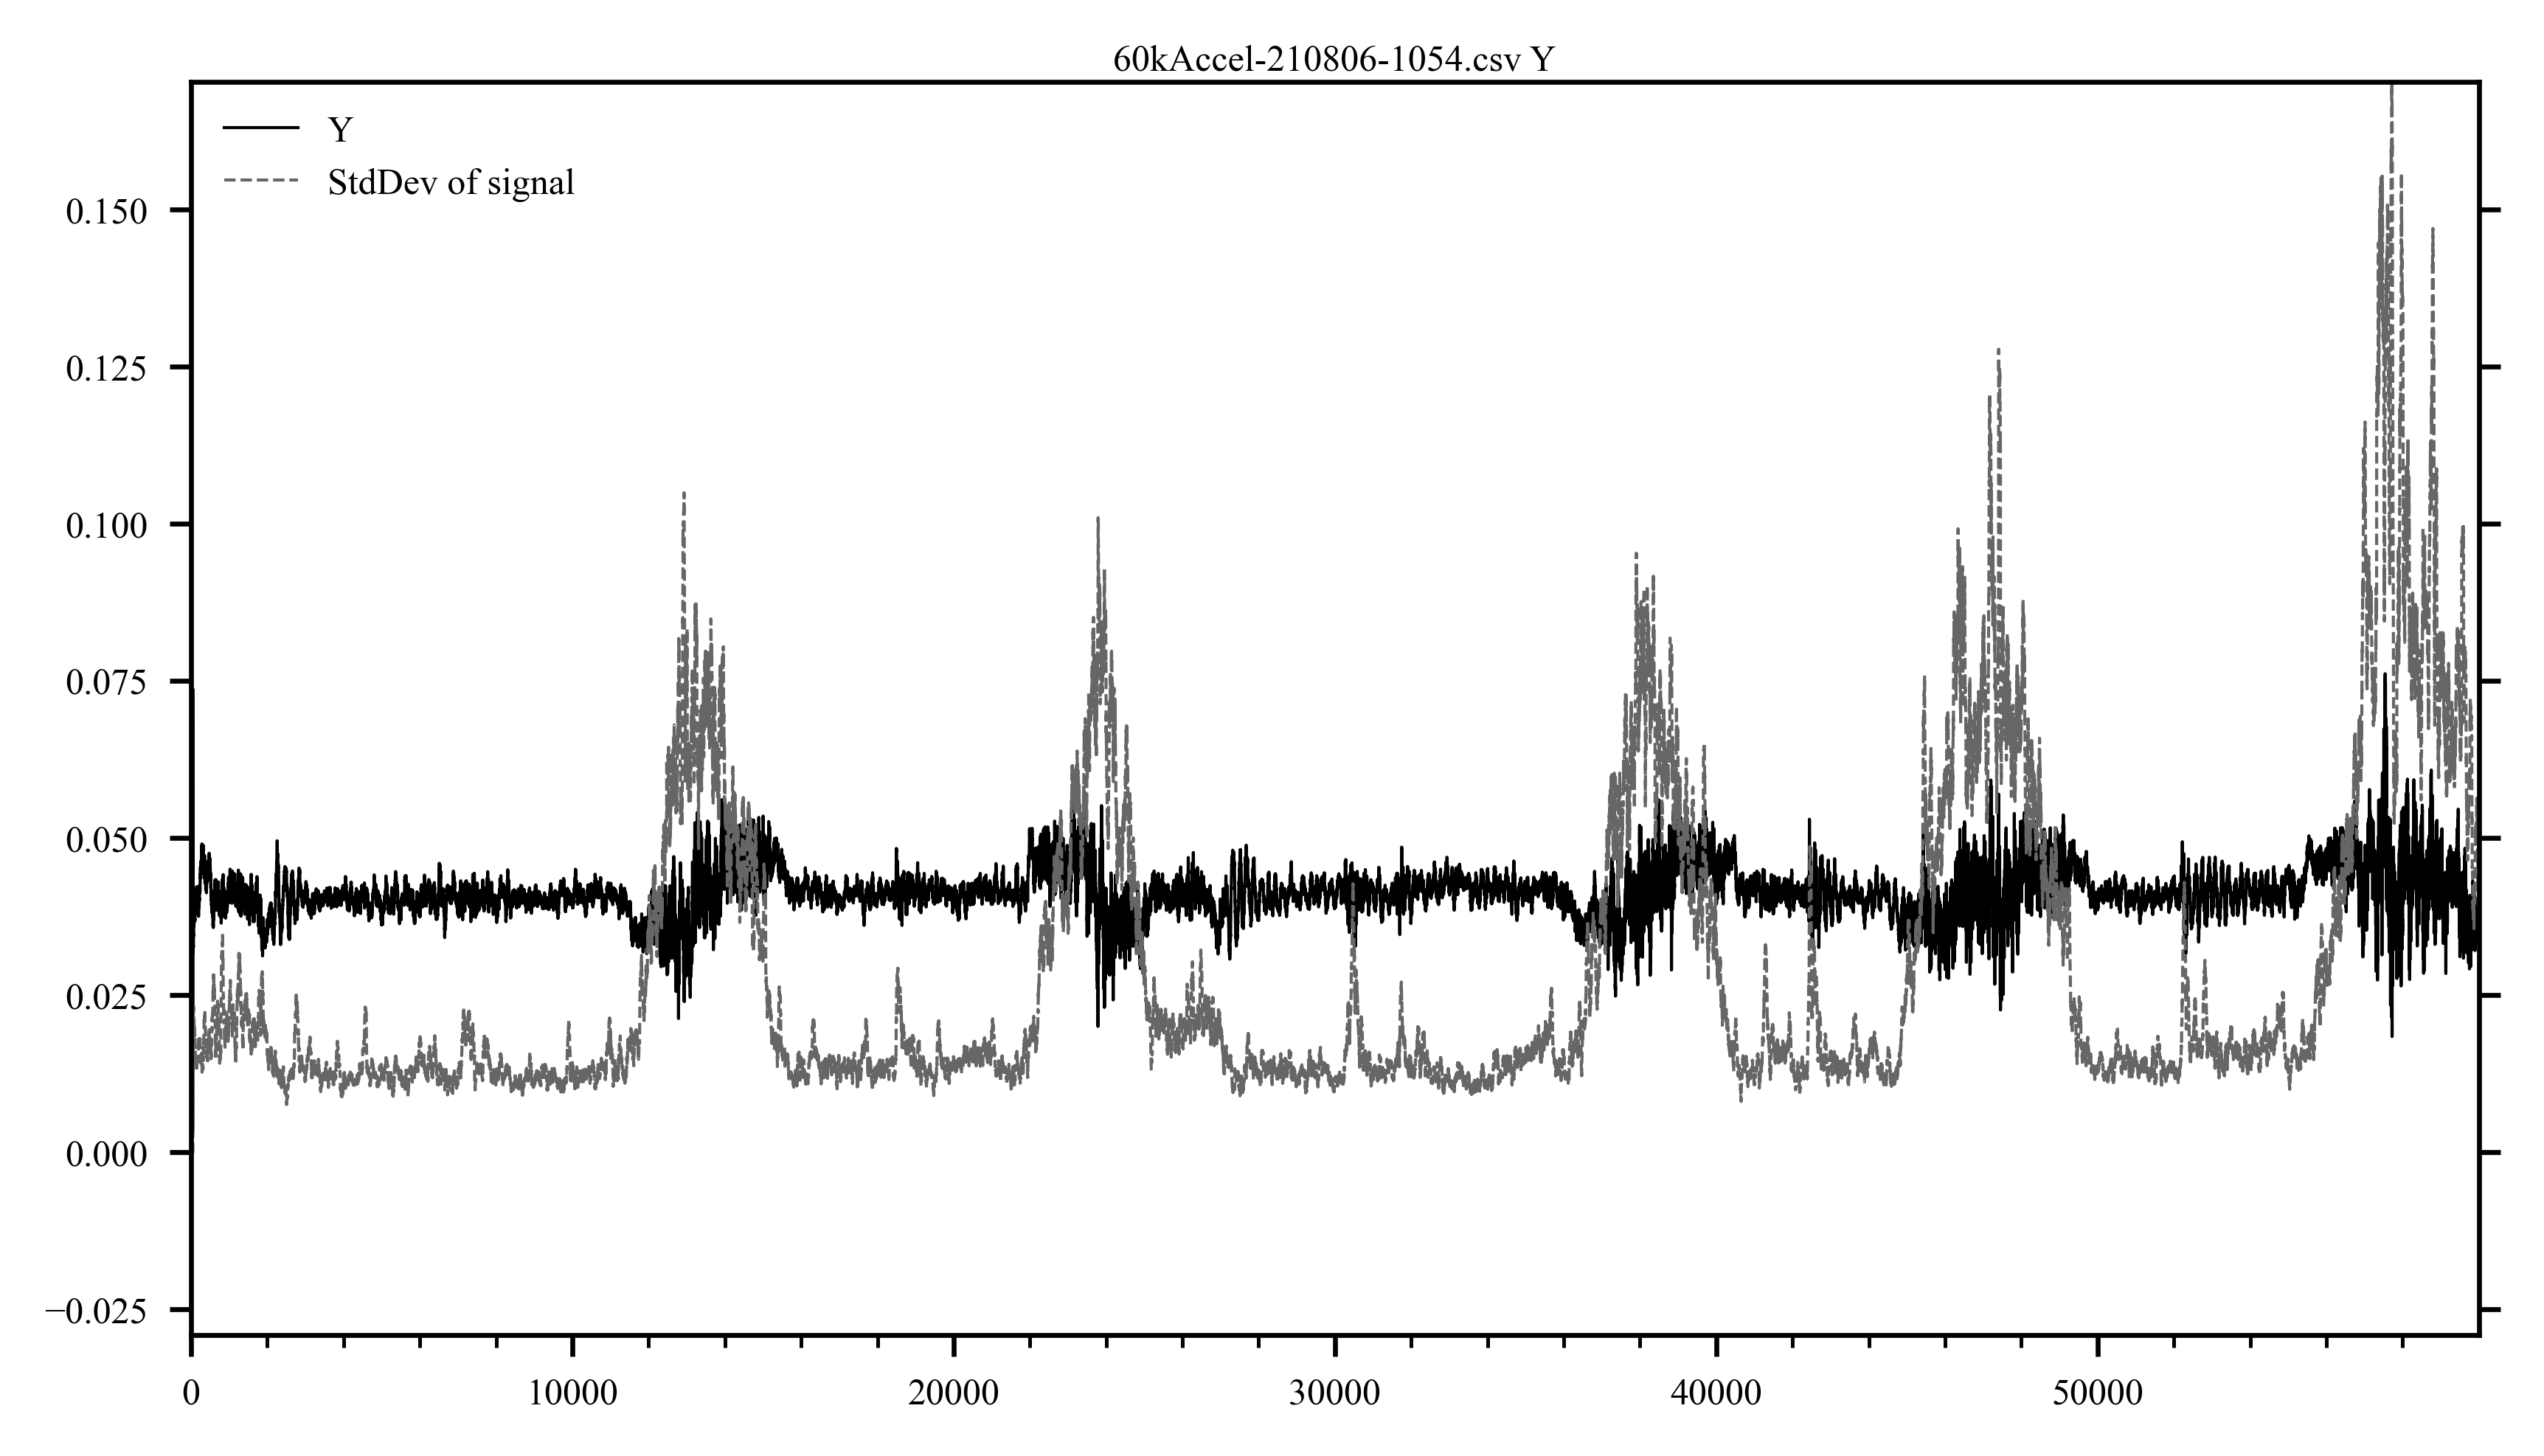

60kAccel-210806-1054.csv Y 0.17035008176273772 0.07614999999999998


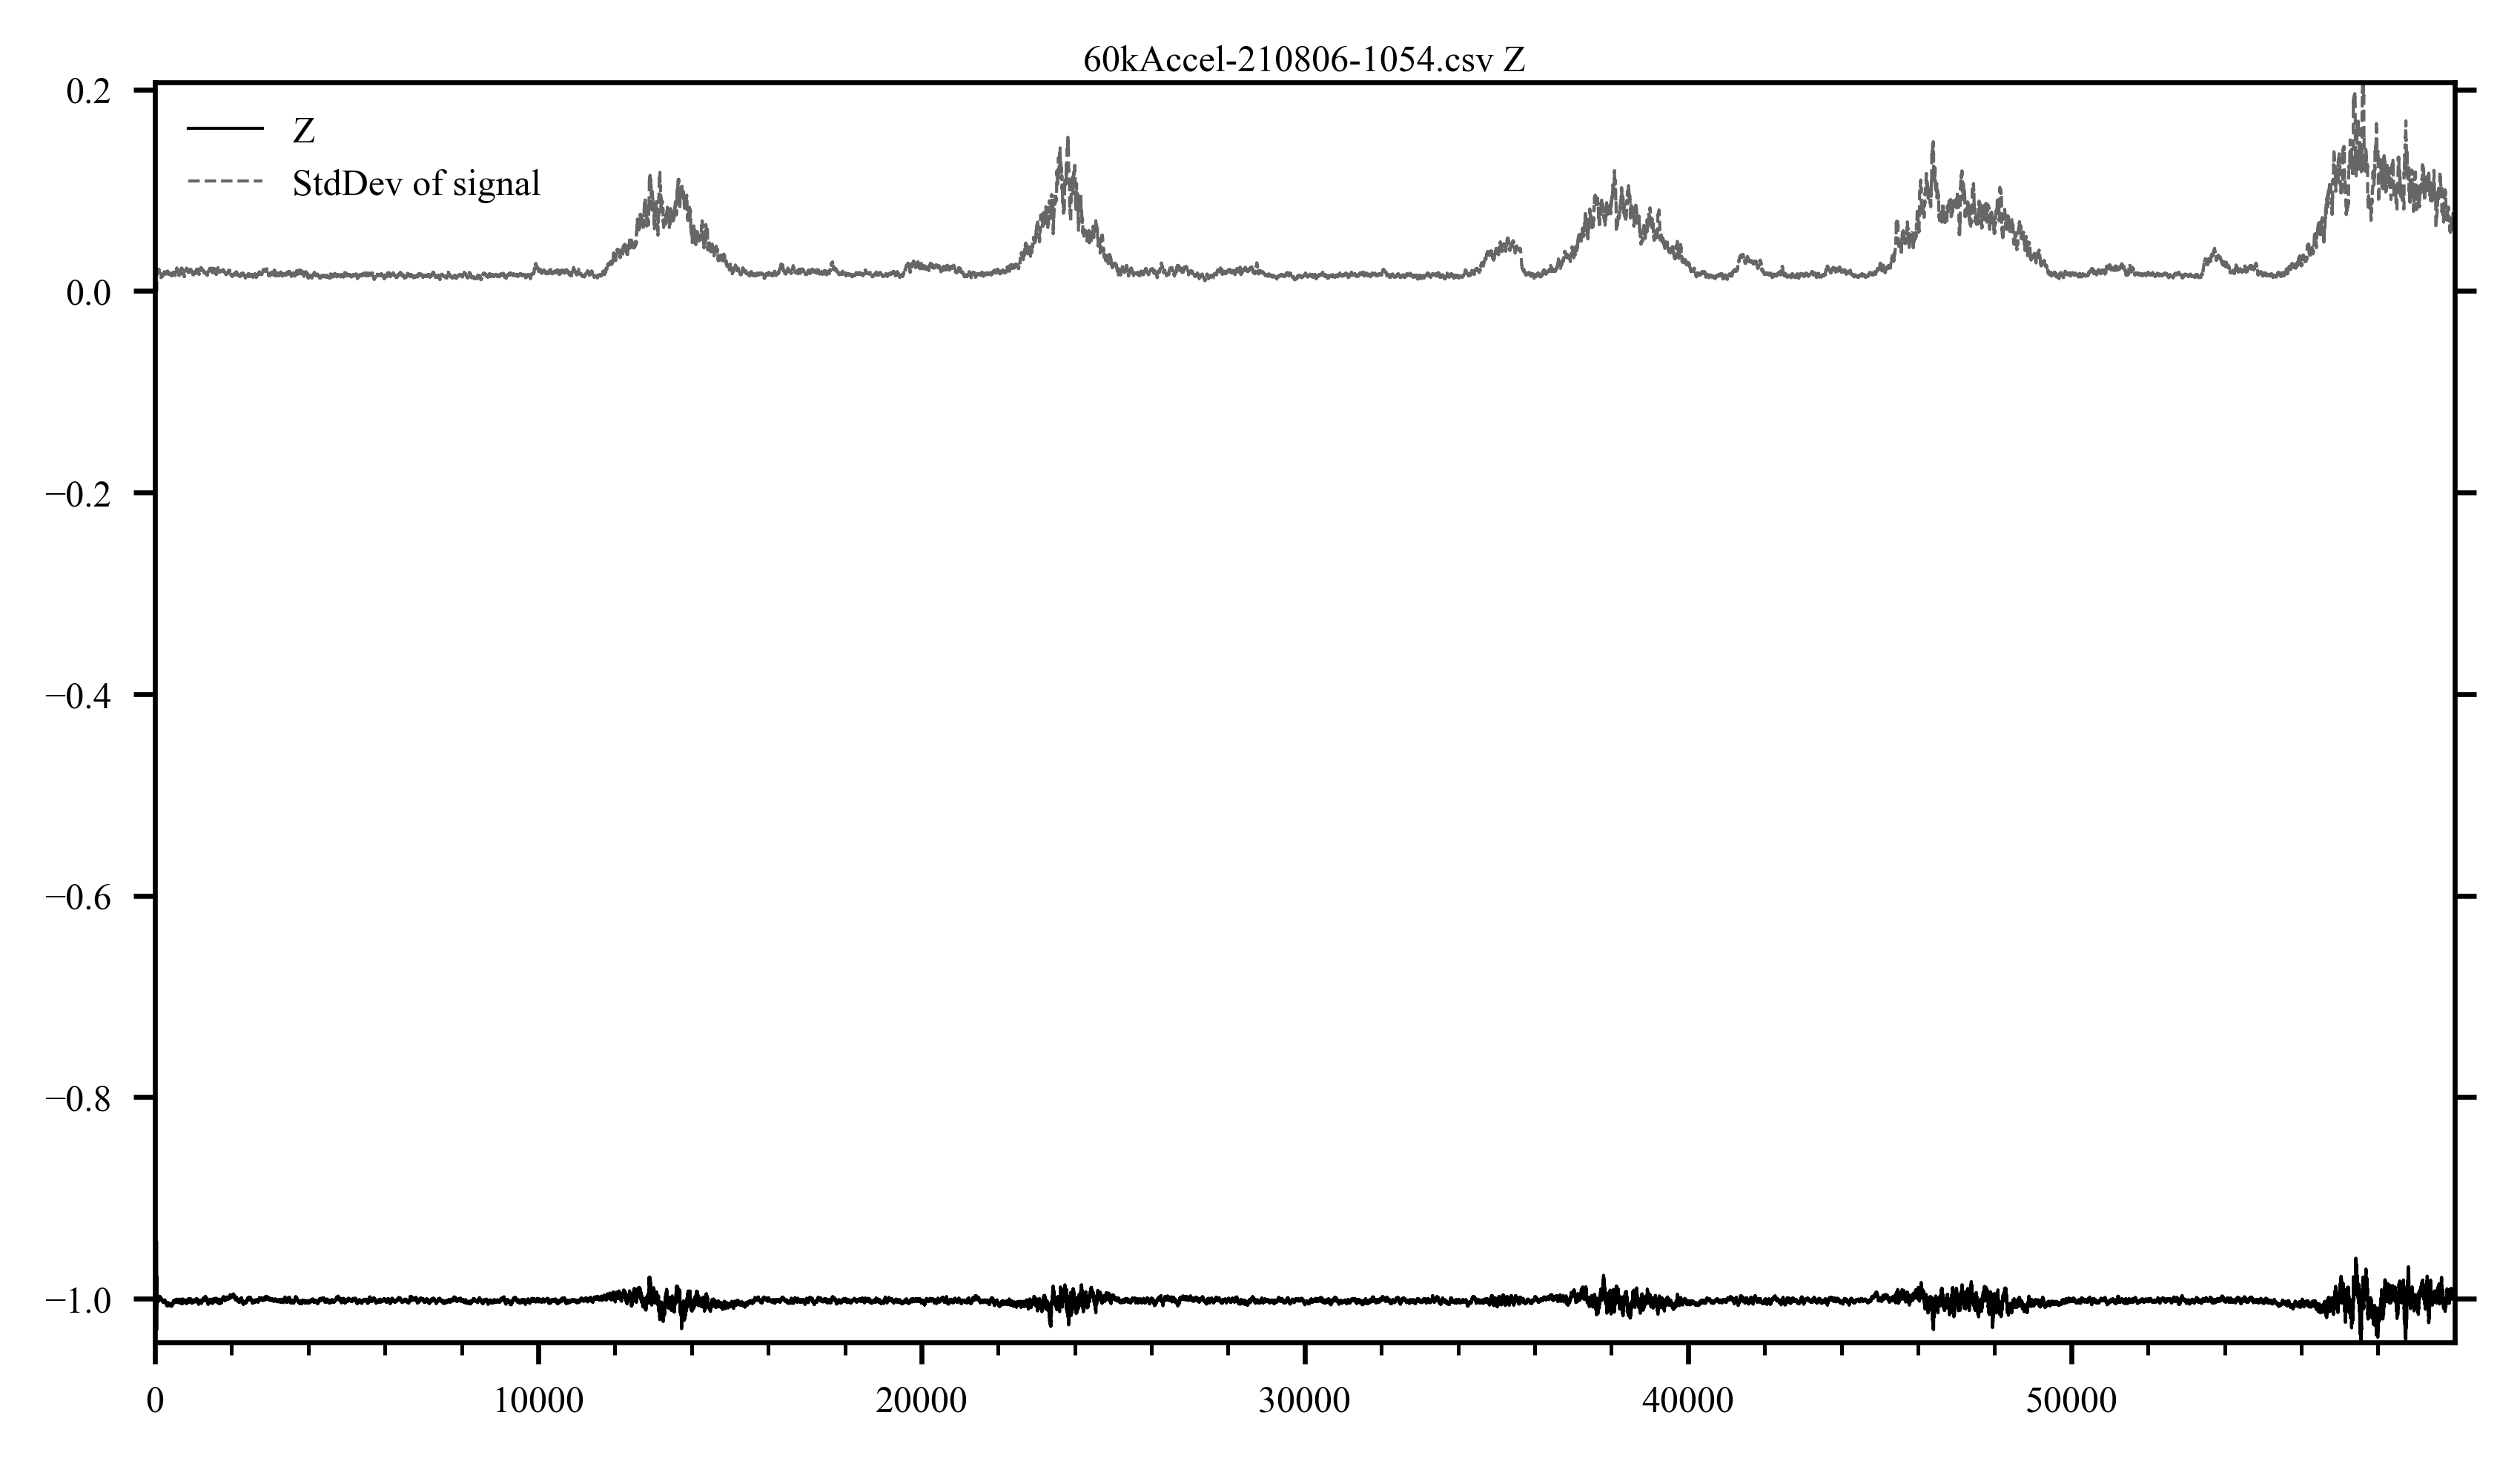

60kAccel-210806-1054.csv Z 0.20713139642186906 -0.94335


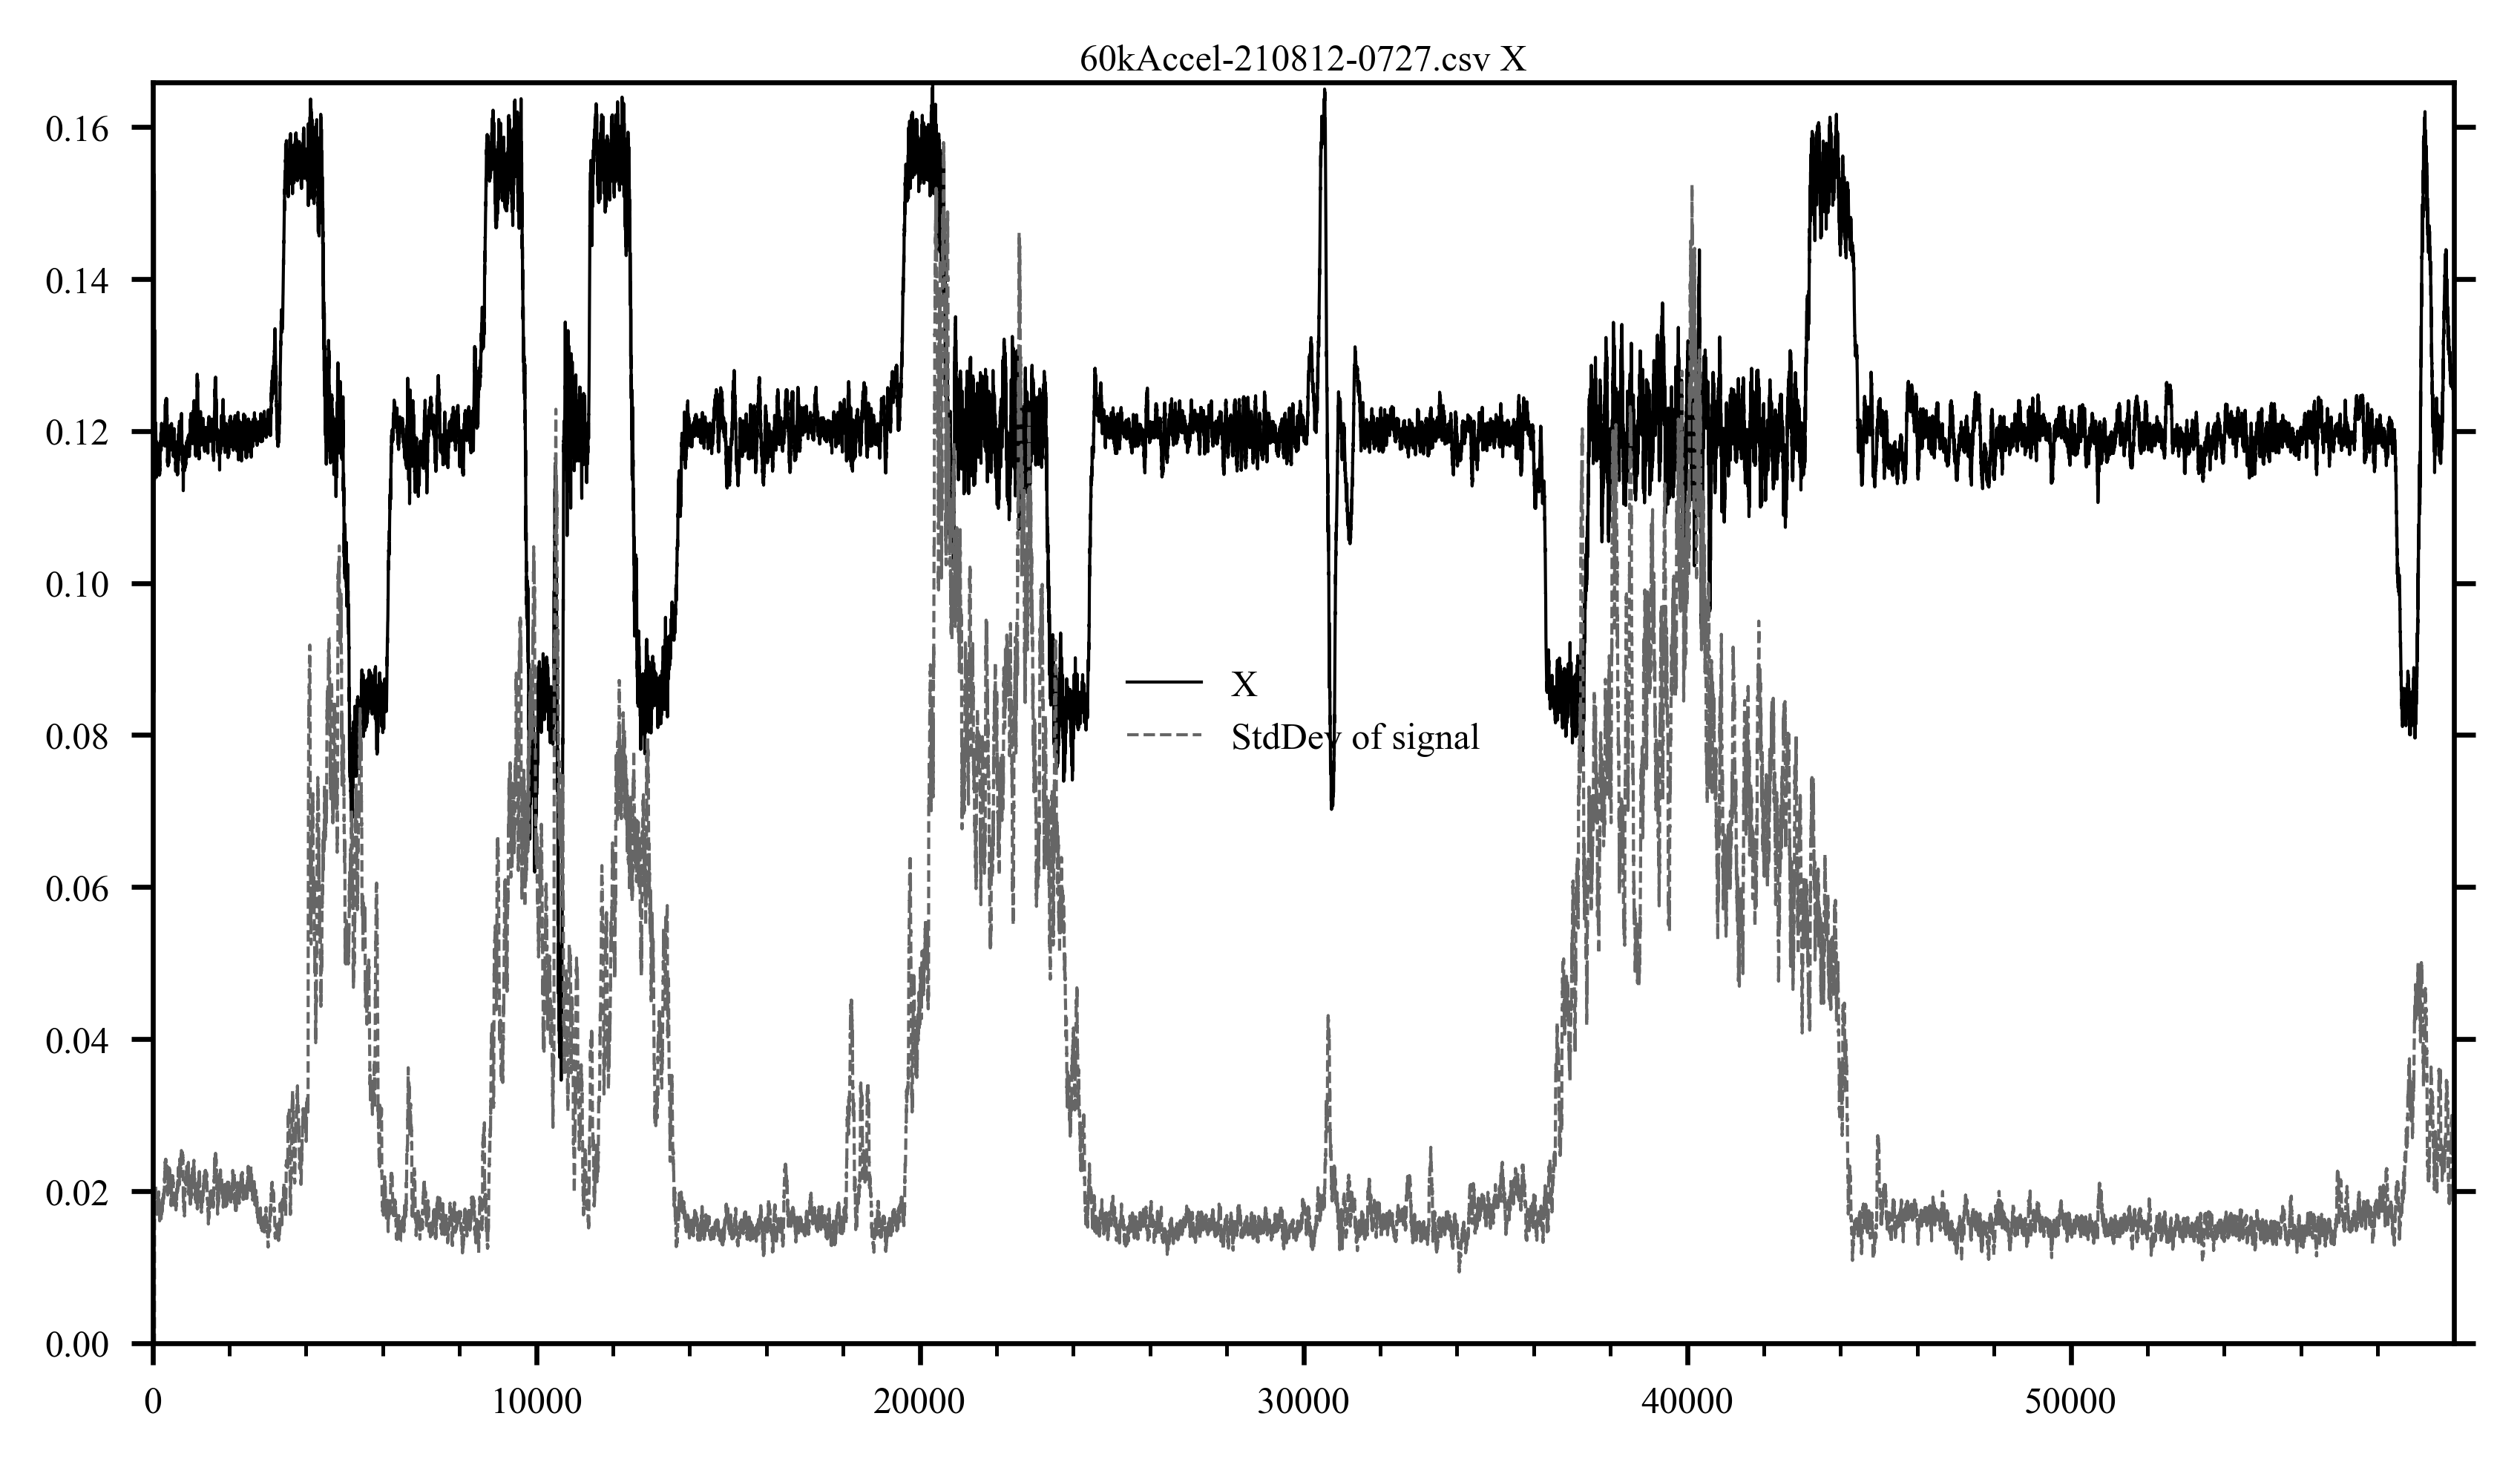

60kAccel-210812-0727.csv X 0.15794926036340576 0.16586920000000002


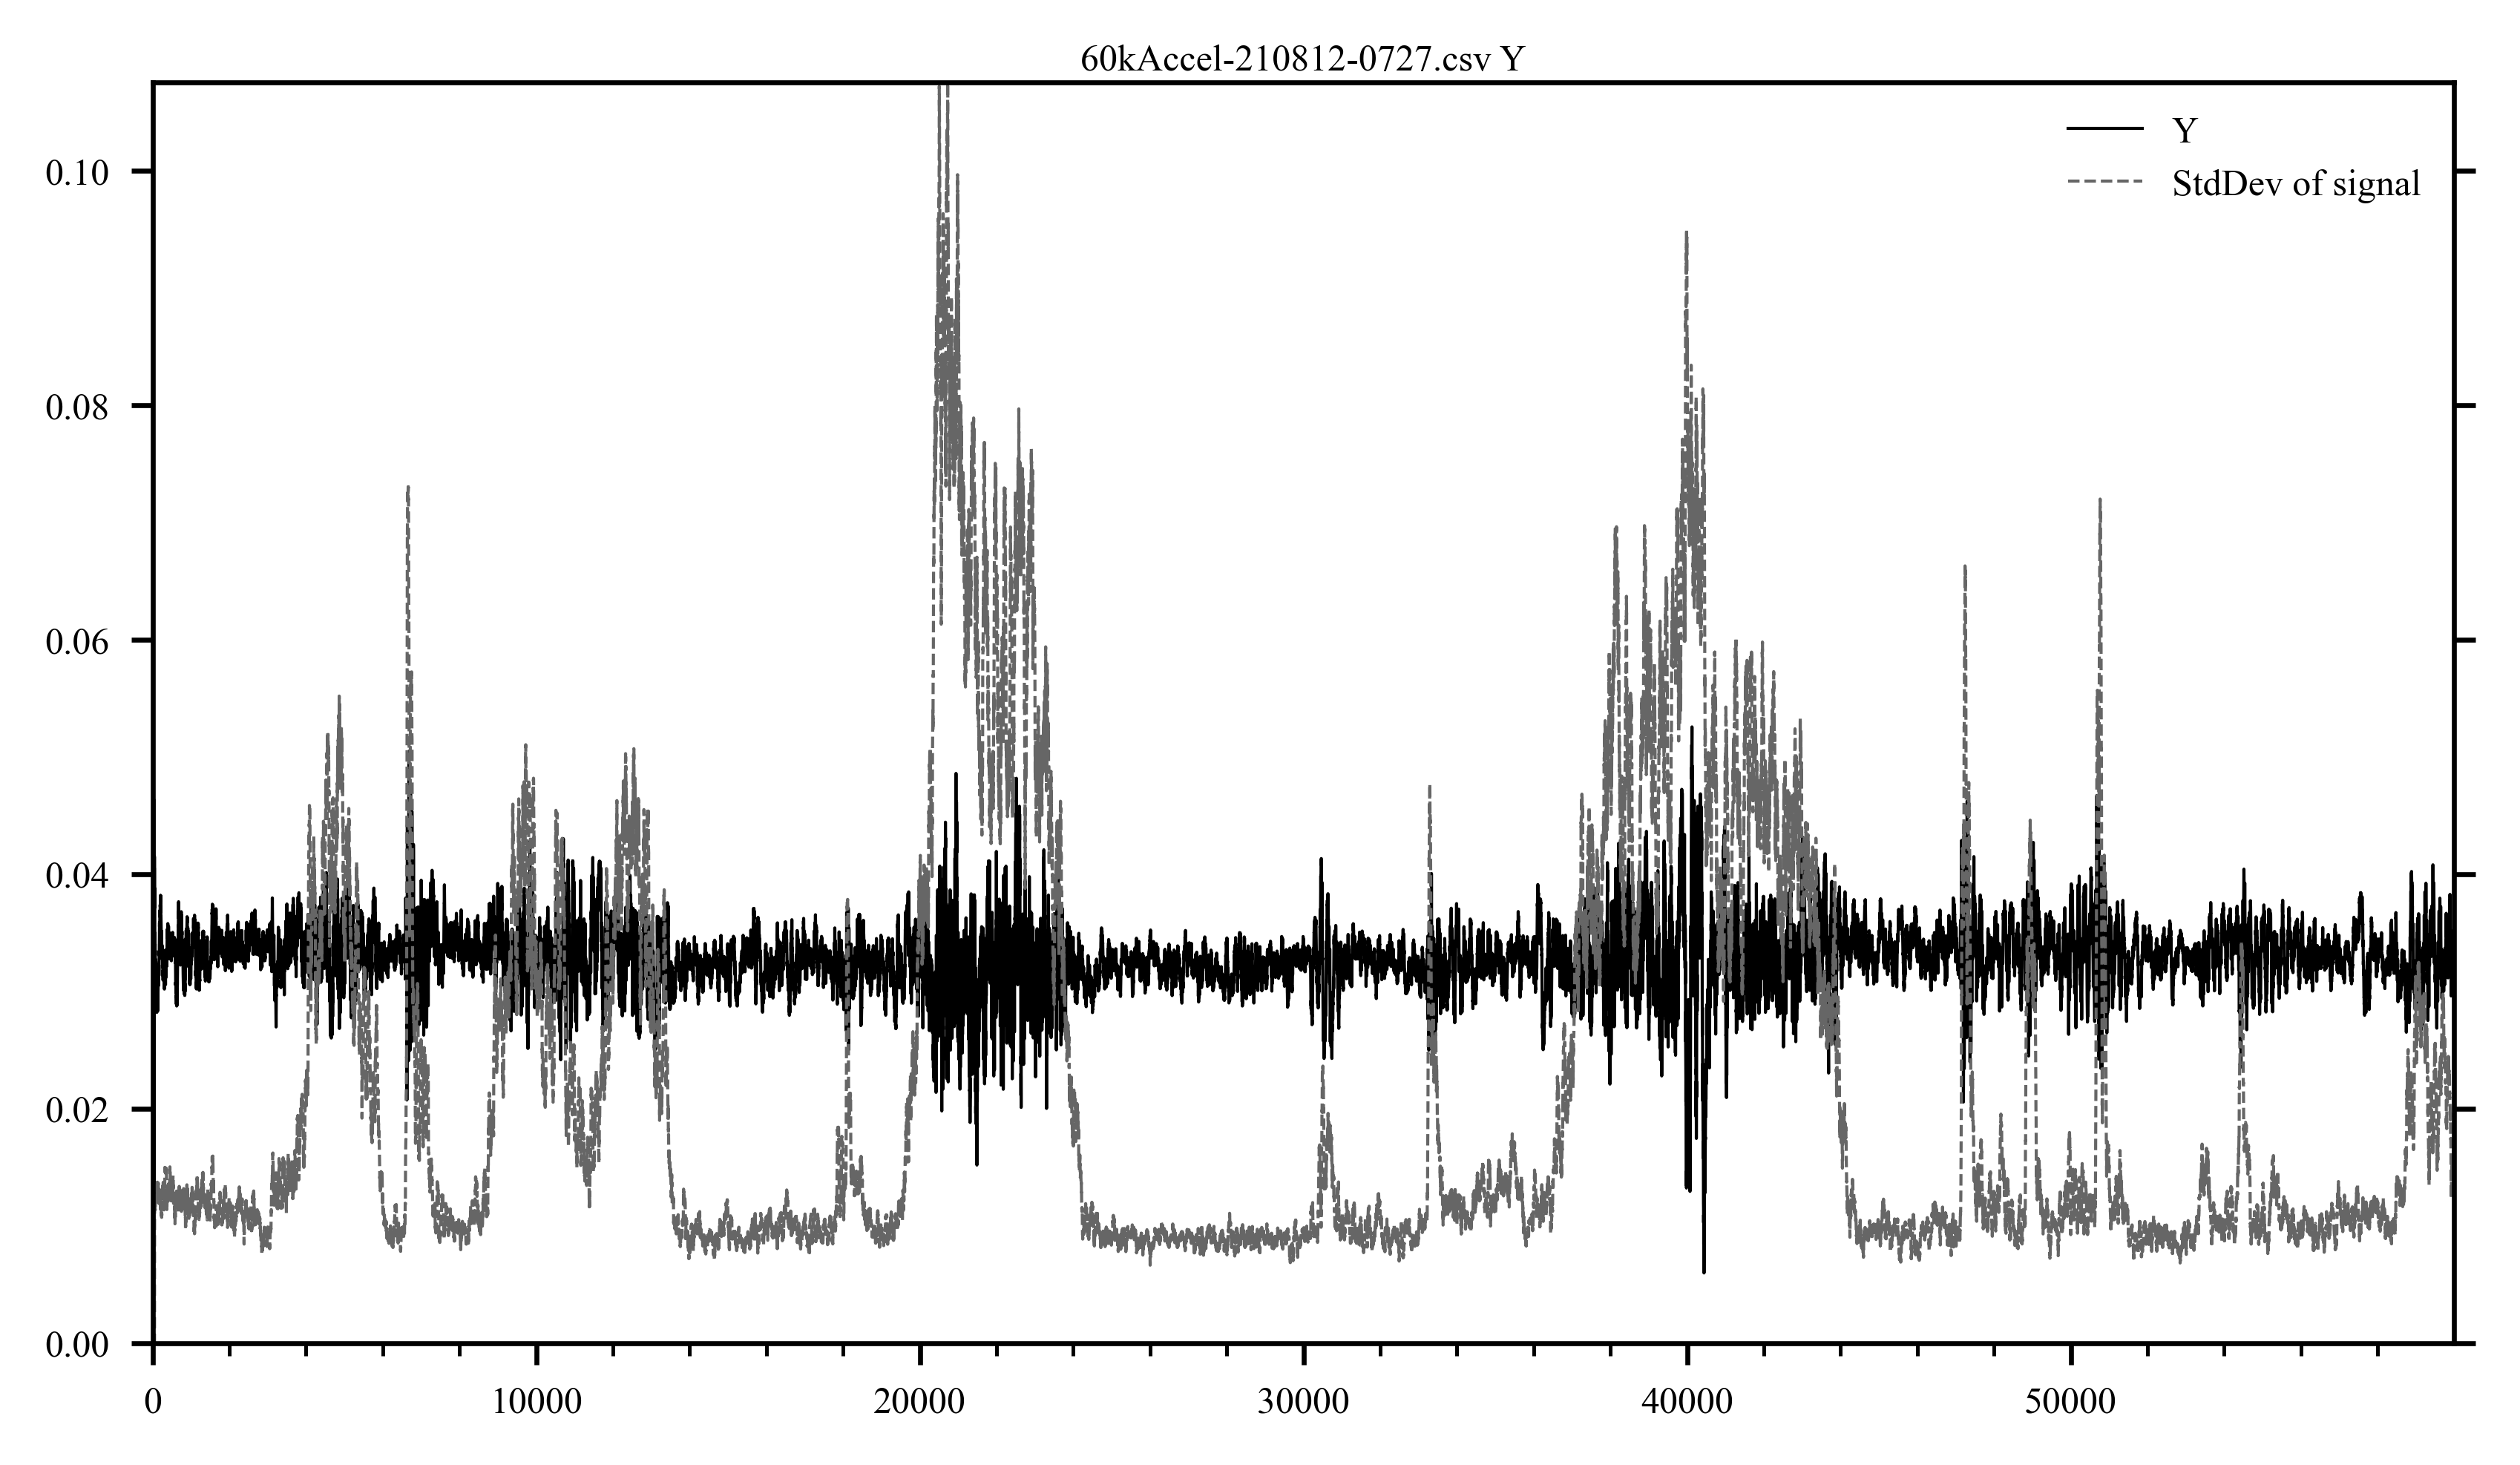

60kAccel-210812-0727.csv Y 0.10752829243278349 0.05957


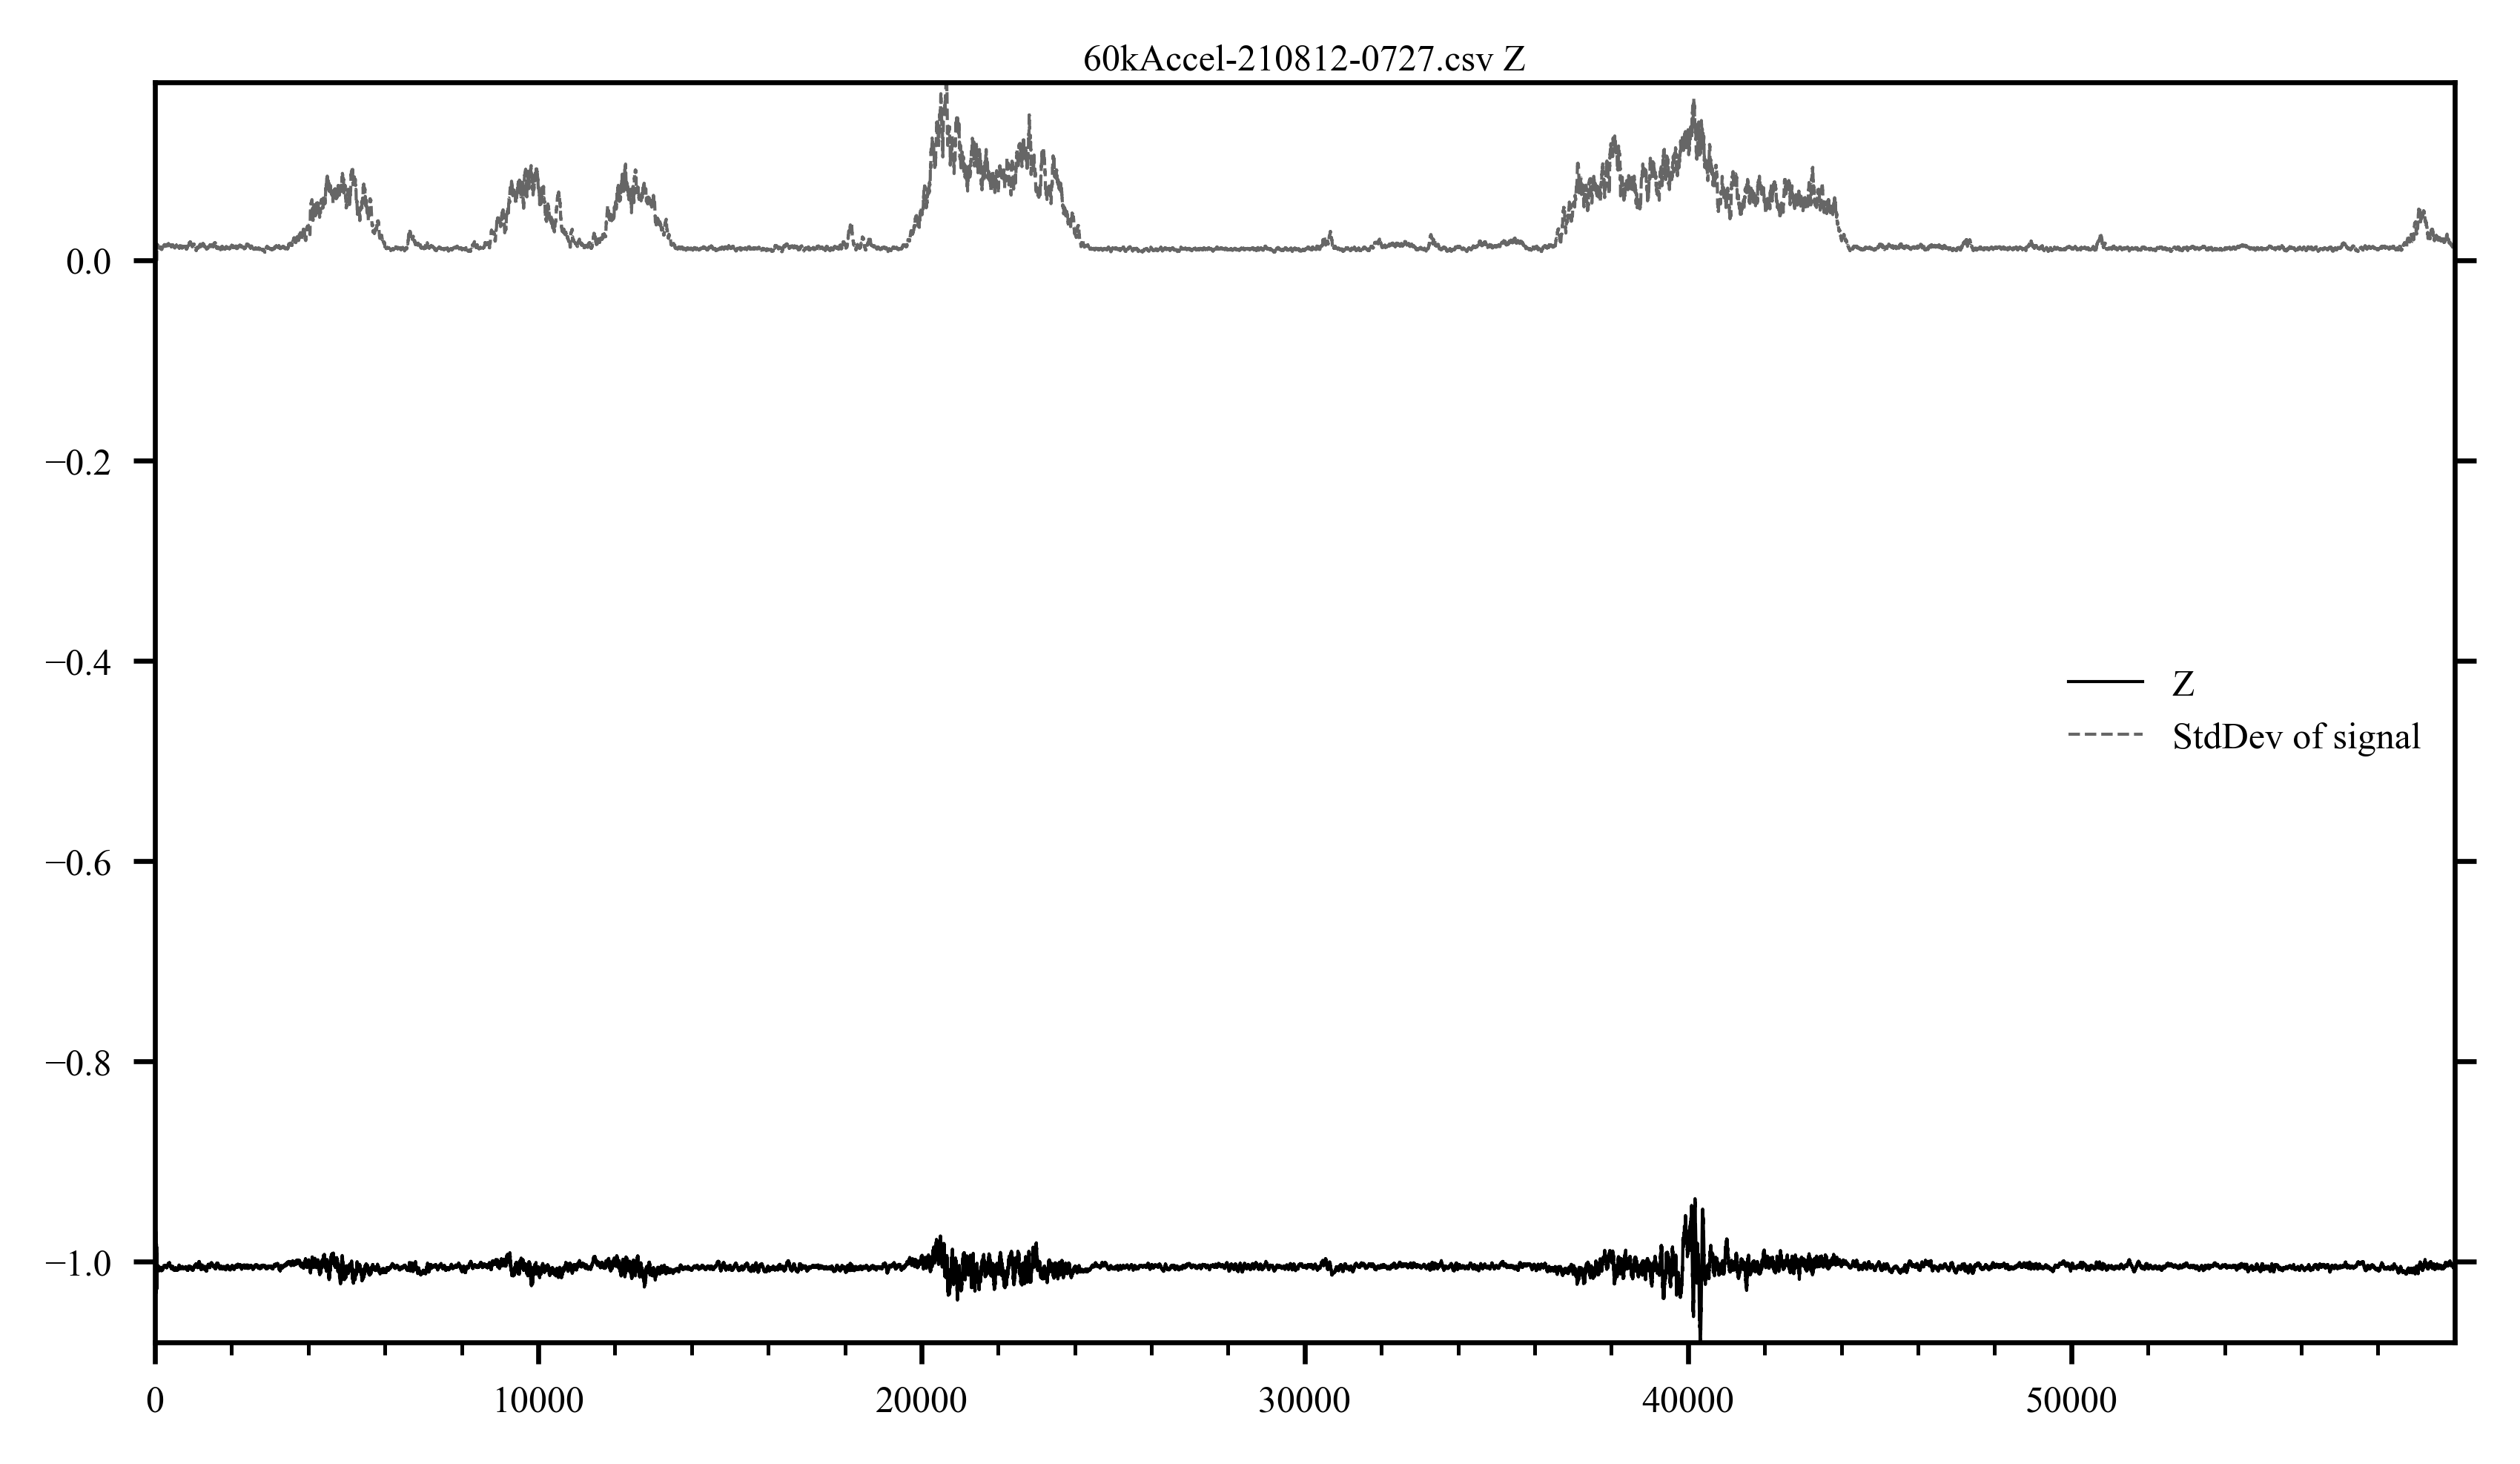

60kAccel-210812-0727.csv Z 0.17757700759607226 -0.9370562


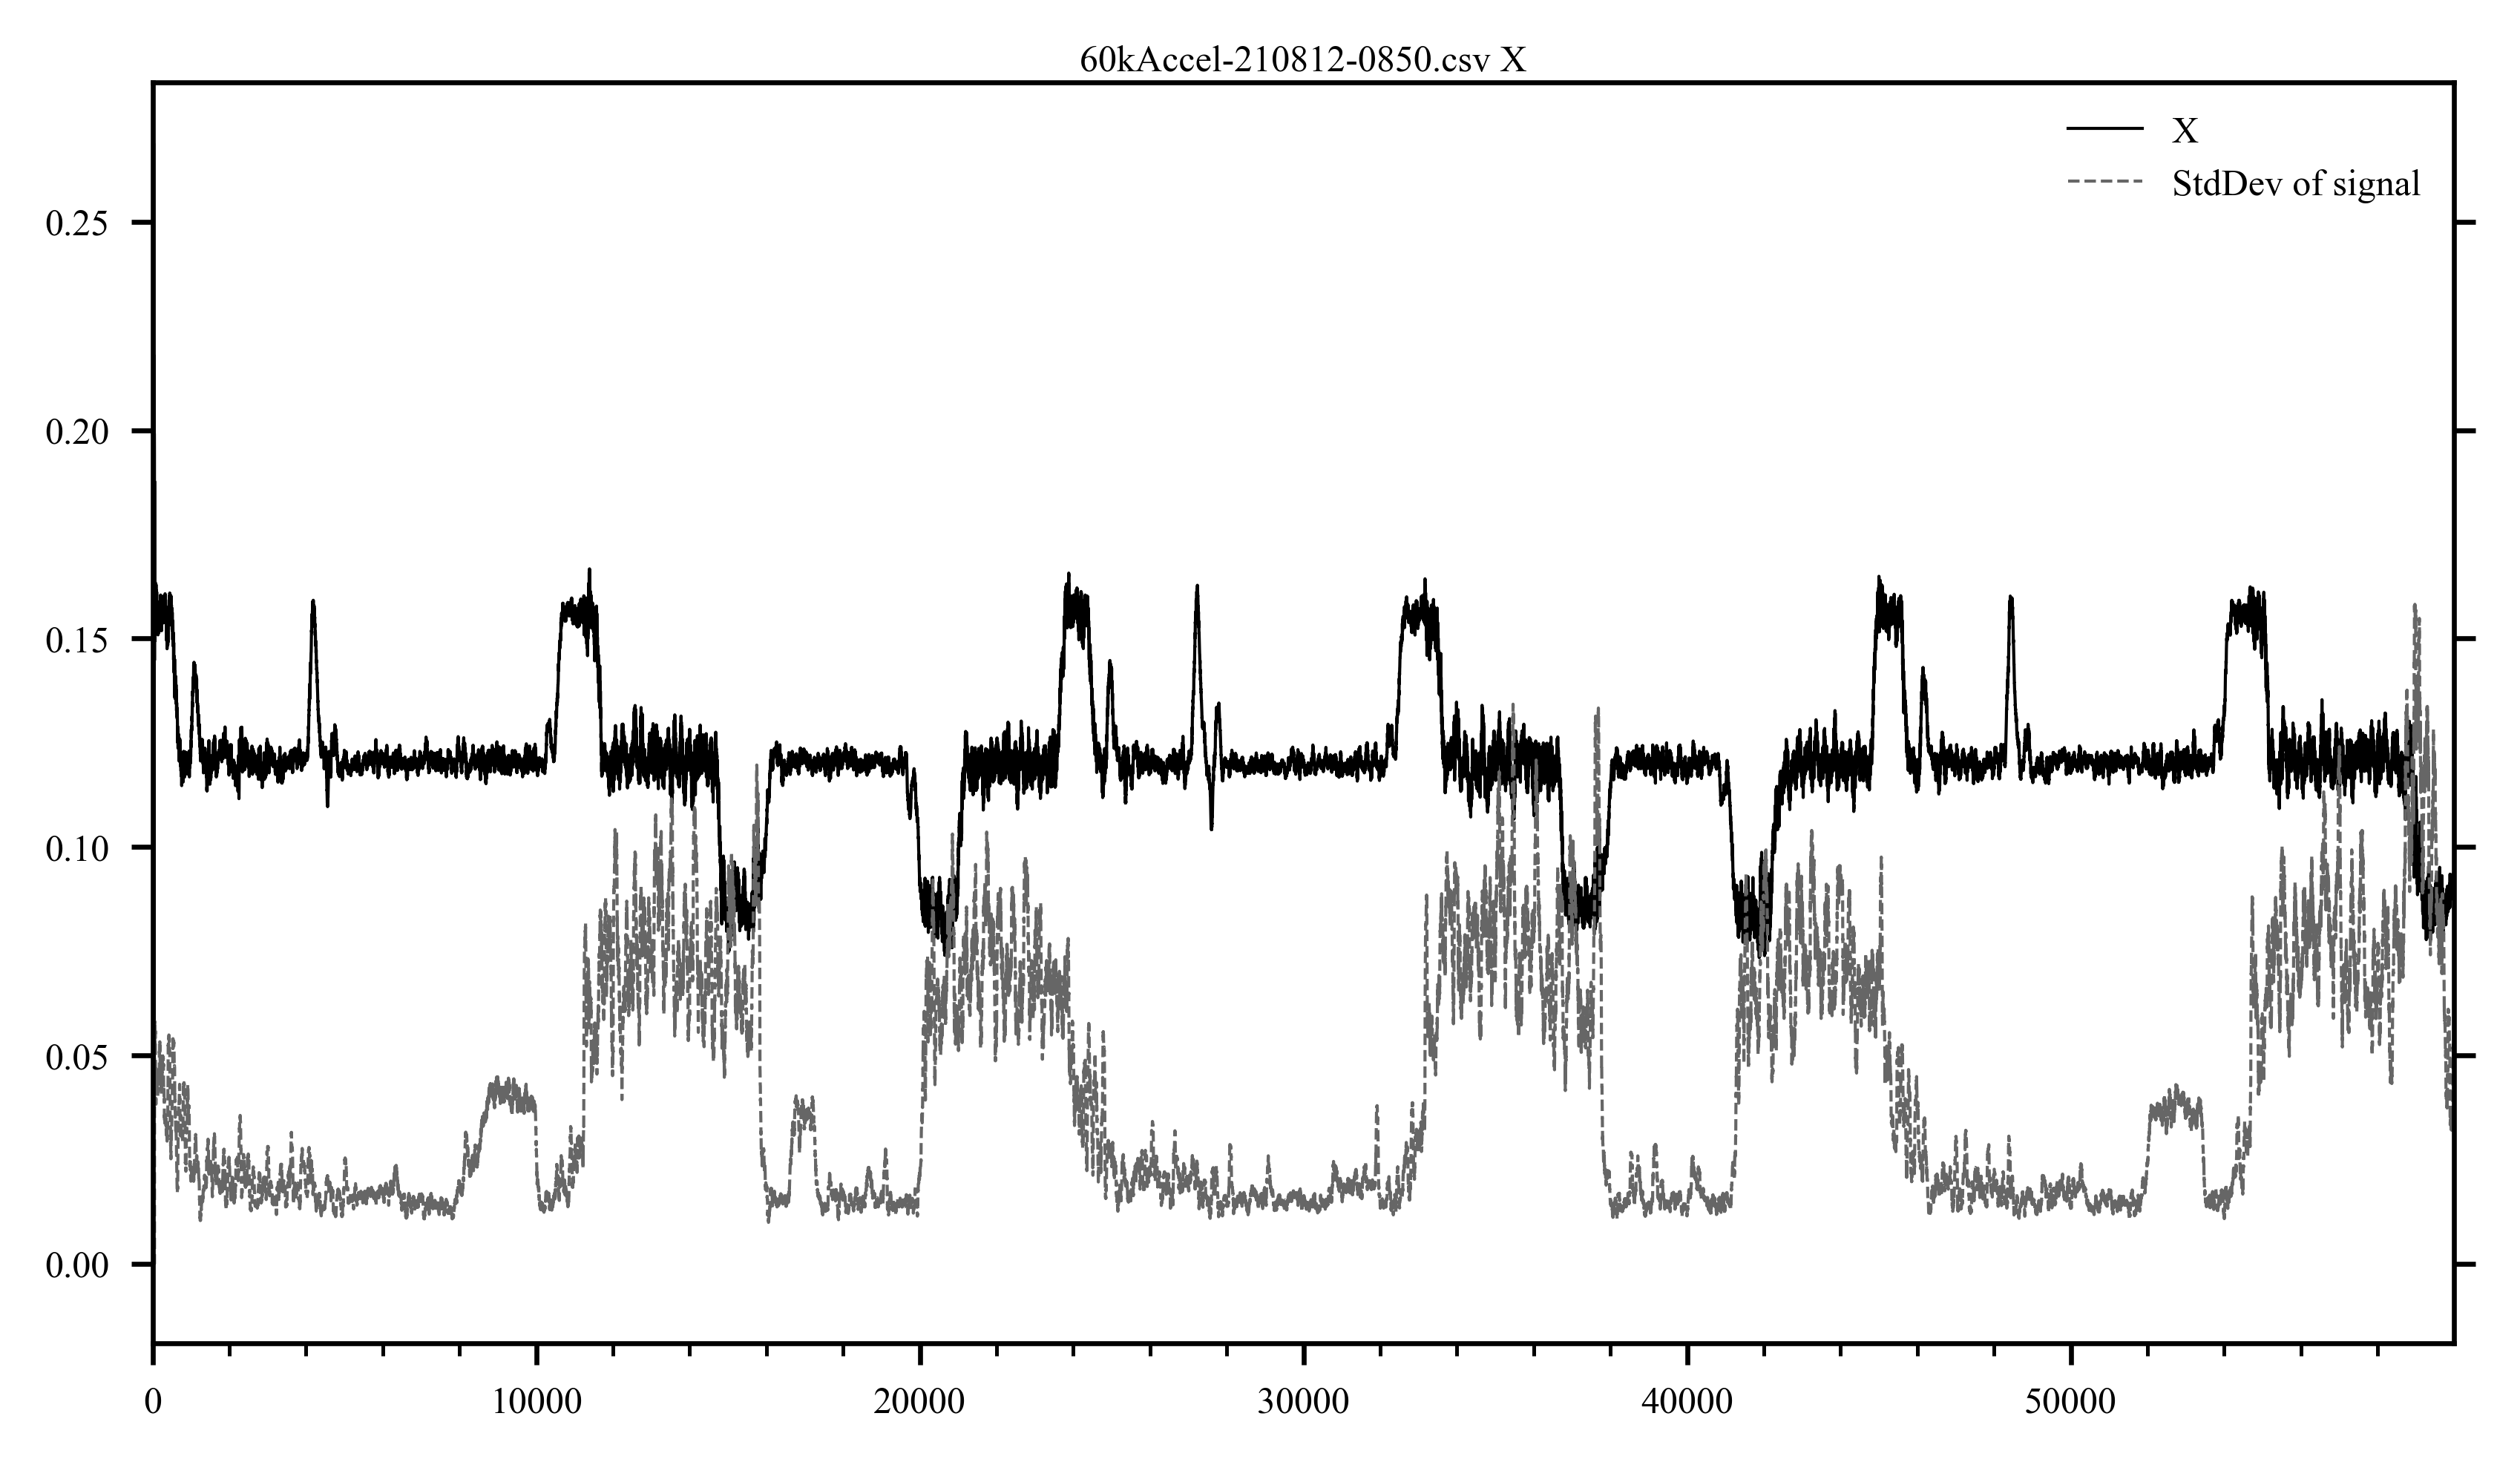

60kAccel-210812-0850.csv X 0.15819916520381413 0.28344


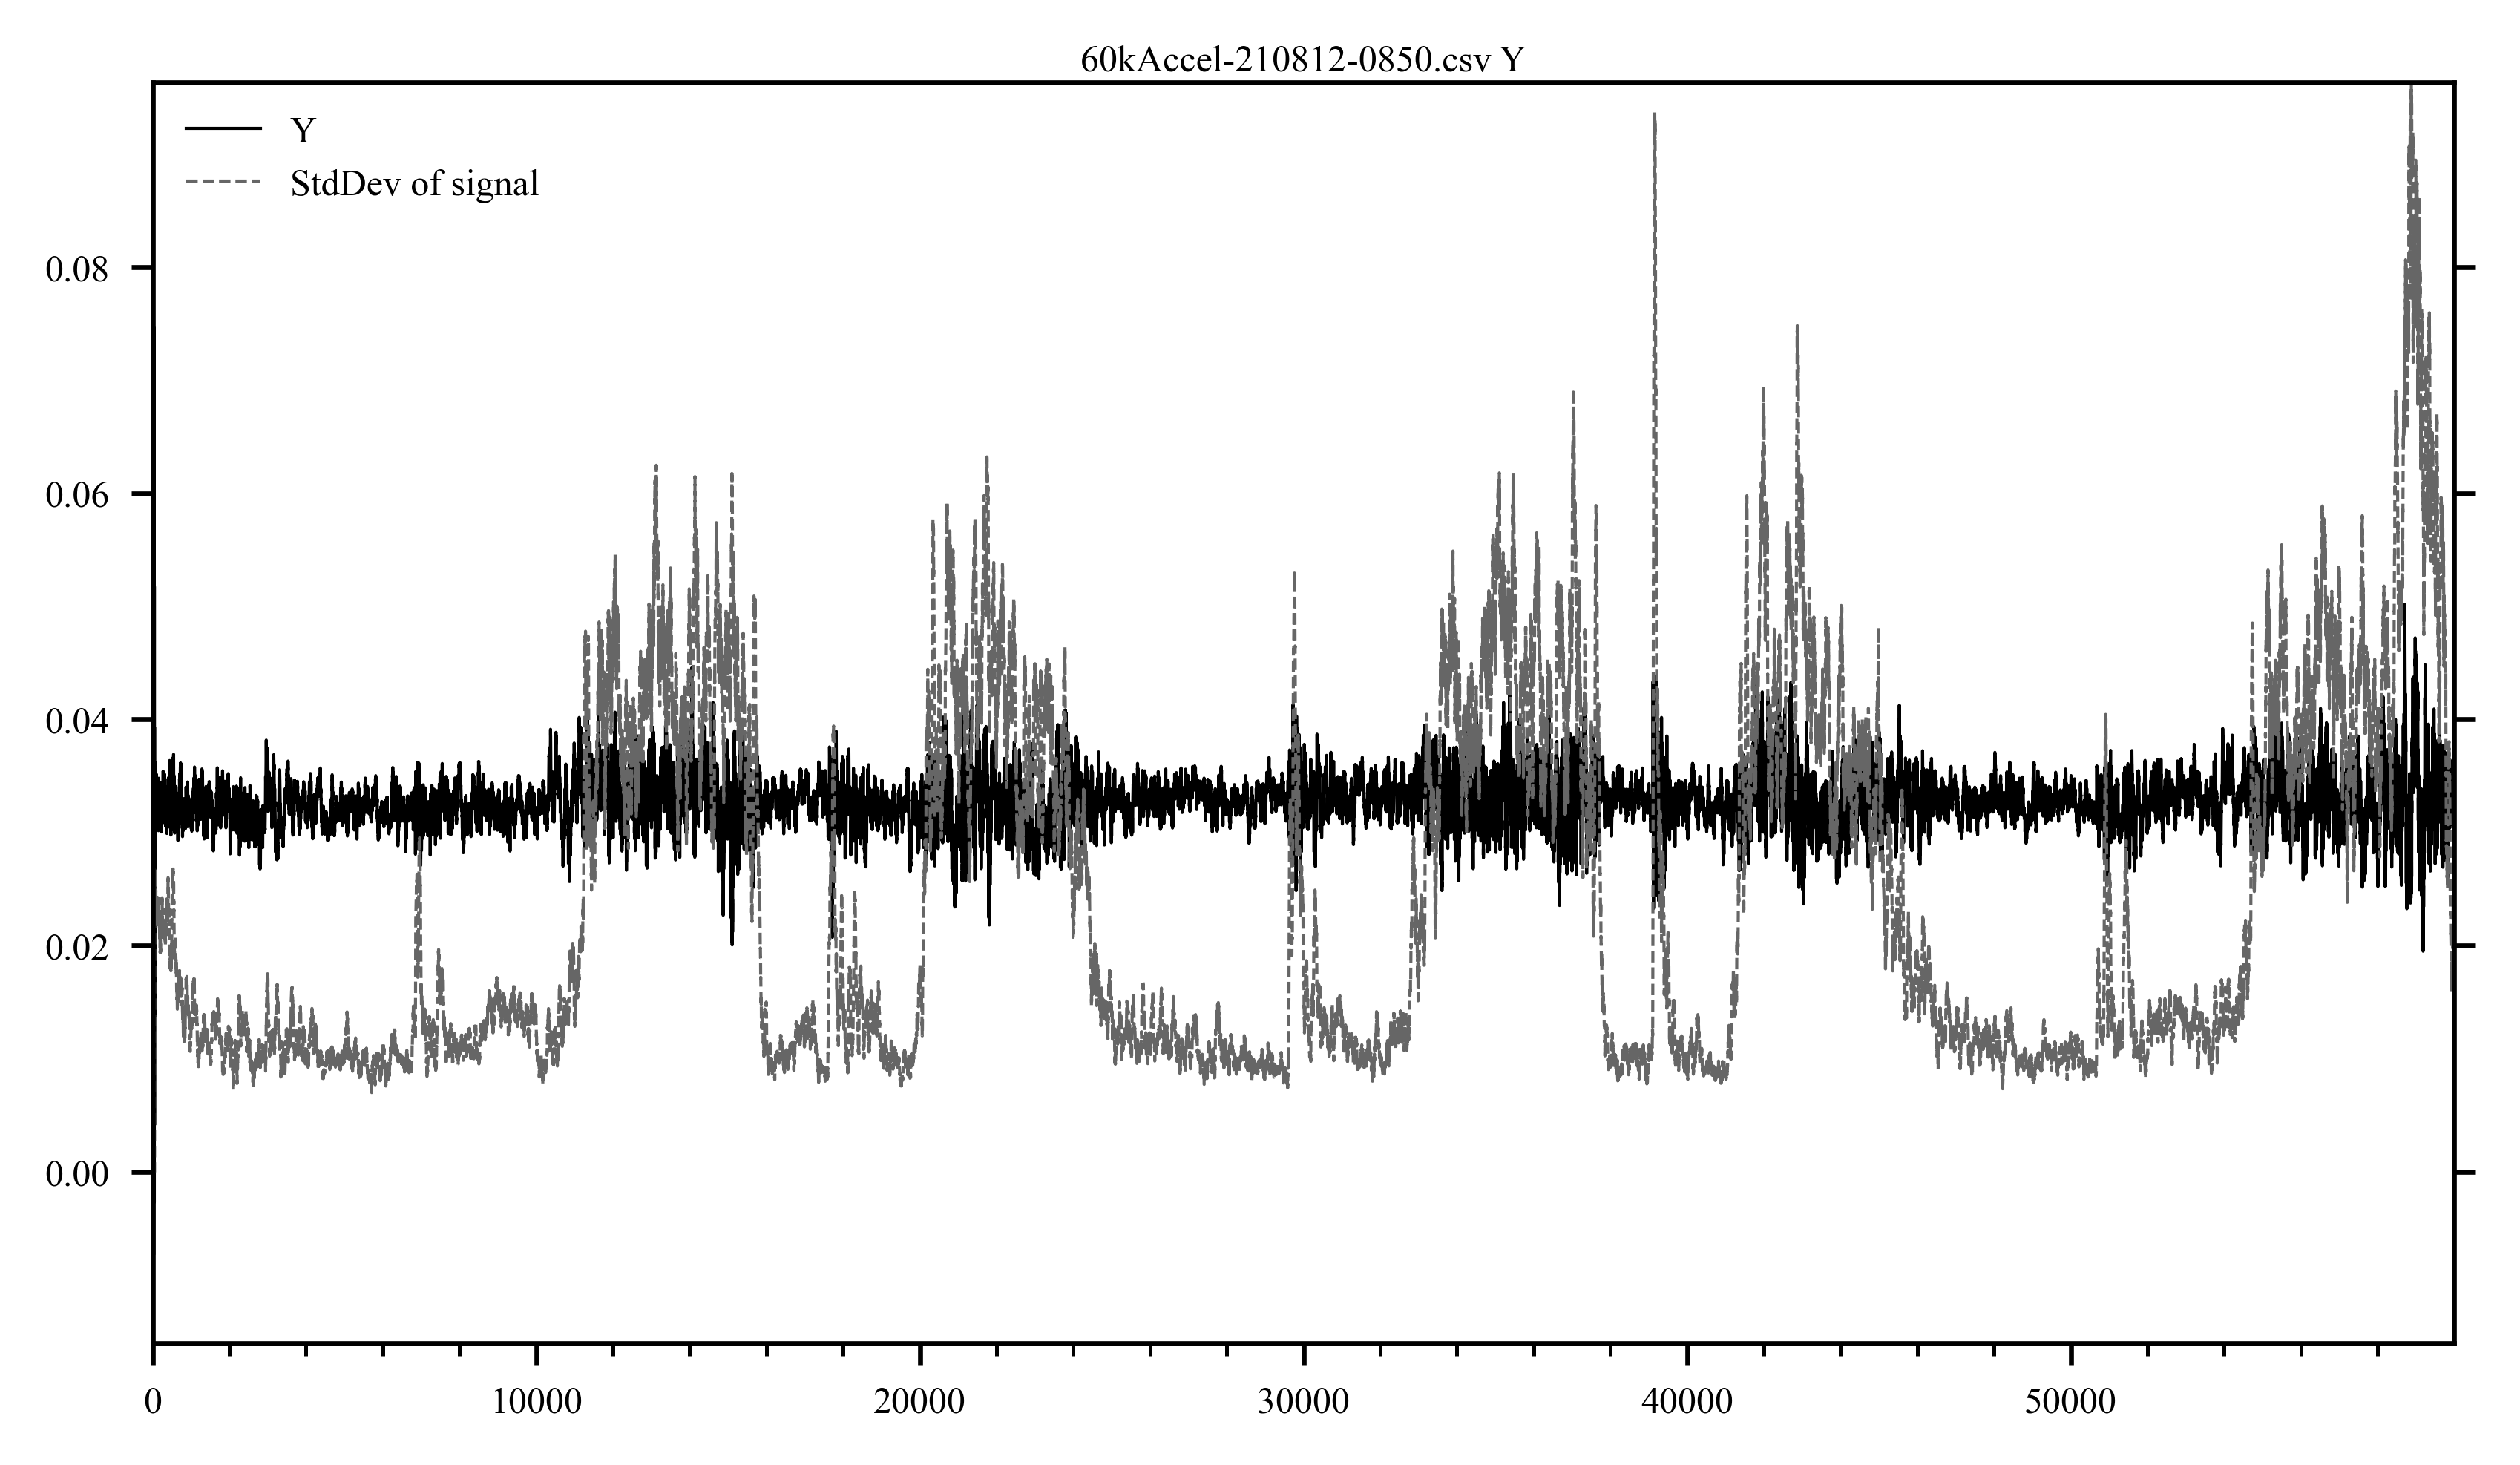

60kAccel-210812-0850.csv Y 0.09632630911010506 0.09204


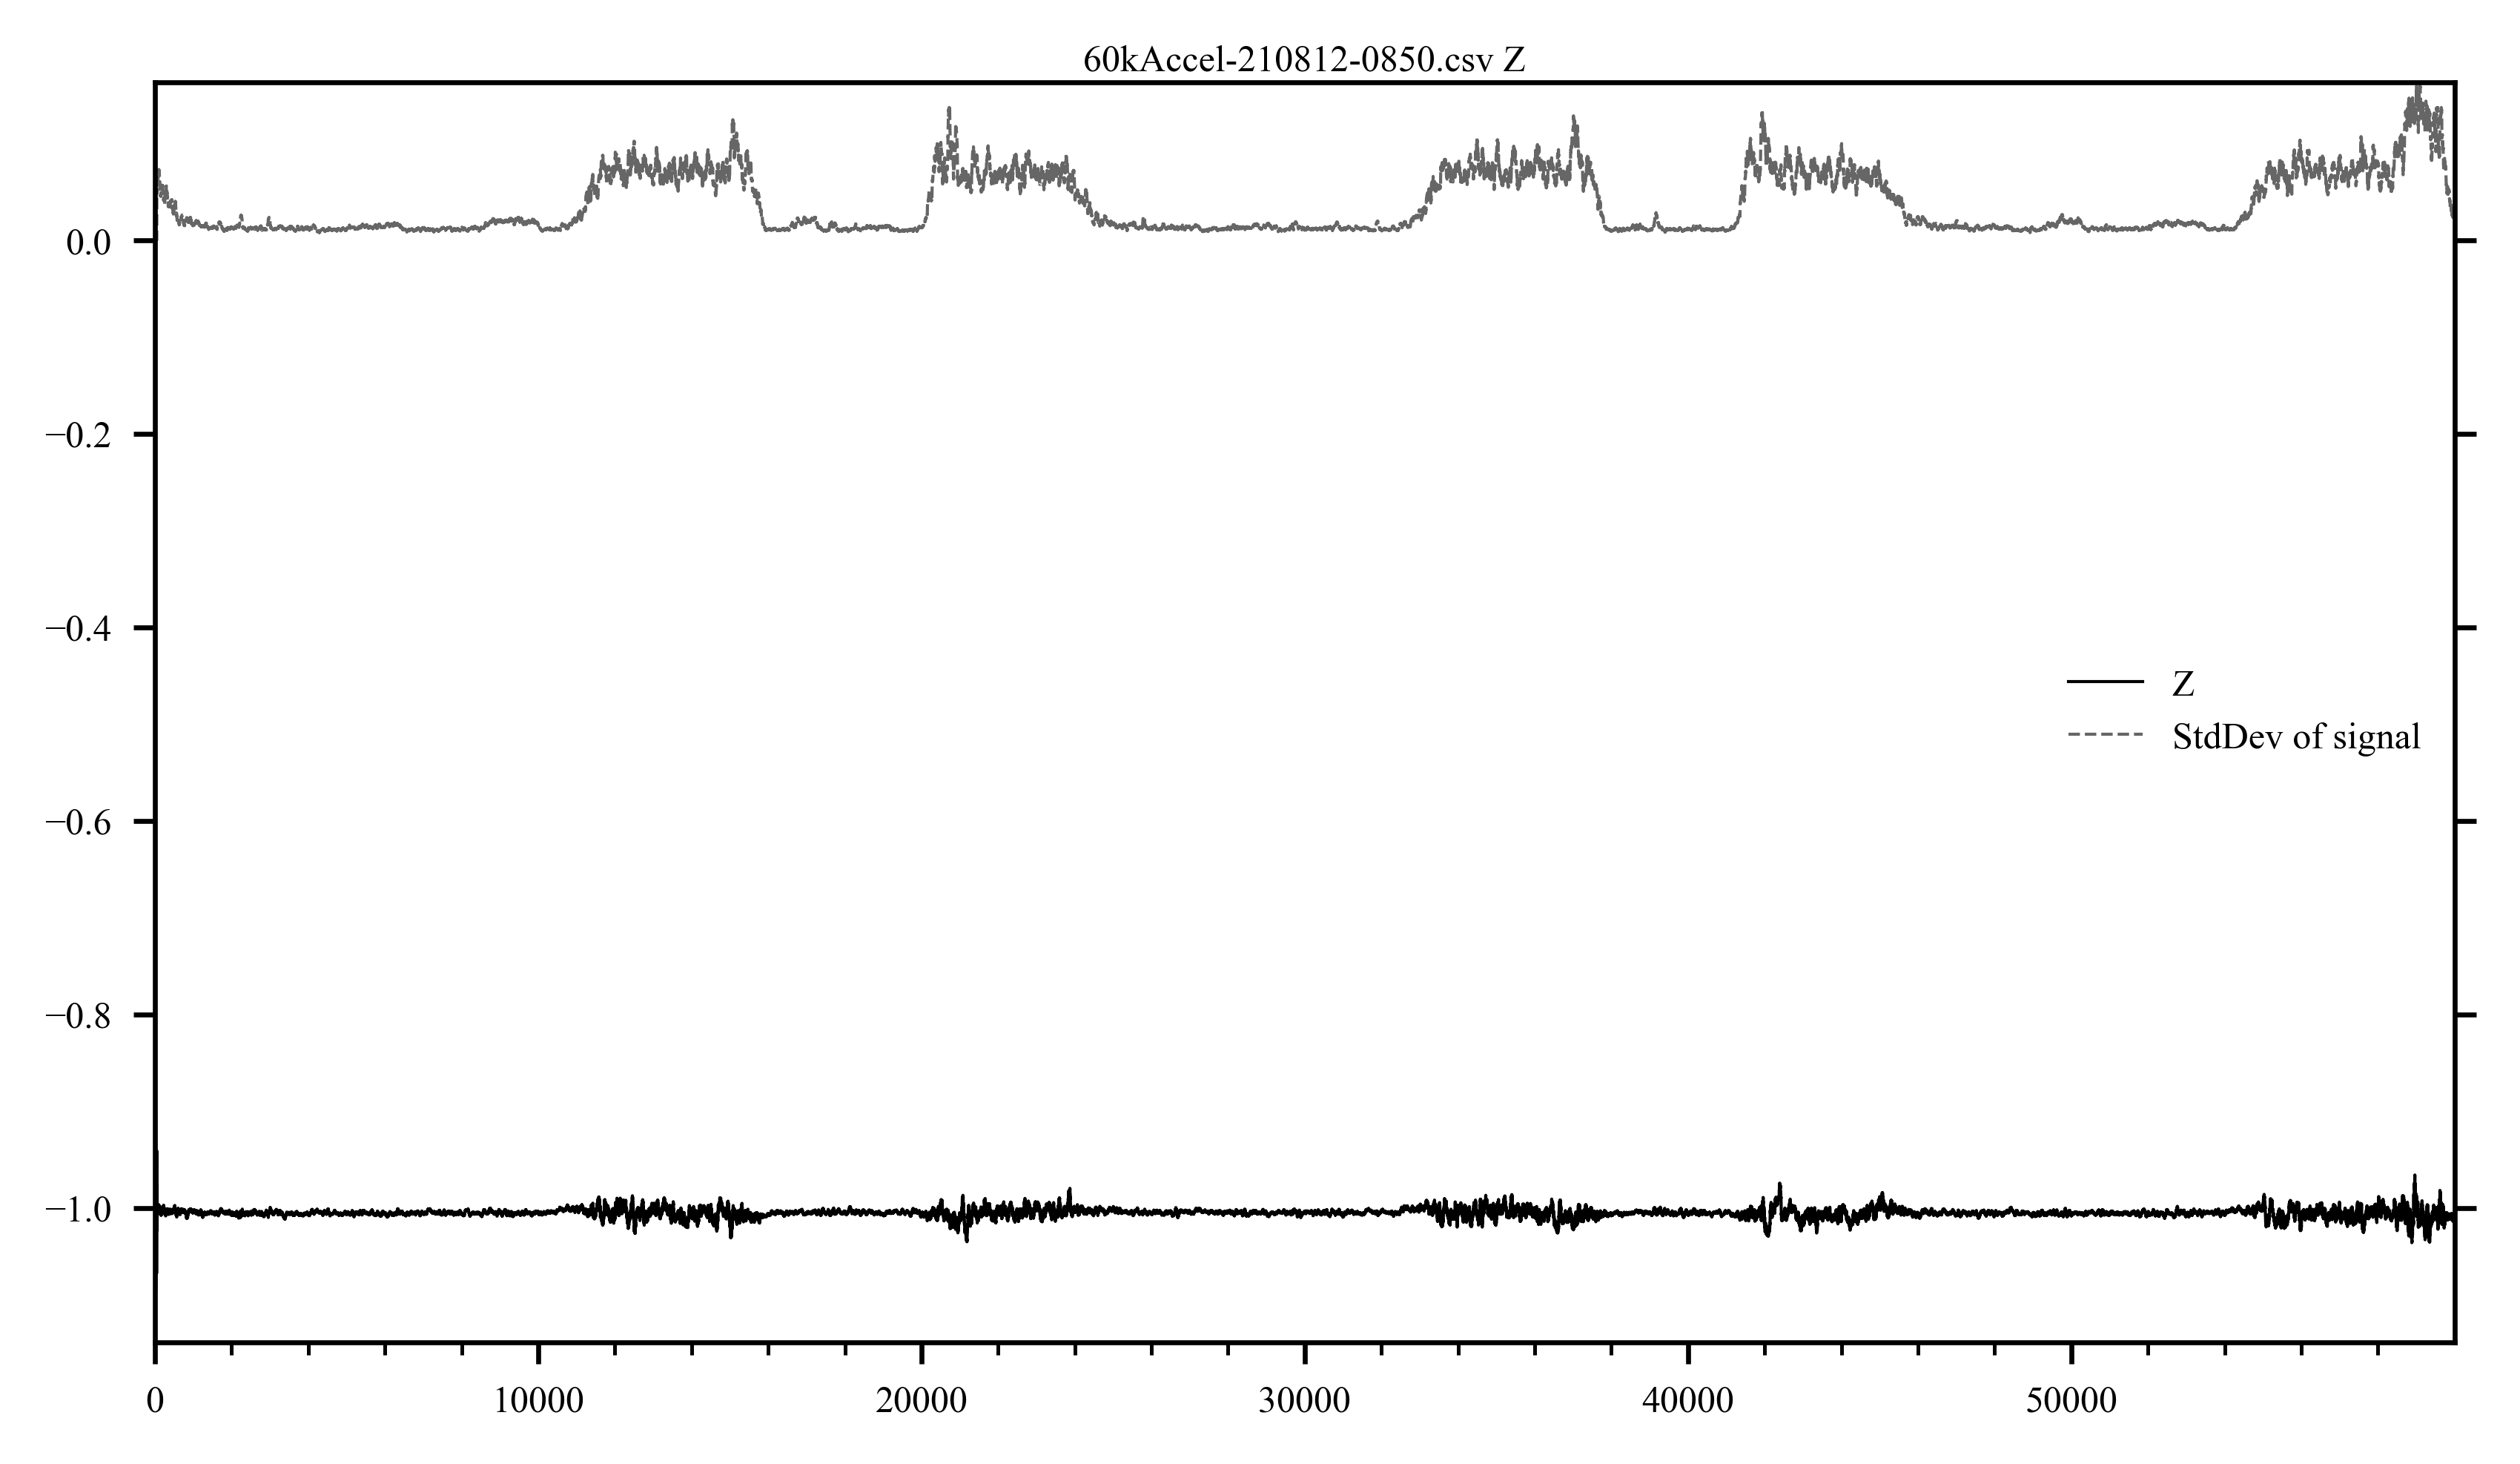

60kAccel-210812-0850.csv Z 0.16310116640181532 -0.90161


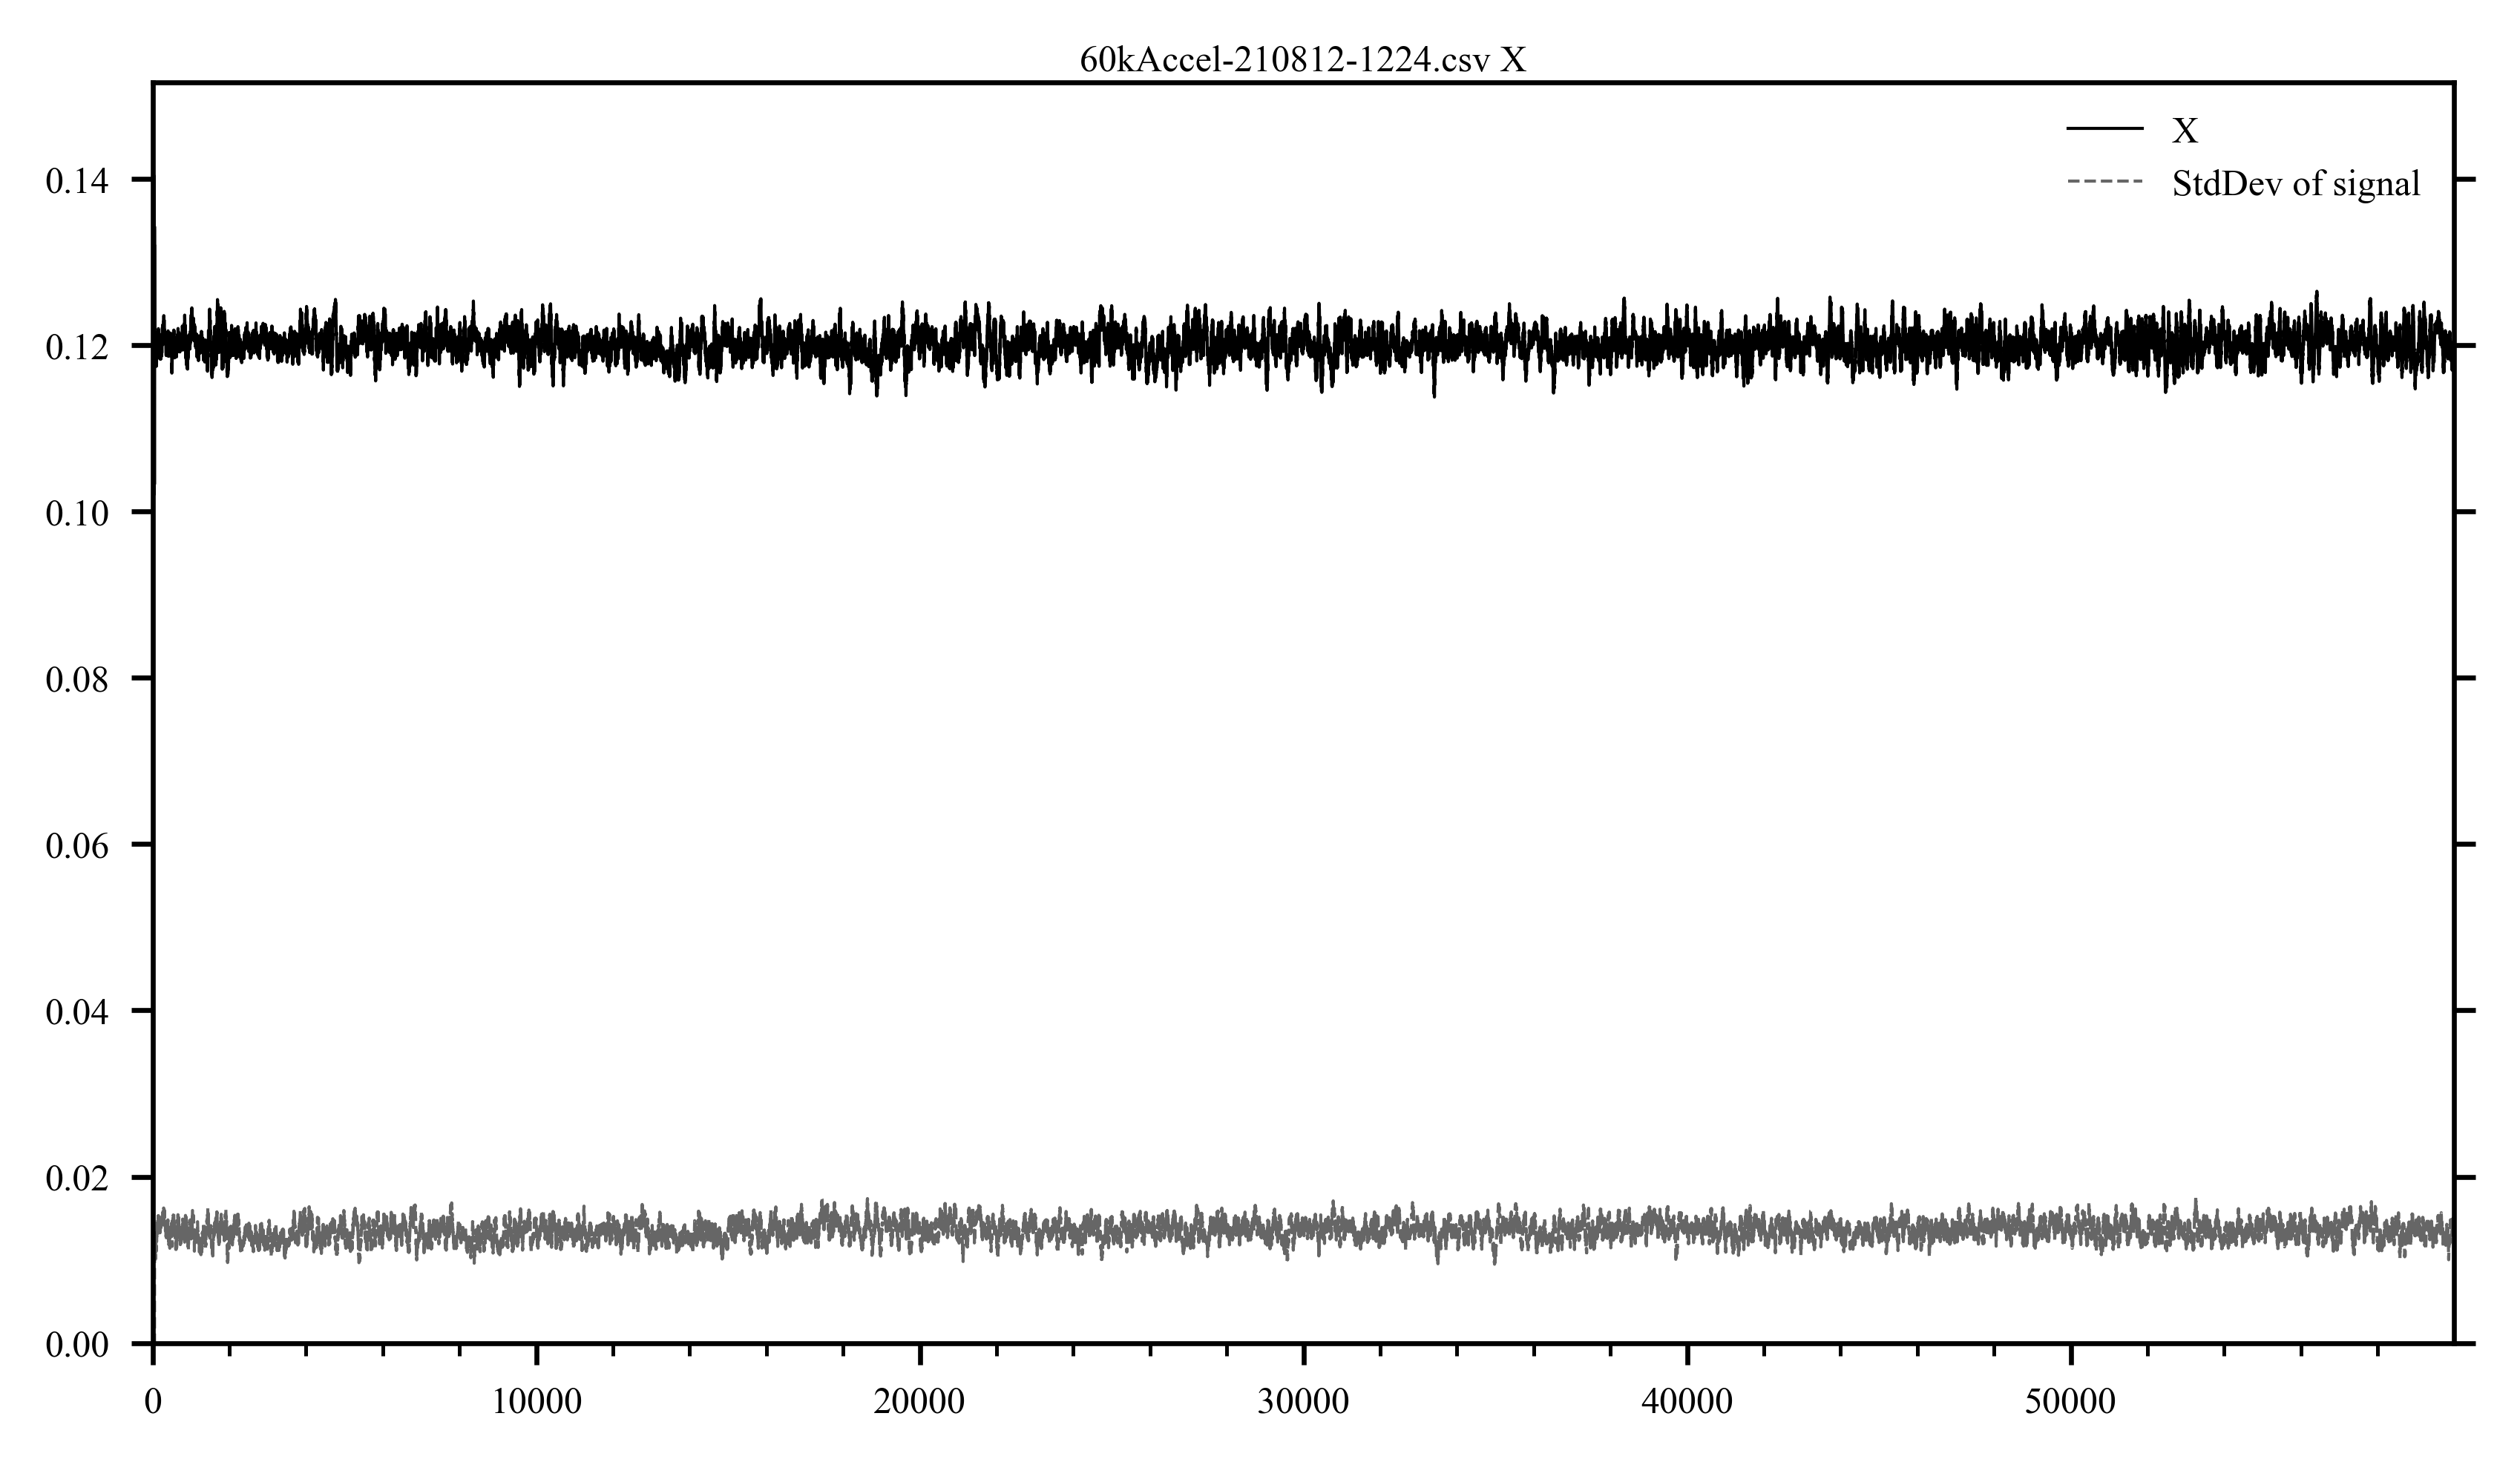

60kAccel-210812-1224.csv X 0.017720770098896922 0.15161


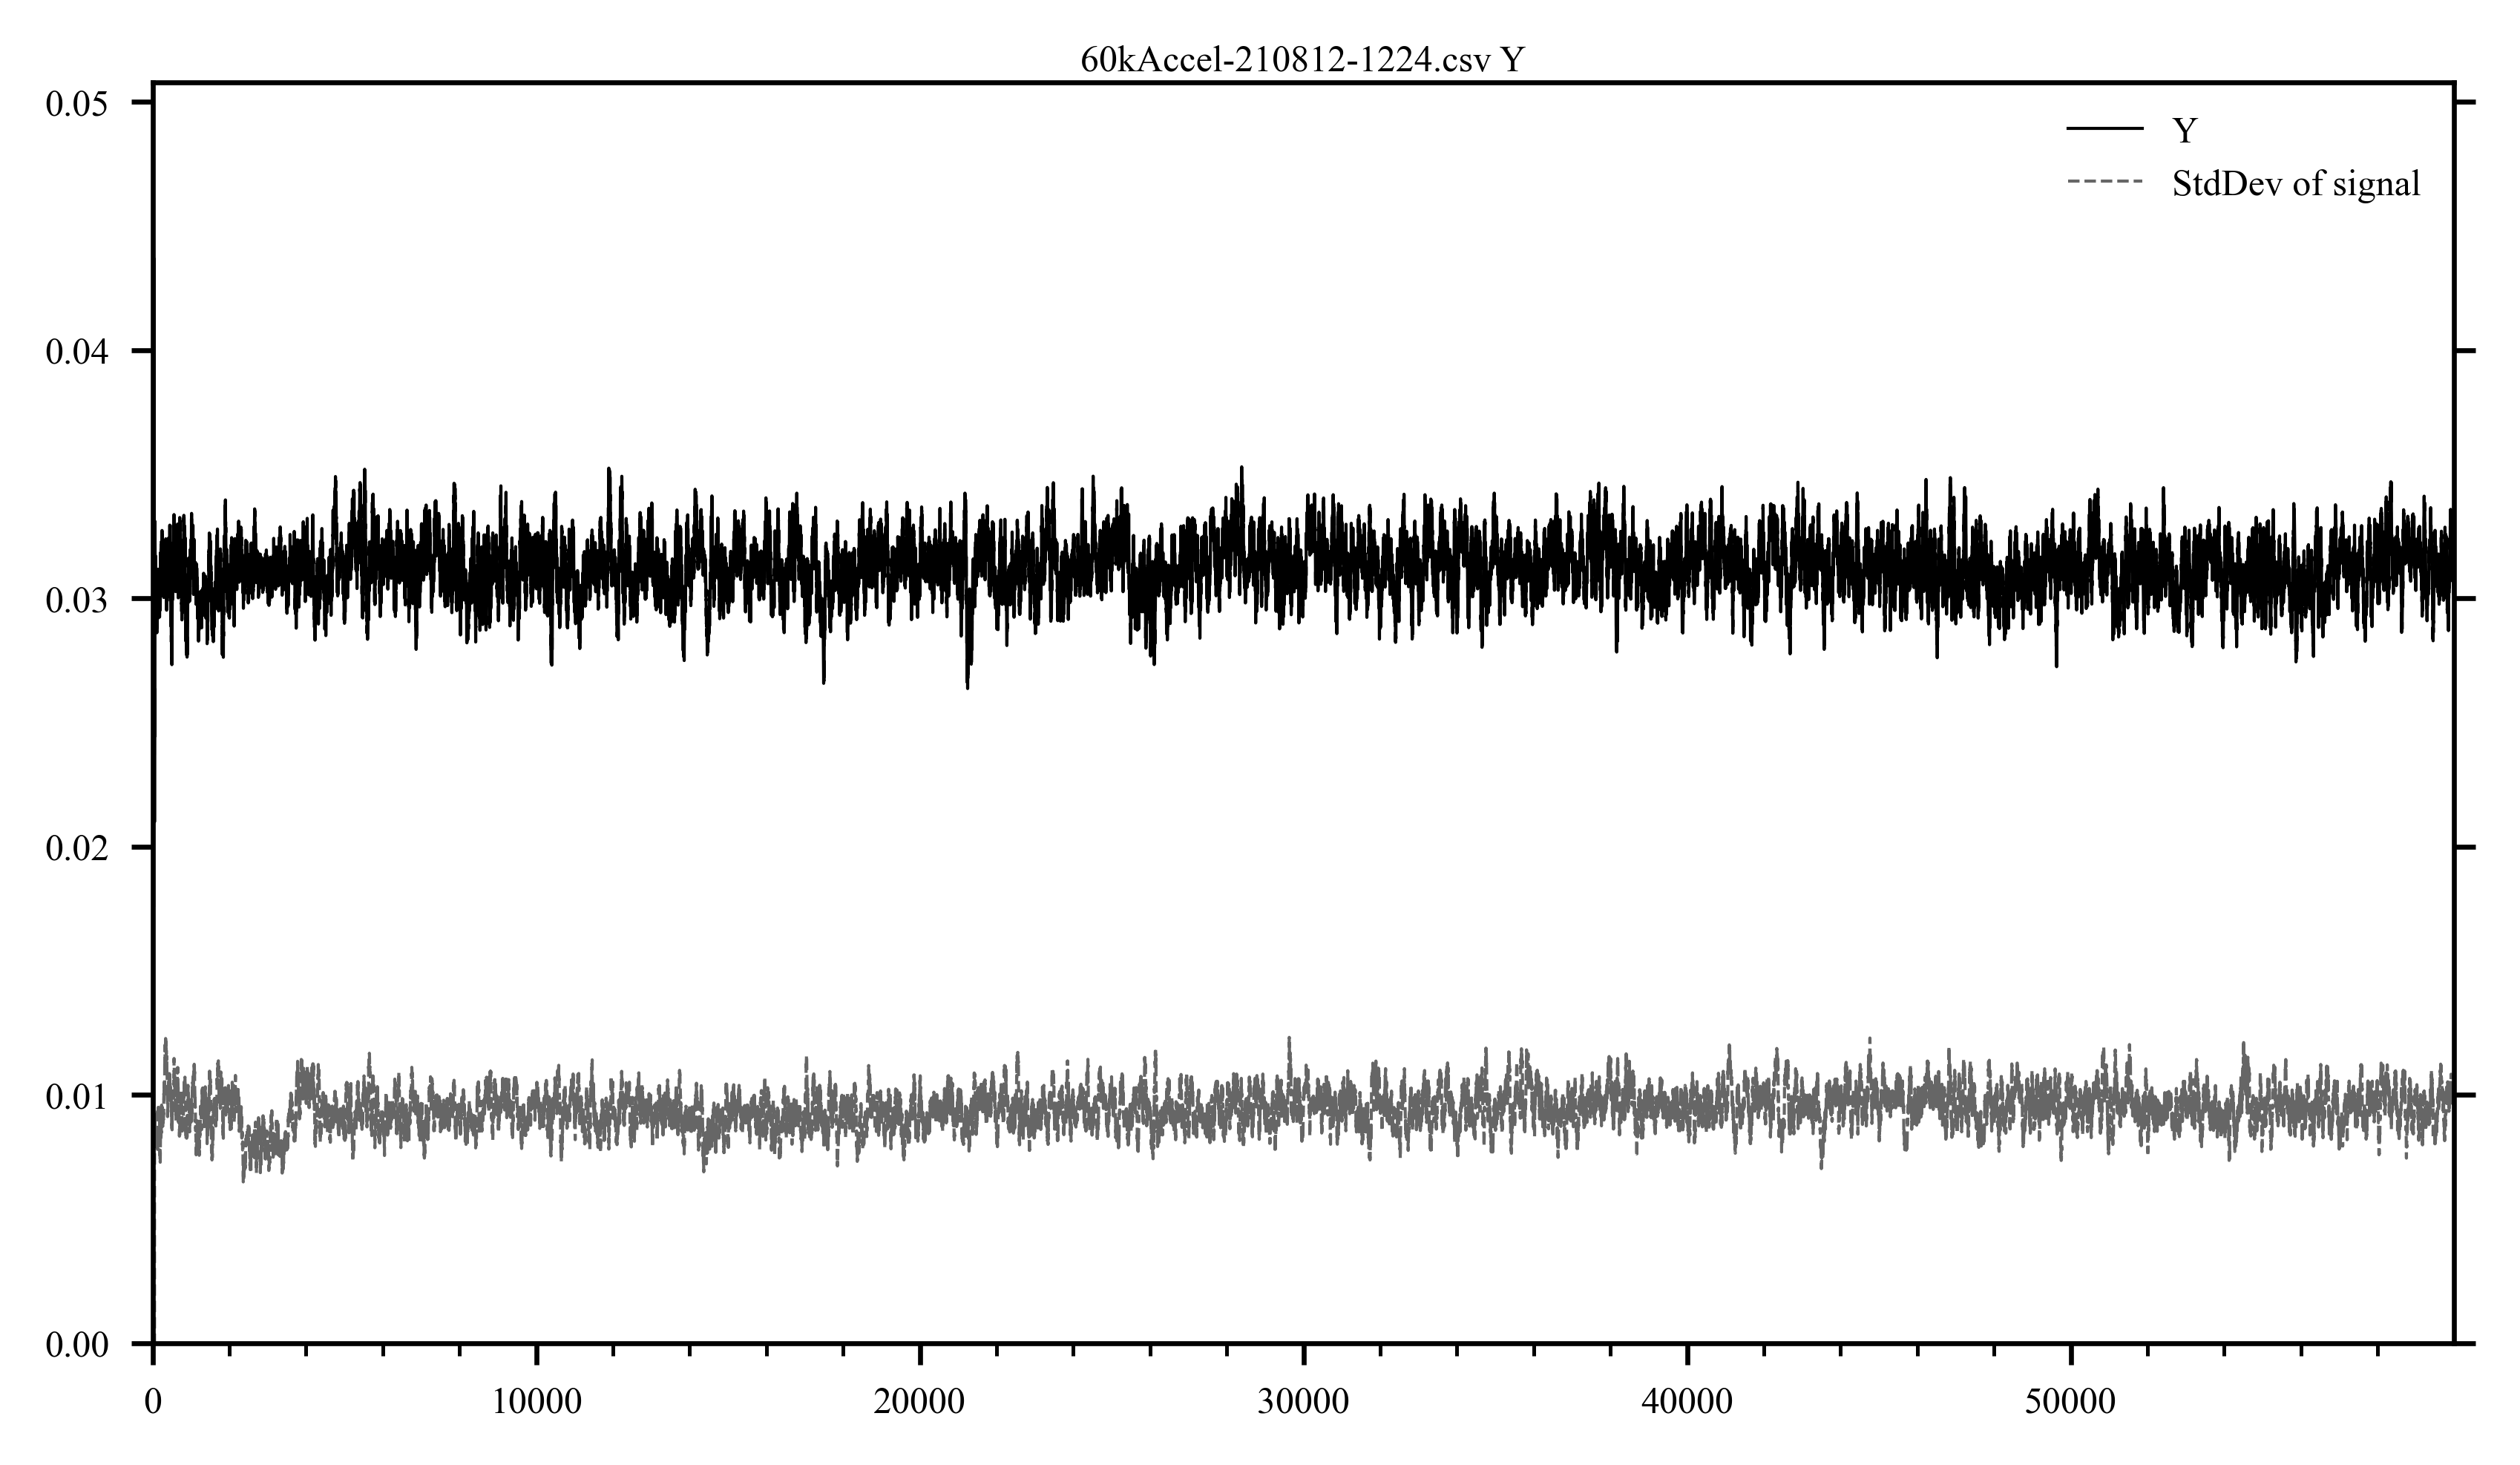

60kAccel-210812-1224.csv Y 0.01231299219092896 0.05078


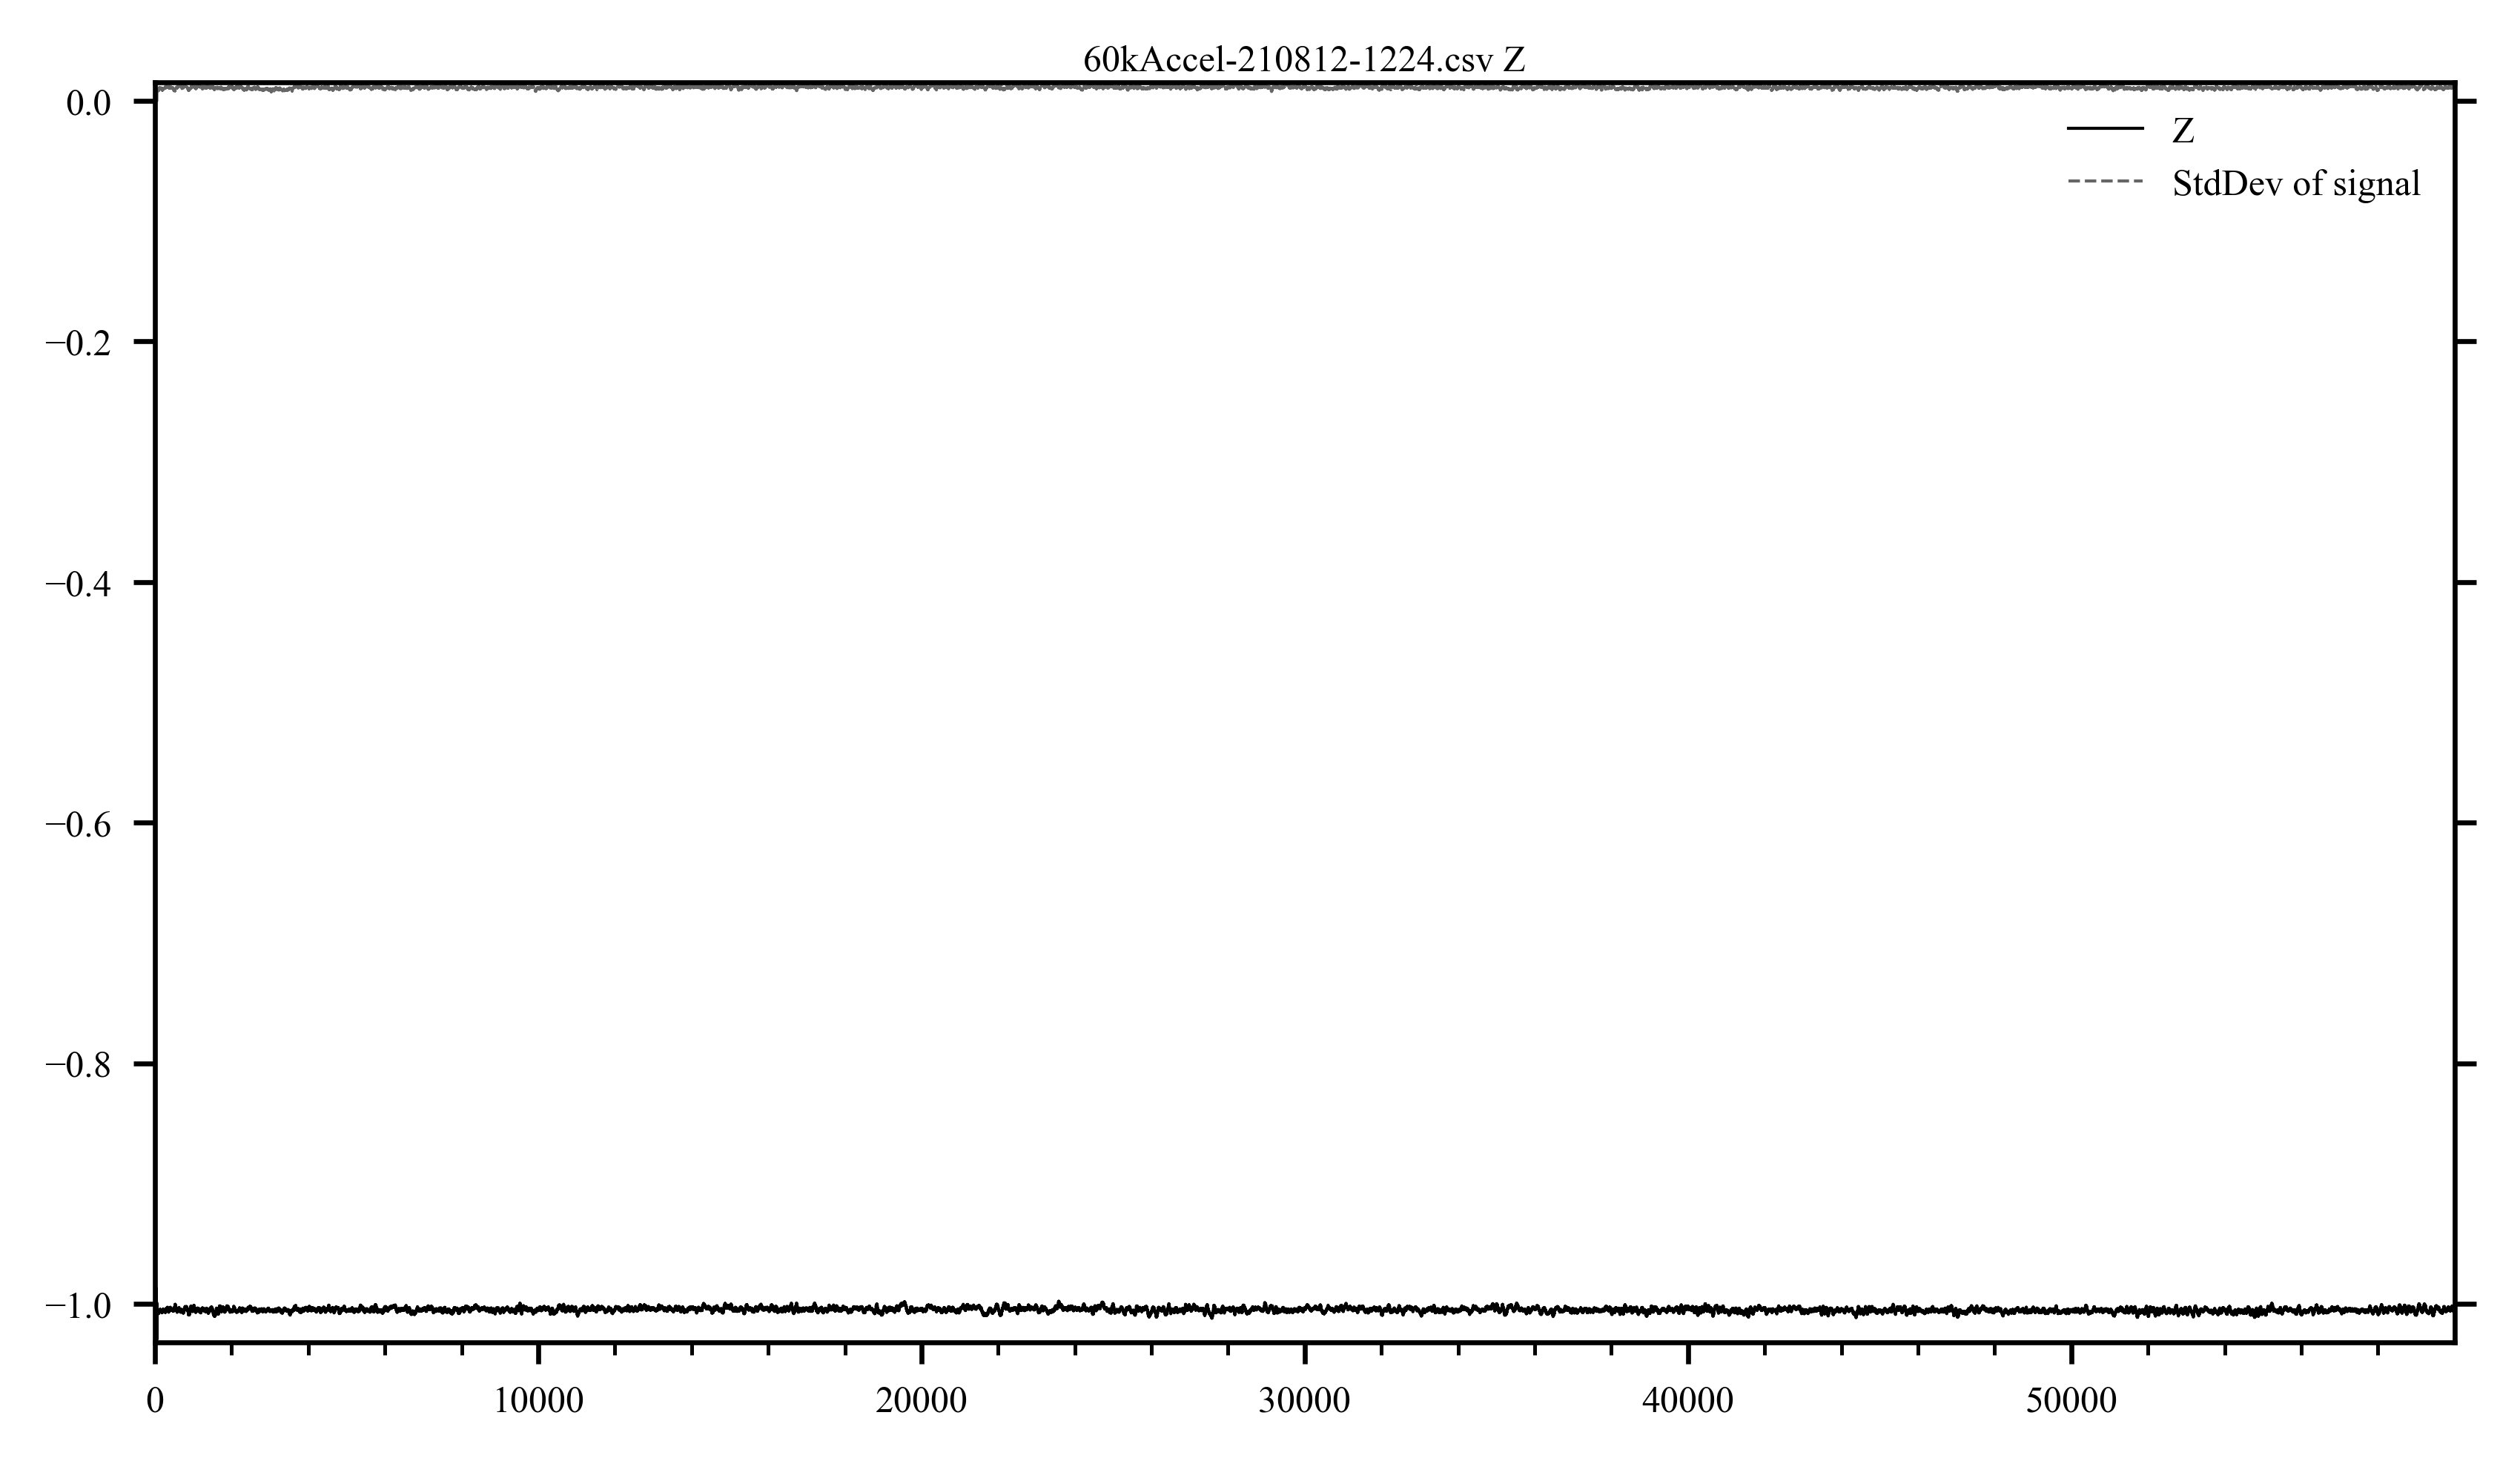

60kAccel-210812-1224.csv Z 0.015396574991516386 -0.98461


In [25]:
# Directory = './Data'
#Directory = 'C:\\Users\\Hendrickson\\Desktop\\Phone Acceleration\\3\\'
Directory = 'C:\\Users\\dhendrickson\\Desktop\\AccelData\\home\\pi\\AccelData\\'
files = os.listdir(Directory)

#files = random.sample(files,2)


start = 0
end = 60000

size = 5000
Arange = 50
coord = 2
for Filename in files:
    DataSet = np.genfromtxt(open(Directory+'/'+Filename,'r'), delimiter=',',skip_header=4)
    DataSet = DataSet[:,1:5]
    length = np.shape(DataSet)[0]

    results =[]

    #for i in range(int(length/size)):
    for i in range(3):
        StdDev = np.zeros(length)
        coord = i+1
        for j in range(length-Arange):
            k = (length-1)-j
            DataSet[:,coord][k] = np.average(DataSet[:,coord][k-Arange:k])
            StdDev[k]=st.stdev(DataSet[:,coord][k-Arange:k])
        fig=plt.figure(figsize=(6.67,3.75))
        plt.plot(DataSet[:,coord][start:end], label = Header[coord])
        plt.plot(StdDev,label = 'StdDev of signal')
 
        title = Filename + ' ' + Header[coord]
        if Ledgends: plt.legend()
        if Titles: plt.title(title)
        if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "")+FFormat)
        plt.show()
        print(title,max(StdDev),max(DataSet[:,coord][start:end]))
        #results.append([np.average(DataSet[:,1][i*size:(i+1)*size]), np.average(DataSet[:,2][i*size:(i+1)*size]),np.average(DataSet[:,3][i*size:(i+1)*size])])

        #results = np.matrix(results)
        #df = pd.DataFrame(data=results.astype('float'))
        #df.to_csv('C:\\Users\\dhendrickson\\Desktop\\Phone Acceleration\\Gyro-output-' + Filename[10:20] + '.csv', sep=',', header=False, float_format='%.8f')
        #PlotFingerPrint(DataSet[:,coord][start:end],'a',title,'coif1')

In [10]:
Directory = 'C:\\Users\\dhendrickson\\Desktop\\AccelData\\home\\pi\\AccelData\\'
Arange = 50


DataSet = np.genfromtxt(open(Directory+'/60kAccel-210812-0727.csv','r'), delimiter=',',skip_header=4)
DataSet = DataSet[:,1:5]
length = np.shape(DataSet)[0]
for i in range(3):
    StdDev = np.zeros(length)
    DataAvgs = np.zeros((length,4))
    coord = i+1
    for j in range(length-Arange):
        k = (length-1)-j
        #DataAvgs[:,coord][k] = np.average(DataSet[:,coord][k-Arange:k])
        StdDev[k]=st.stdev(DataSet[:,coord][k-Arange:k])

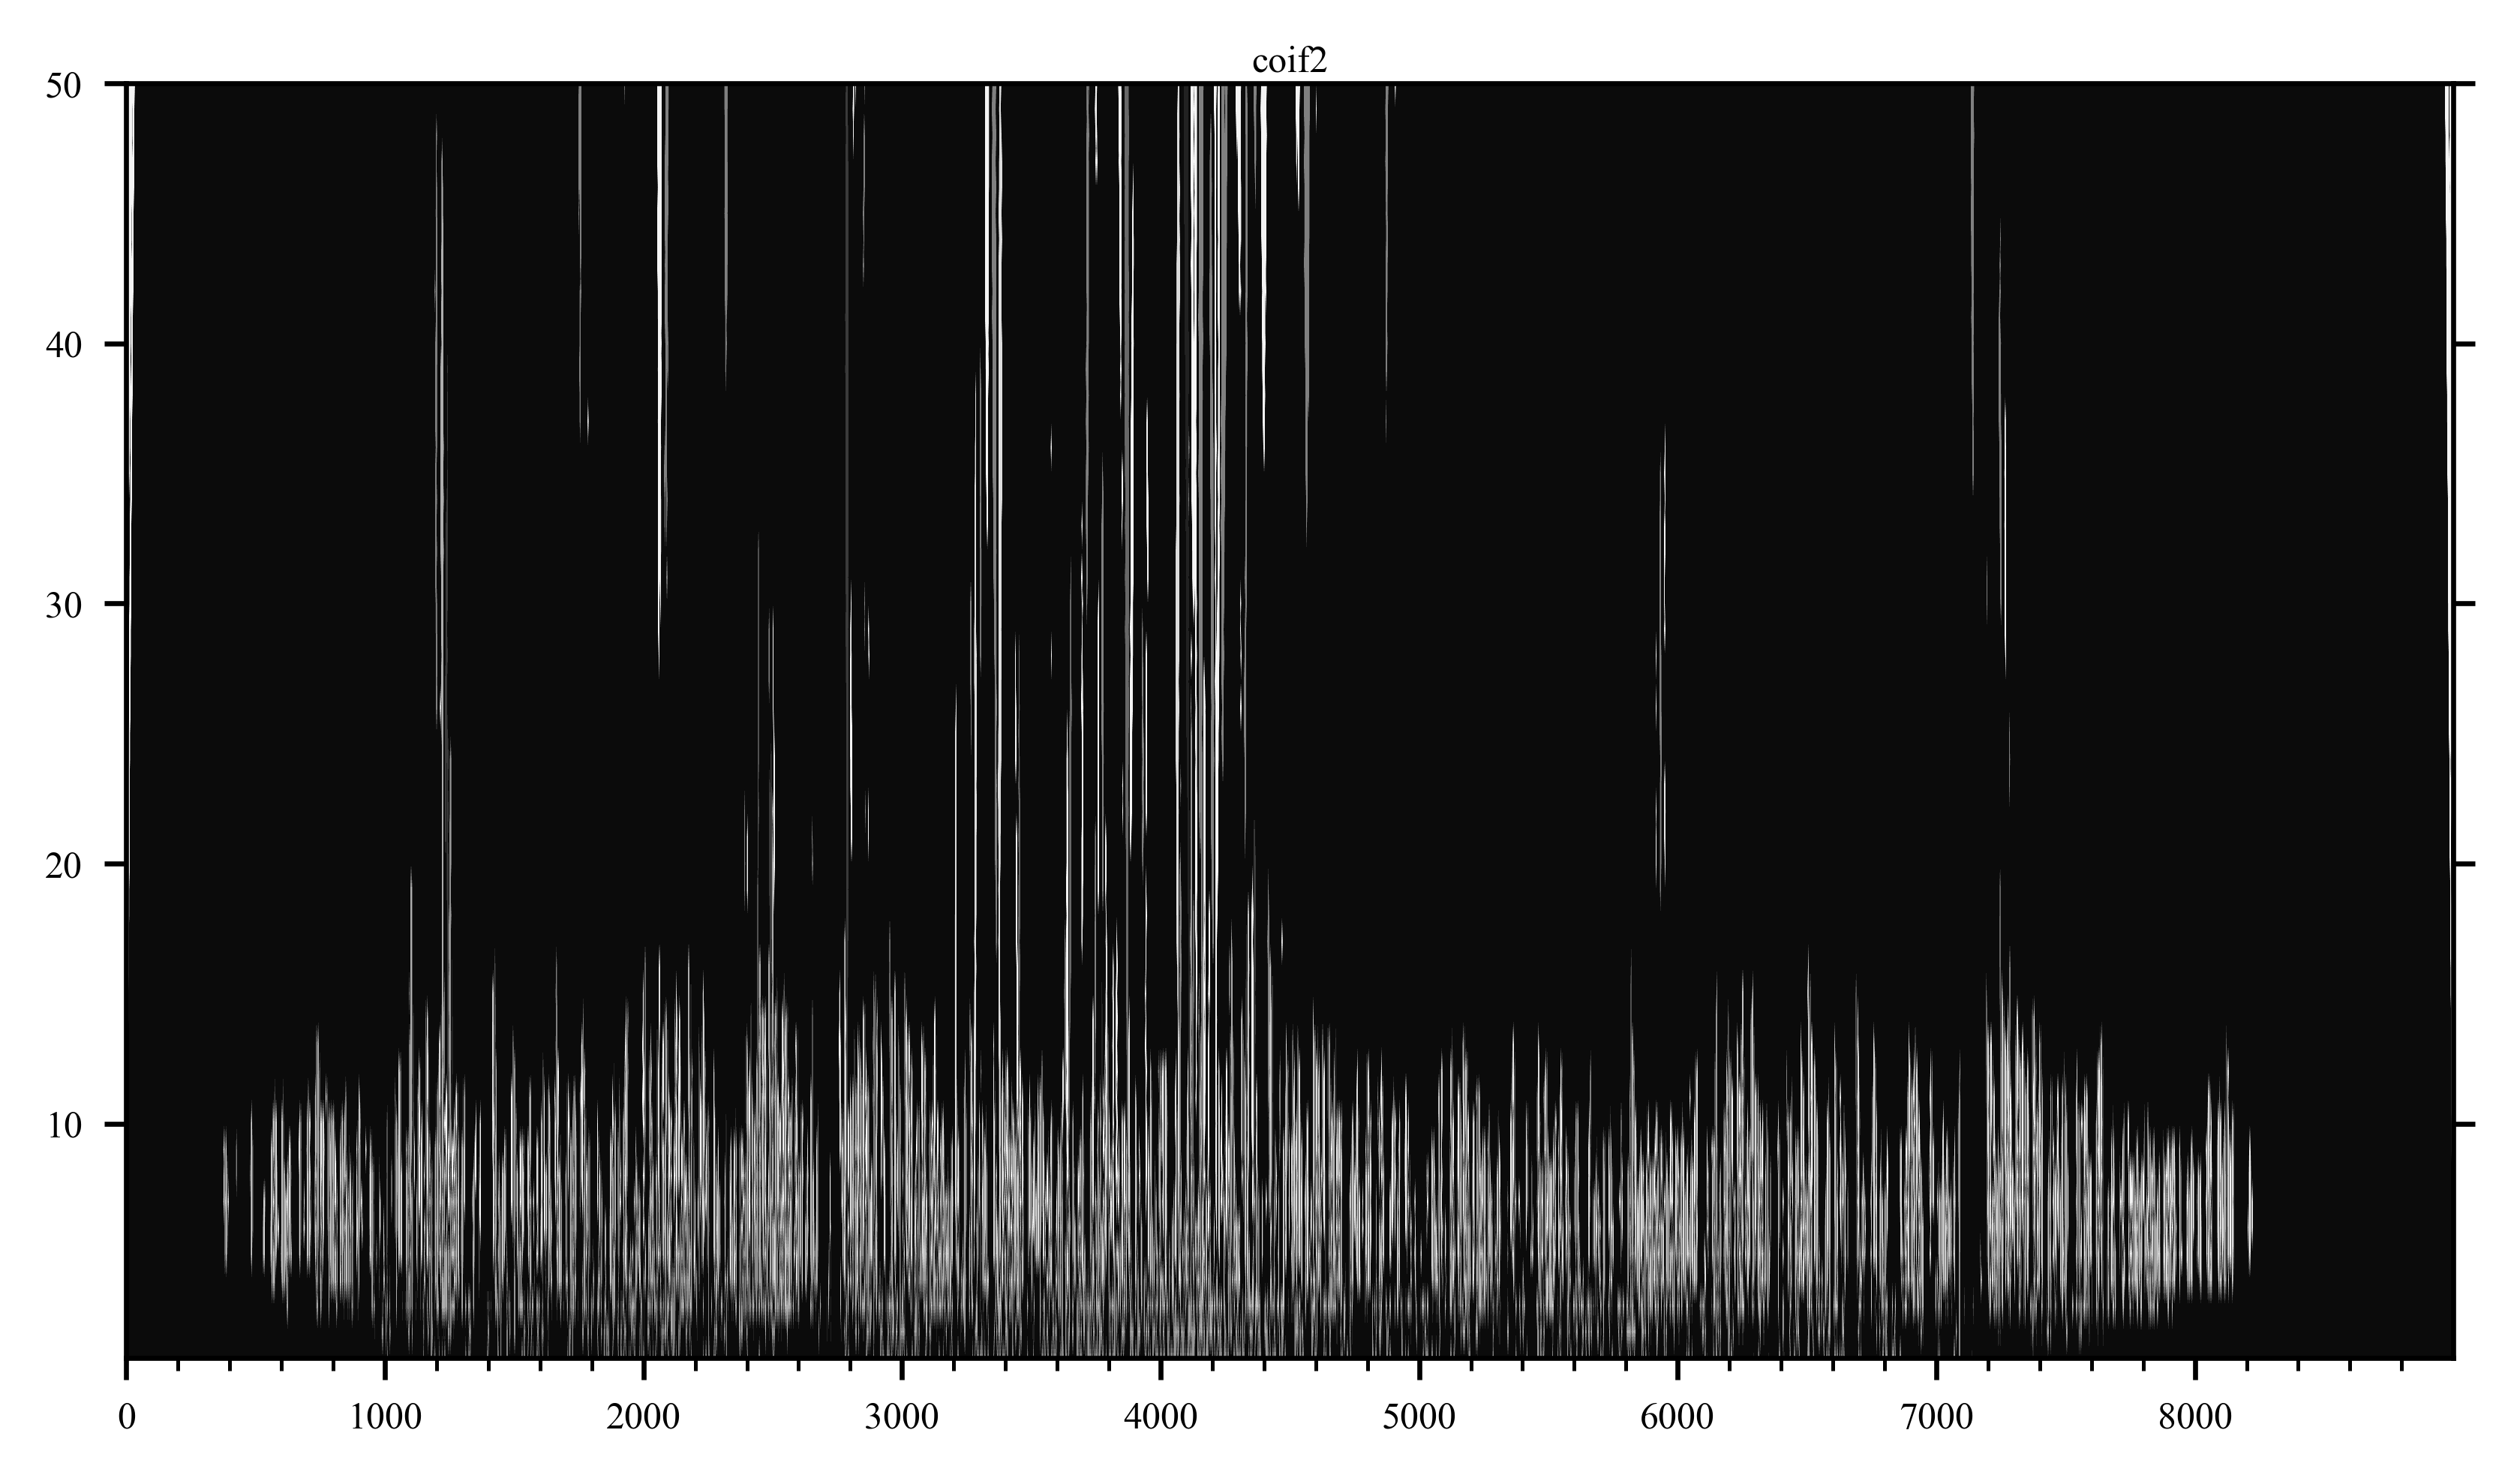

coif2


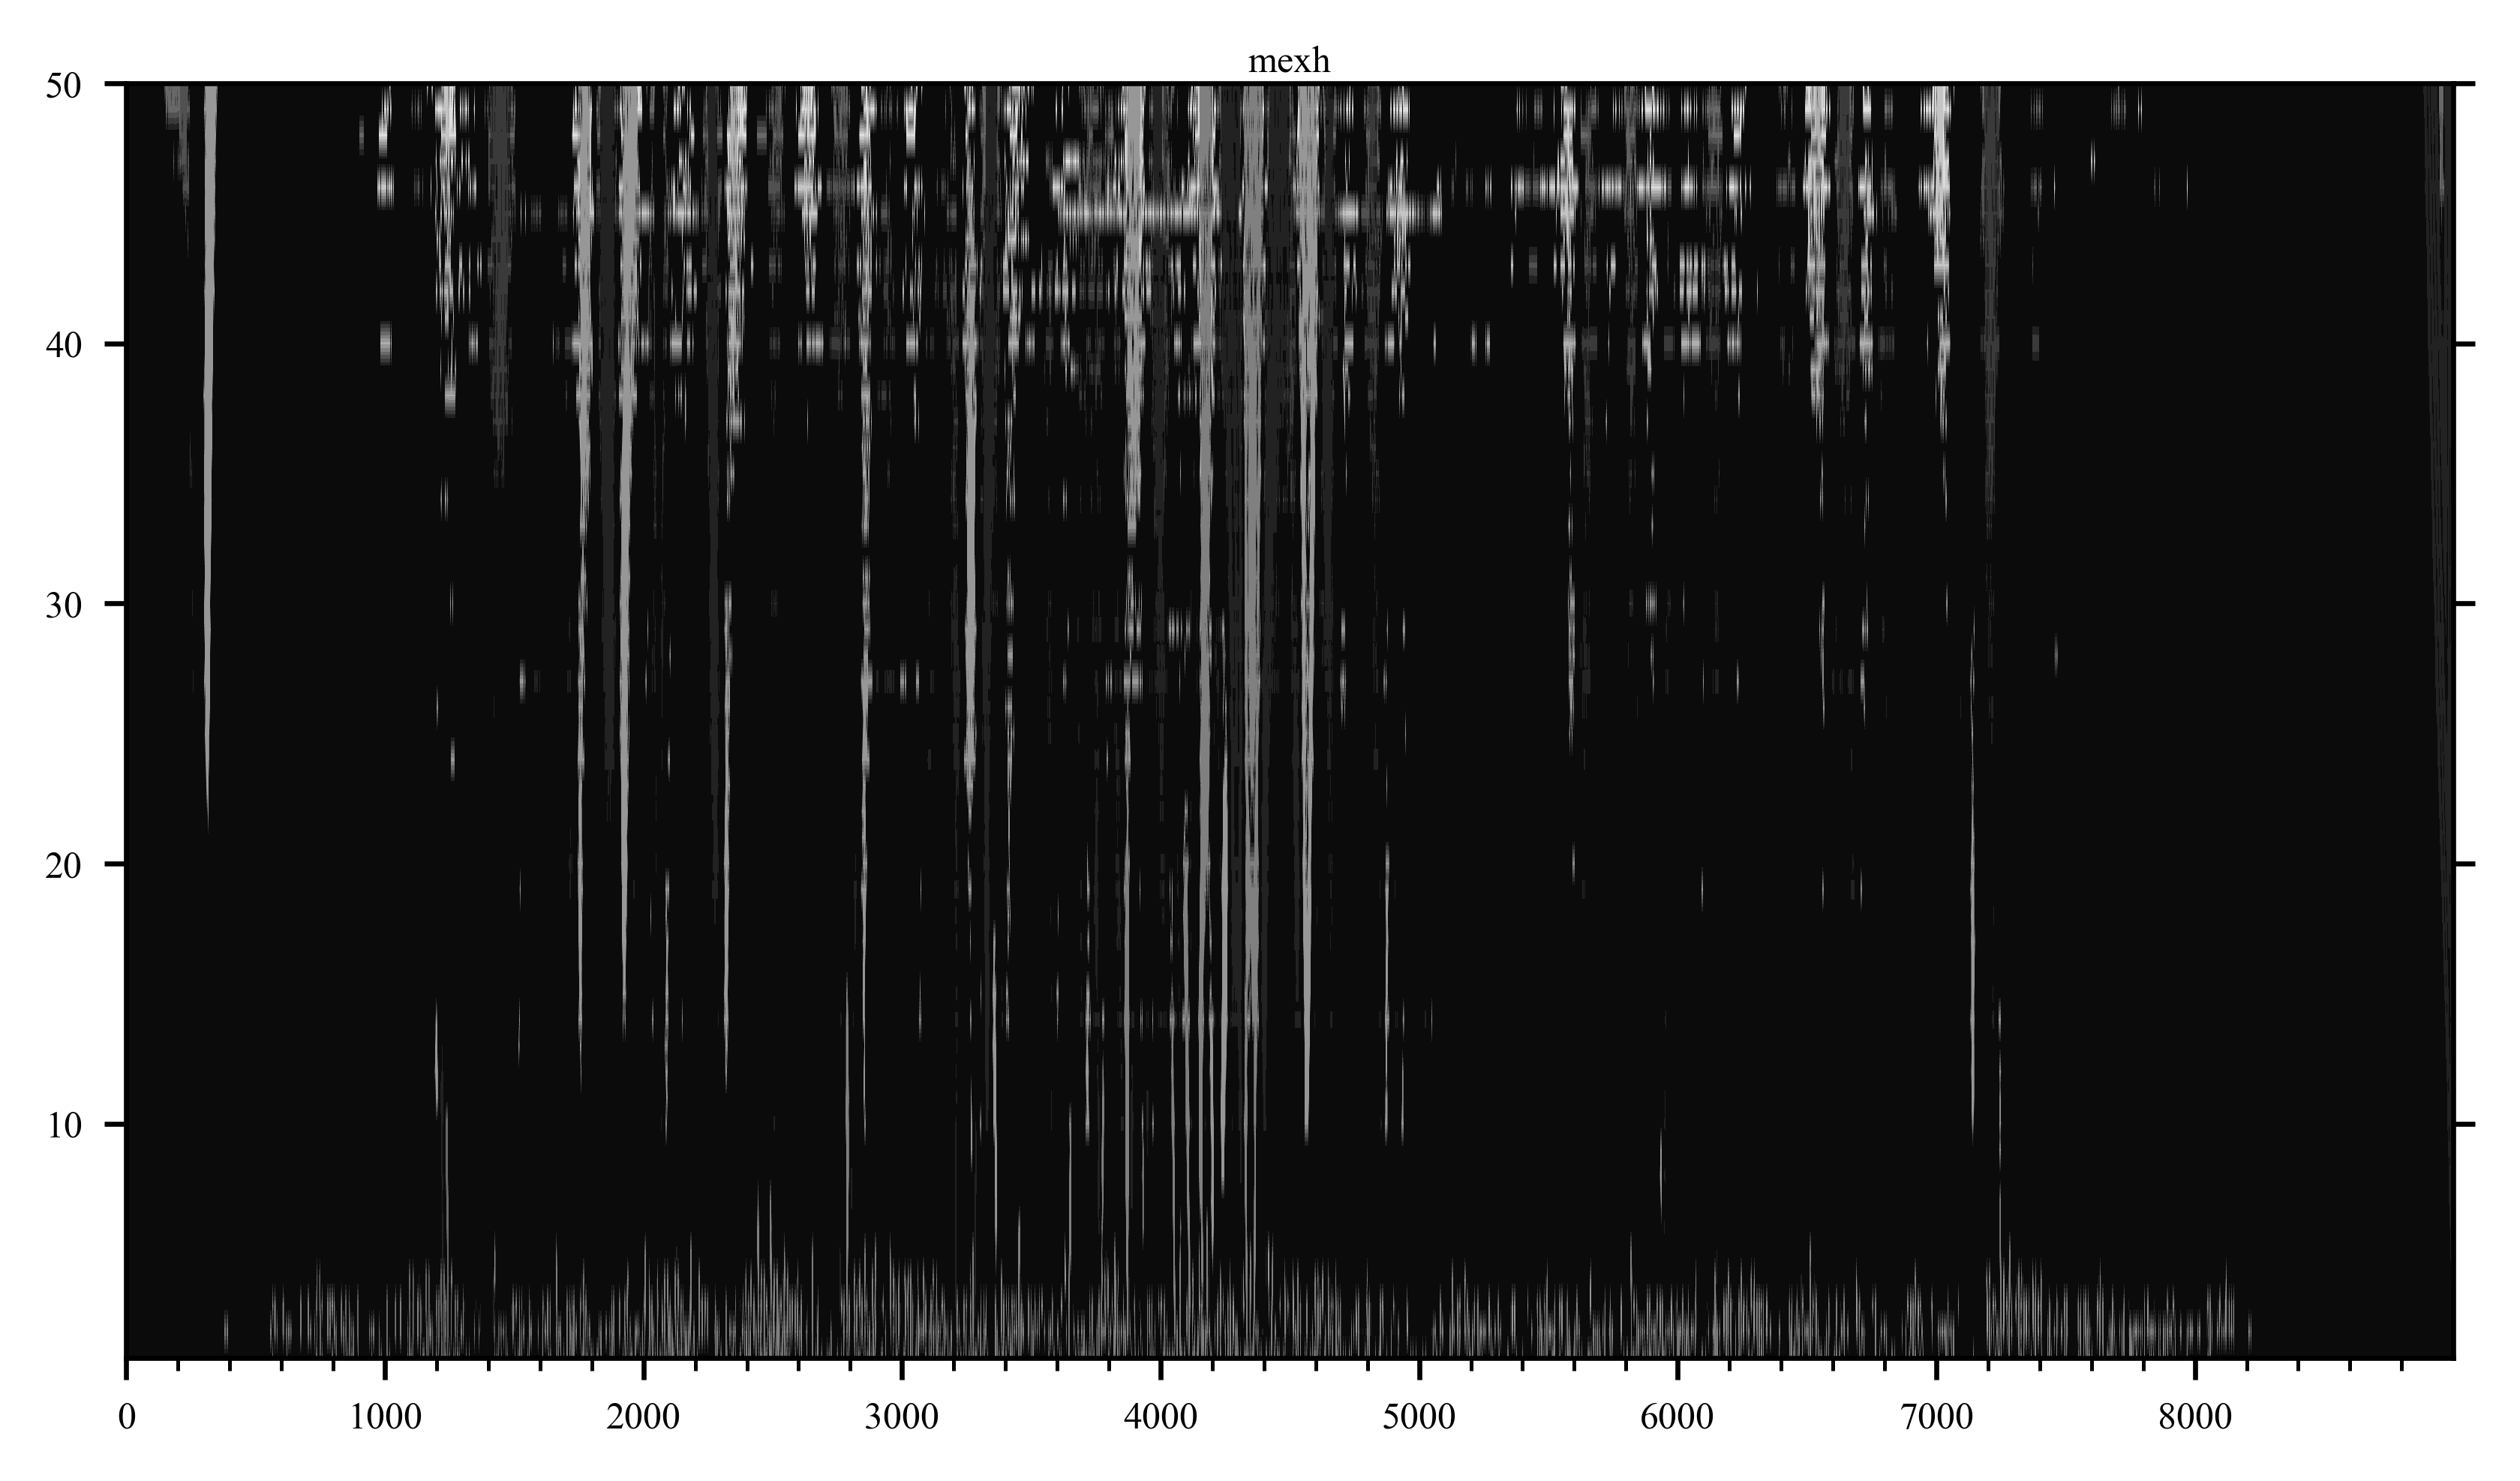

mexh


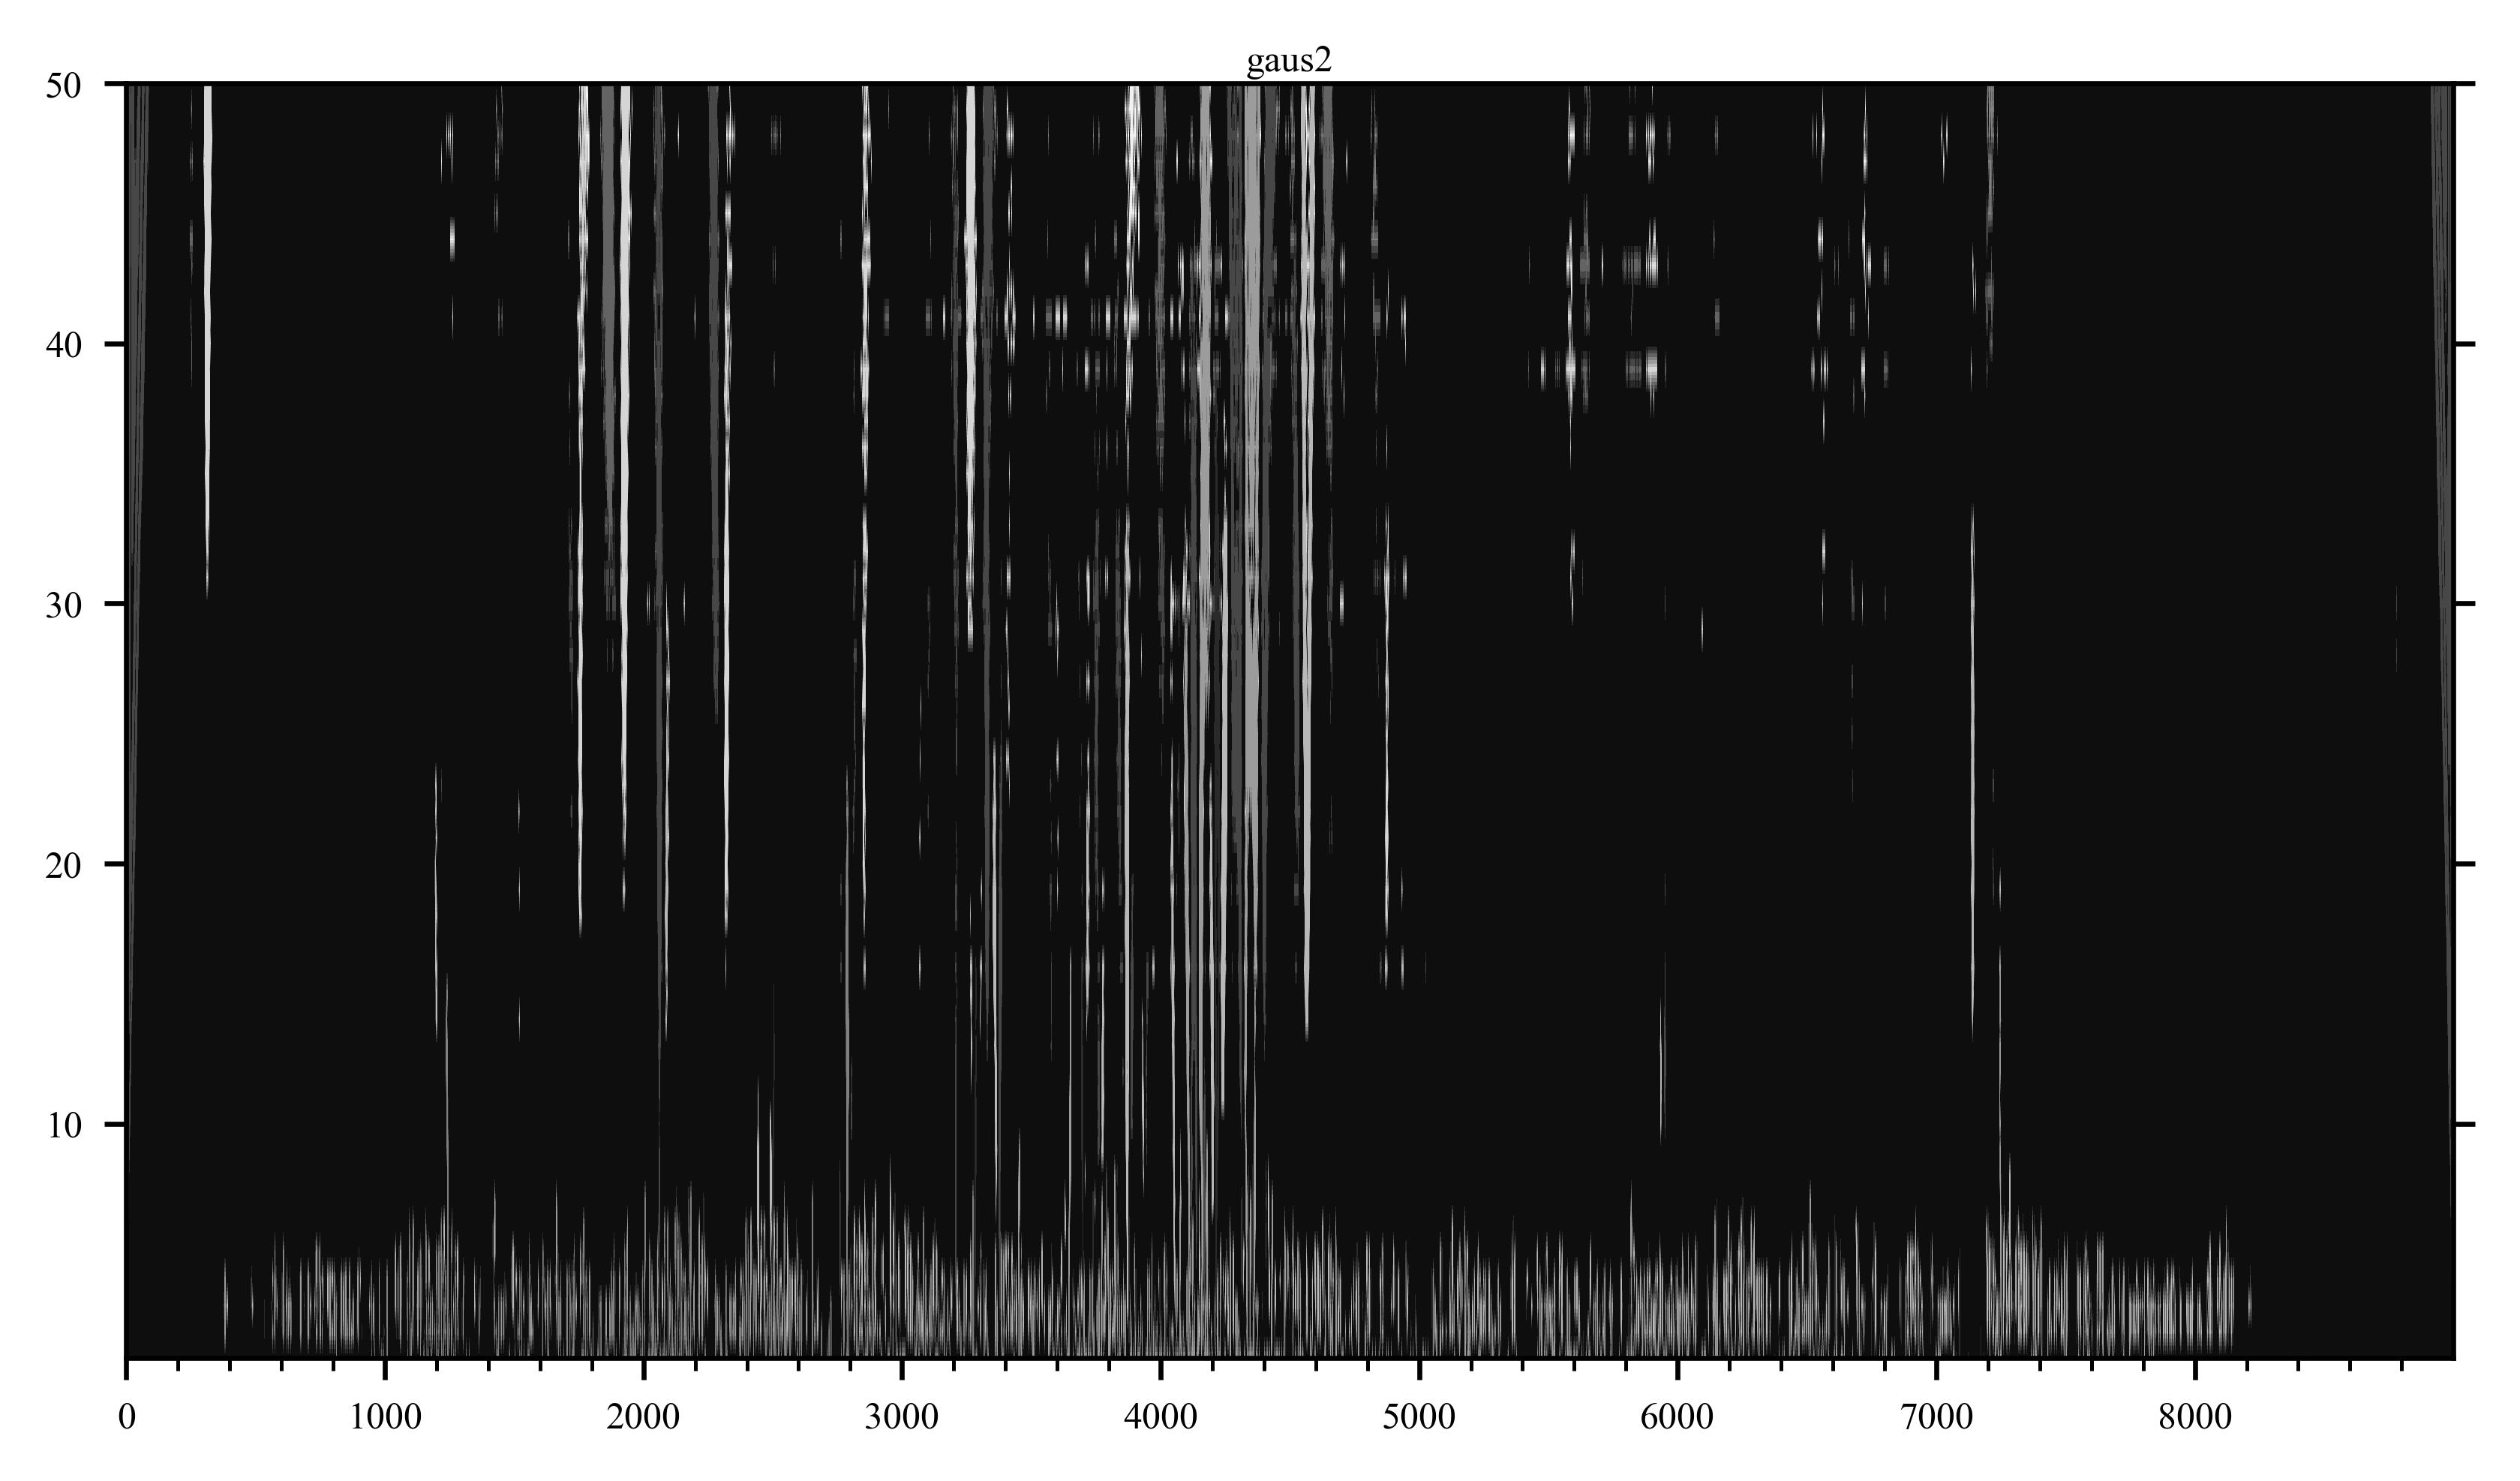

gaus2
db1


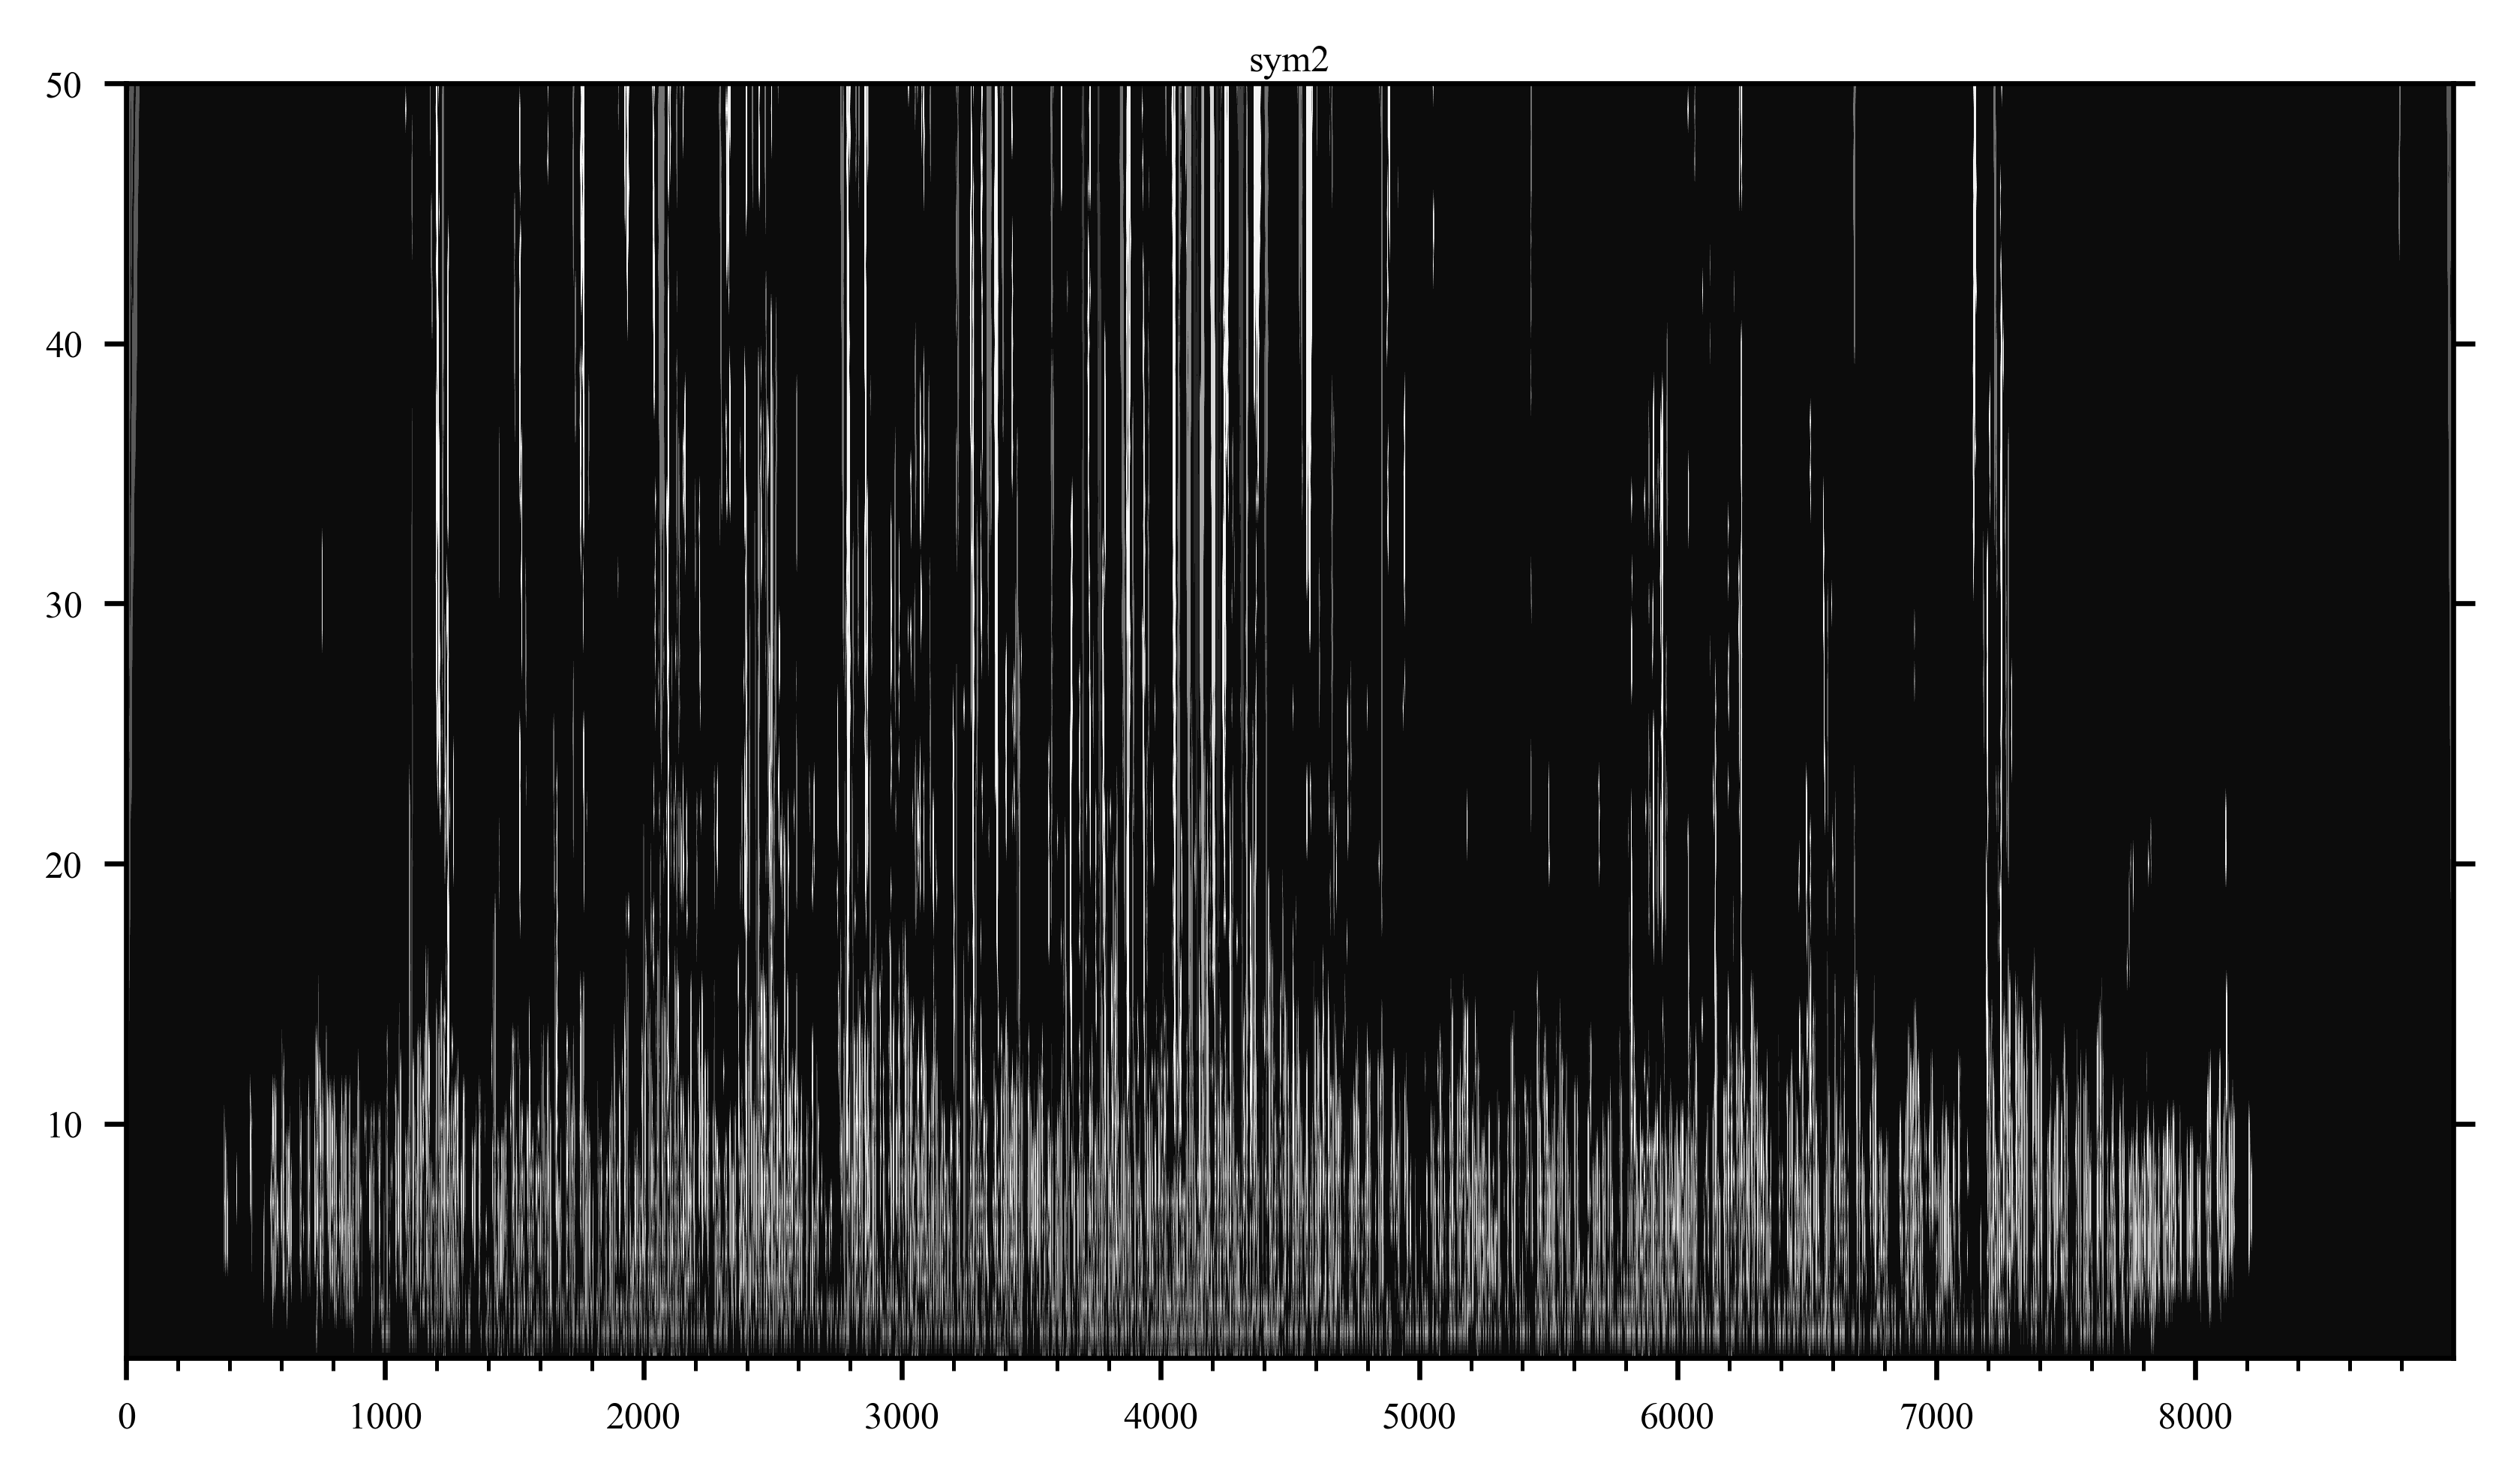

sym2


In [11]:
#trys = ['coif1','coif2','mexh','gaus2','dmey','gaus1','morl','cgau1','cgau2','db1','db2','sym1','sym2','sym3']
trys = ['coif2','mexh','gaus2','db1','sym2']

start = 36000
end = 45000
coord = 3

for id in trys:
    try:
        for coord in range(3):
            PlotFingerPrint(DataSet[:,coord+1][start:end],'a',id,id)
            PlotFingerPrint(StdDev[:,coord+1][start:end],'a',id,id)
    except:
        print(id)